Data Description
Attribute Information:

IDLink (numeric): Unique identifier of news items

Title (string): Title of the news item according to the official media sources

Headline (string): Headline of the news item according to the official media sources

Source (string): Original news outlet that published the news item

Topic (string): Query topic used to obtain the items in the official media sources

PublishDate (timestamp): Date and time of the news items' publication

SentimentTitle (numeric): Sentiment score of the text in the news items' title

SentimentHeadline (numeric): Sentiment score of the text in the news items' headline

Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook

GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+

LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn

VARIABLES OF SOCIAL FEEDBACK DATA
IDLink (numeric): Unique identifier of news items







In [24]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
pip install nltk

In [ ]:
pip install imblearn

In [23]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm


from ydata_profiling import ProfileReport

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')

from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize




from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE



SyntaxError: invalid syntax (<ipython-input-23-8242809dd386>, line 19)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the entire dataset (all columns)
news = pd.read_csv('/content/drive/MyDrive/train_file.csv', low_memory=True)




In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


Why this approach? - Data set is originally split into test and train data! First we clean the train and apply same to the test data.


Preventing Data Leakage: If we clean the entire dataset before splitting, information from the test set could influence the cleaning decisions for the training set. This is called data leakage and can lead to overly optimistic model performance estimates.
Realistic Evaluation: By cleaning the training set first and then applying the same steps to the test set, we ensure that the model is evaluated on data that it hasn't "seen" before, giving us a more realistic estimate of how it will perform in the real world.

In [ ]:
news.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


In [ ]:
news.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [ ]:
news.isnull().sum()

,0
IDLink,0
Title,0
Headline,0
Source,175
Topic,0
PublishDate,0
Facebook,0
GooglePlus,0
LinkedIn,0
SentimentTitle,0


Create new category for NA values in Source:

**Captures Information**: By creating a distinct category for missing sources, you preserve the information that the source was unknown or unavailable. This is valuable because the lack of a source might indeed have an impact on how news spreads and is perceived.

**Potential Insights**: You can directly analyze how news with a "Missing" source performs compared to news from known sources. This could reveal interesting patterns and help you understand if articles with no clear source tend to be more or less popular on different platforms.

**Avoids Assumptions**: Unlike imputation methods that fill in missing values based on assumptions (like the mode or predictions), creating a "Missing" category avoids making any assumptions about what the missing source might have been.

In [7]:
news['Source'].fillna('Missing', inplace=True)

In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55932 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [9]:
news_df = news.drop('GooglePlus', axis=1)

In [10]:
news_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55932 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   LinkedIn           55932 non-null  int64  
 8   SentimentTitle     55932 non-null  float64
 9   SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 4.3+ MB


In [11]:
news_df['Topic'].value_counts()

,count
Topic,
economy,20486
obama,16917
microsoft,12911
palestine,5618


In [12]:
# Check for duplicates
num_duplicates = news_df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


EDA

In [ ]:
profile = ProfileReport(news_df, title="News Dataset Profiling Report")
profile.to_file("news_dataset_report.html")

The dataset contains 55,932 news articles with 11 features.

Each article is described by features like Title, Headline, Source, Topic, PublishDate, and popularity metrics (Facebook, GooglePlus, LinkedIn).

There are over 50 unique sources, with Bloomberg, Reuters, and ABC News being the most frequent.

The topics covered in the dataset include 'obama', 'economy', 'microsoft', and 'palestine'.

In [14]:

source_unique_values = news_df['Source'].unique().tolist()
topic_unique_values = news_df['Topic'].unique().tolist()


if len(source_unique_values) > 50:
  top_source_values = news_df['Source'].value_counts().head(50).index.tolist()
  print("Top 50 source values:", top_source_values)
else:
  print("Source unique values:", source_unique_values)

if len(topic_unique_values) > 50:
  top_topic_values = news_df['Topic'].value_counts().head(50).index.tolist()
  print("Top 50 topic values:", top_topic_values)
else:
  print("Topic unique values:", topic_unique_values)

Top 50 source values: ['Bloomberg', 'Reuters', 'ABC News', 'New York Times', 'The Guardian', 'Business Insider', 'Forbes', 'Economic Times', 'CNN', 'WinBeta', 'Washington Post', 'Huffington Post', 'Wall Street Journal', 'The Hill', 'Breitbart News', 'CNBC', 'ZDNet', 'USA TODAY', 'AFP via Yahoo! News', 'Financial Times', 'Reuters via Yahoo! Finance', 'International Business Times', 'NPR', 'BBC News', 'Fox News', 'AFP via Yahoo! India News', 'Reuters UK', 'WAFA - Palestine News Agency', 'Daily Mail', 'Associated Press via Yahoo! News', 'The Hill (blog)', 'Washington Times', 'TASS', 'TheBlaze.com', 'Politico', 'MarketWatch', 'Los Angeles Times', 'Reuters via Yahoo! News', 'Nasdaq', 'Fortune', 'Daily Caller', 'The Wall Street Journal', 'The Register', 'Business Insider via Yahoo! Finance', 'Sputnik International', 'PC World', 'Intifada Palestine', 'Neowin', 'New York Post', 'The Verge']
Topic unique values: ['obama', 'economy', 'microsoft', 'palestine']


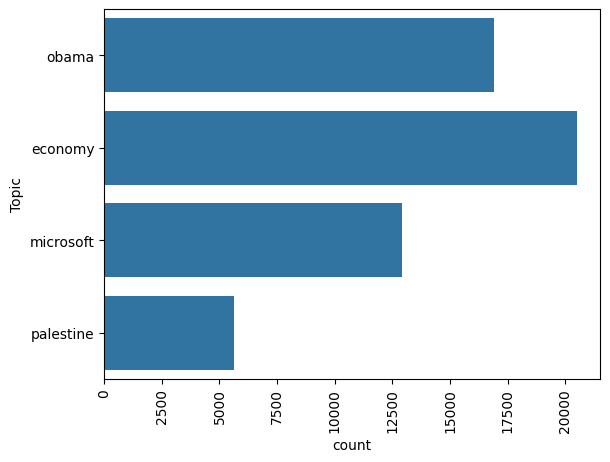

In [15]:
sns.countplot(news_df['Topic'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (15,10)

plt.savefig("Topic.png")

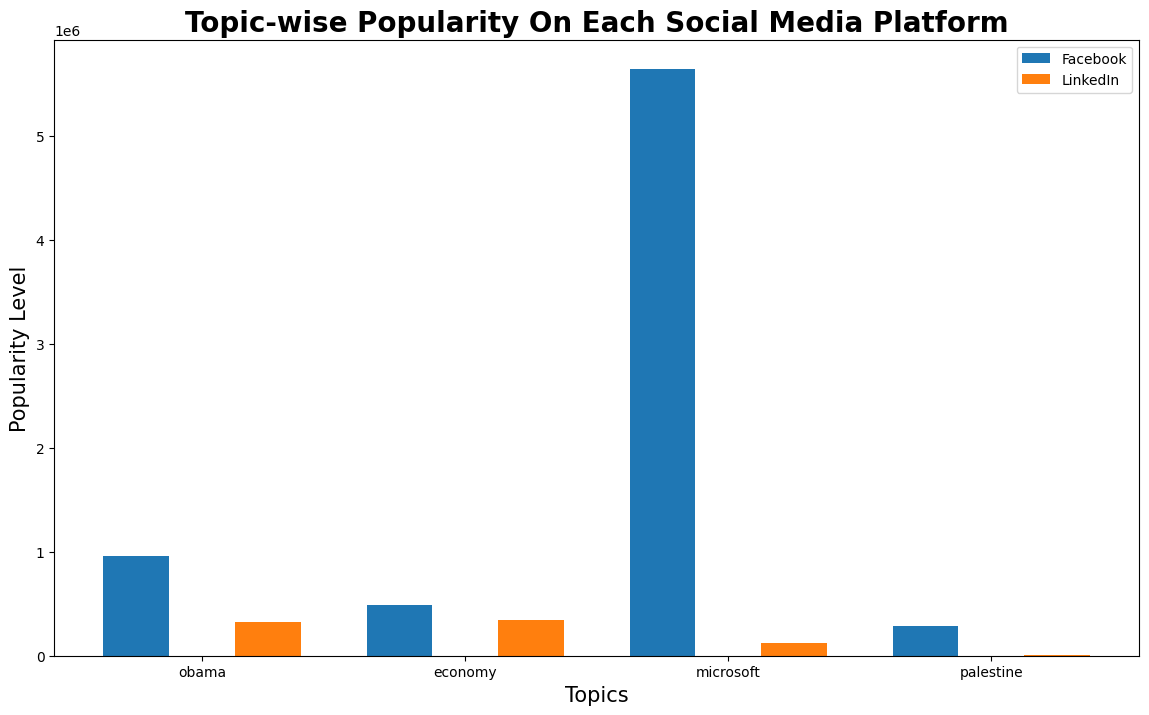

In [16]:
def show_popularities(df):
    topics = df['Topic'].unique()
    facebook = abs(df.groupby(['Topic'])['Facebook'].sum())
    linkedin = abs(df.groupby(['Topic'])['LinkedIn'].sum())

    ind = np.arange(len(topics))


    plt.figure(figsize=(14,8))
    plt.bar(ind-0.25,facebook,width=0.25,label='Facebook')
    plt.bar(ind+0.25,linkedin,width=0.25,label='LinkedIn')

    plt.xticks(ind, topics)
    plt.legend()
    plt.title('Topic-wise Popularity On Each Social Media Platform', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Topics', fontdict={'size':15})
    plt.ylabel('Popularity Level', fontdict={'size':15})
    plt.savefig("Topic by platform.png")
    plt.show()

show_popularities(news_df)




In [18]:
numerical_features = ['SentimentTitle', 'SentimentHeadline', 'Facebook', 'LinkedIn']
categorical_features = ['Topic', 'Source']

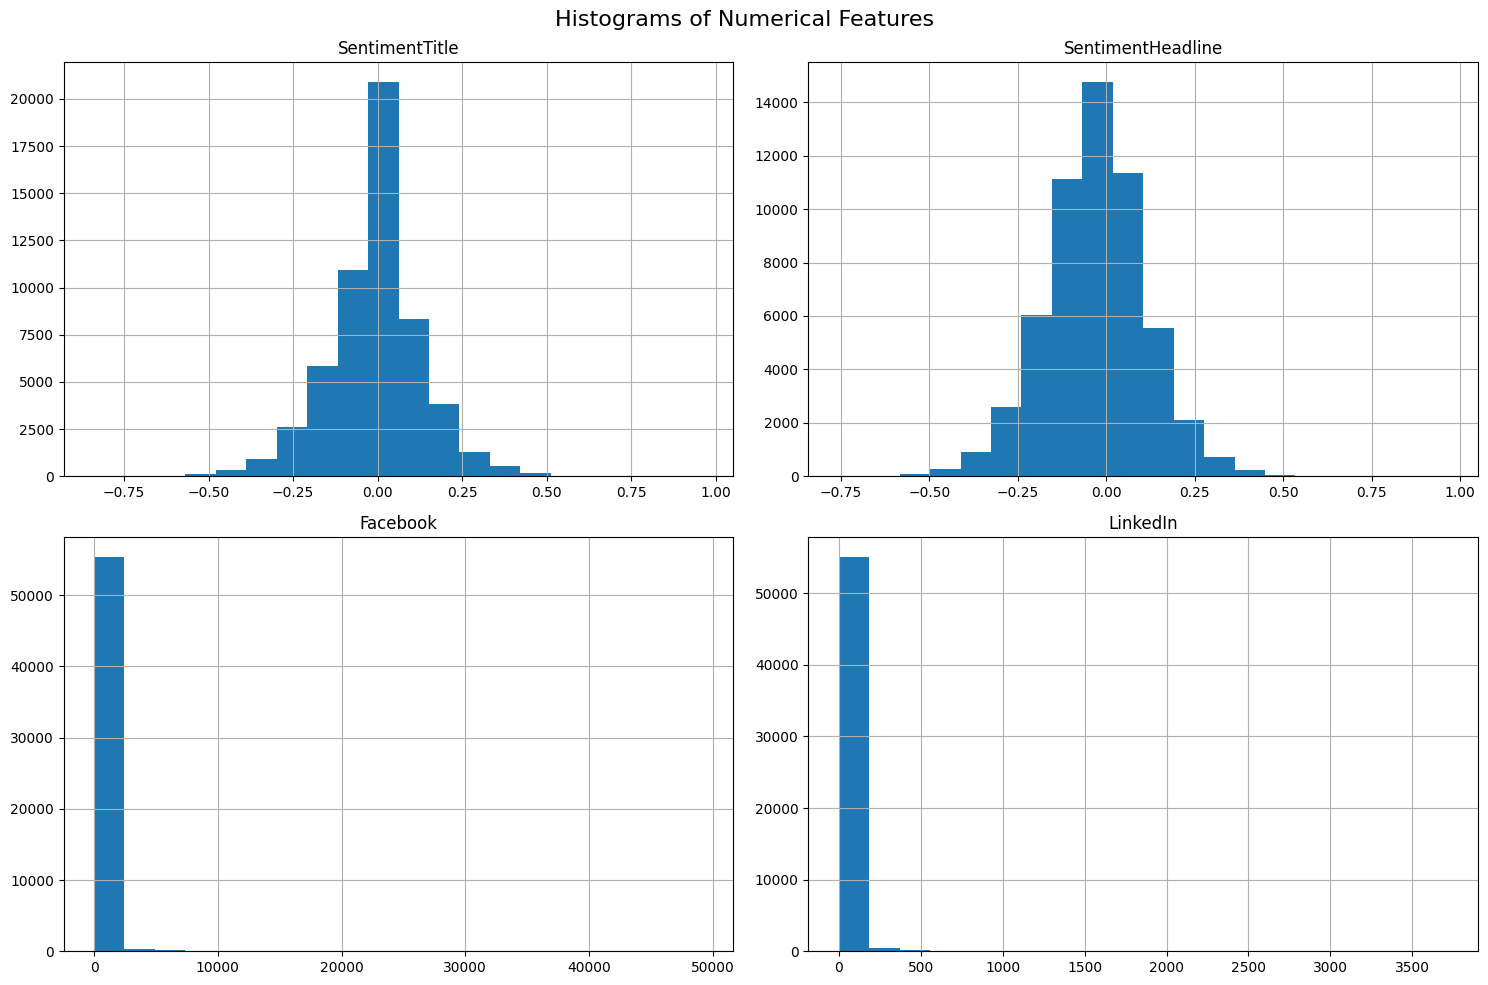

In [19]:
news_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.savefig("Histograms Numerical Features.png")
plt.show()




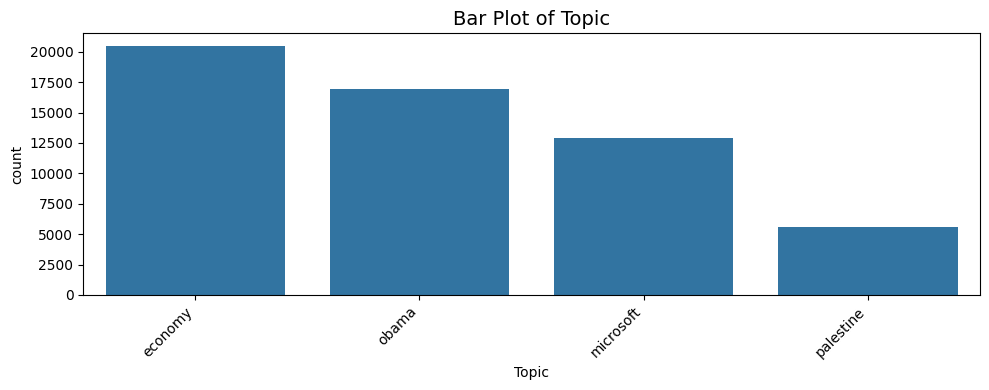

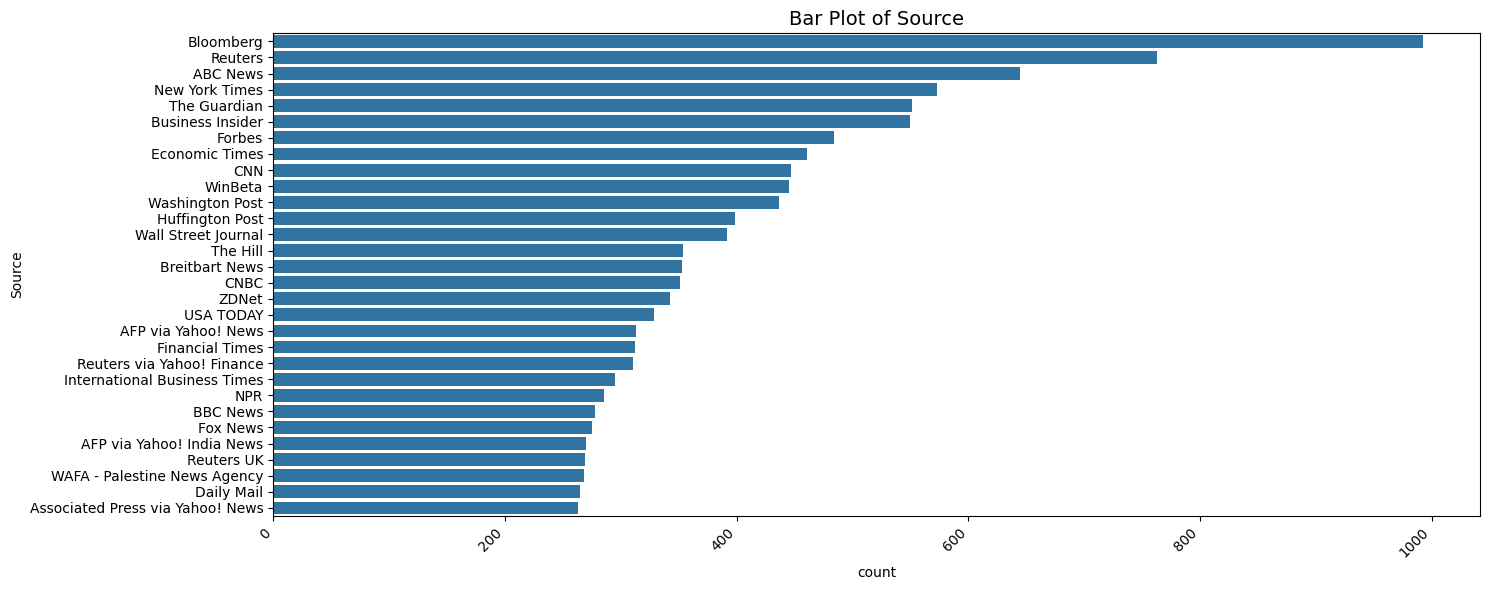

In [20]:
for feature in categorical_features:
    if feature == 'Source':
        top_sources = news_df['Source'].value_counts().head(30).index
        df_filtered = news_df[news_df['Source'].isin(top_sources)]
        plt.figure(figsize=(15, 6))
        sns.countplot(y=df_filtered[feature], order=df_filtered[feature].value_counts().index)
    else:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=news_df[feature], order=news_df[feature].value_counts().index)
    plt.title(f'Bar Plot of {feature}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{feature}.png")
    plt.show()



In [ ]:
sentiment_title_mean = news_df['SentimentTitle'].mean()
sentiment_title_std = news_df['SentimentTitle'].std()
sentiment_title_threshold = 2 * sentiment_title_std

sentiment_title_outliers = news_df[
    (news_df['SentimentTitle'] > sentiment_title_mean + sentiment_title_threshold) |
    (news_df['SentimentTitle'] < sentiment_title_mean - sentiment_title_threshold)
]


print("SentimentTitle Outliers:")
for index, row in sentiment_title_outliers.iterrows():
    print(f"Title: {row['Title']}")
    print(f"Headline: {row['Headline']}")
    print("-" * 20)

# --- Investigate outliers in Facebook popularity ---


facebook_popularity_threshold = news_df['Facebook'].quantile(0.99)


facebook_popularity_outliers = news_df[news_df['Facebook'] > facebook_popularity_threshold]

print("\nFacebook Popularity Outliers:")
for index, row in facebook_popularity_outliers.iterrows():
    print(f"Title: {row['Title']}")
    print(f"Headline: {row['Headline']}")
    print(f"Source: {row['Source']}")
    print("-" * 20)

Streaming output truncated to the last 5000 lines.
--------------------
Title: Dem Governor to Obama: Every Answer You Give 'Is More Brilliant ...
Headline: Obama laughed as he replied, """He is a Democrat, isn't he?""" Shumlin added, """A Republican just said that to me.""" Follow Pam Key on Twitter @
--------------------
Title: Obama hopes for 'sensible' health debate '...
Headline: President Obama said Monday he hopes the country can have a """sensible conversation""" about reforming healthcare spending """once I'm gone,"""
--------------------
Title: Montini: How Obama gets HIMSELF on the Supreme Court
Headline: Senate Republicans have come out against President Obama submitting a SCOTUS nominee, but he may not need their support.
--------------------
Title: Republican Senator Breaks With His Party On Obama's Supreme ...
Headline: Sen. Mark Kirk (R-IL), a first-term senator facing a tough reelection fight in the blue state of Illinois, broke with his party leadership's hardline
---

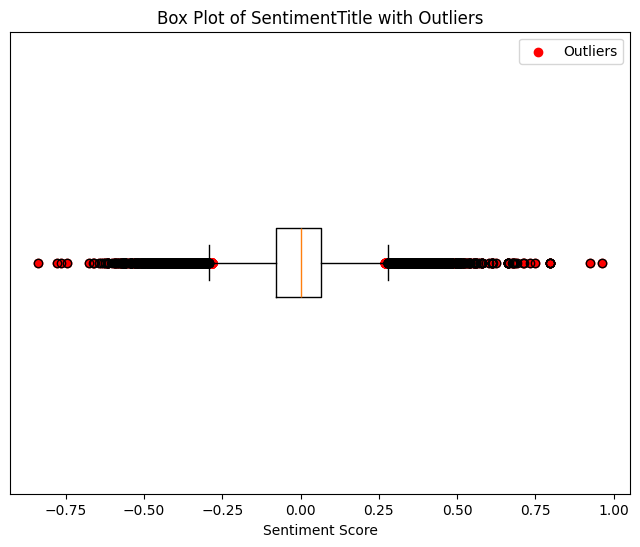

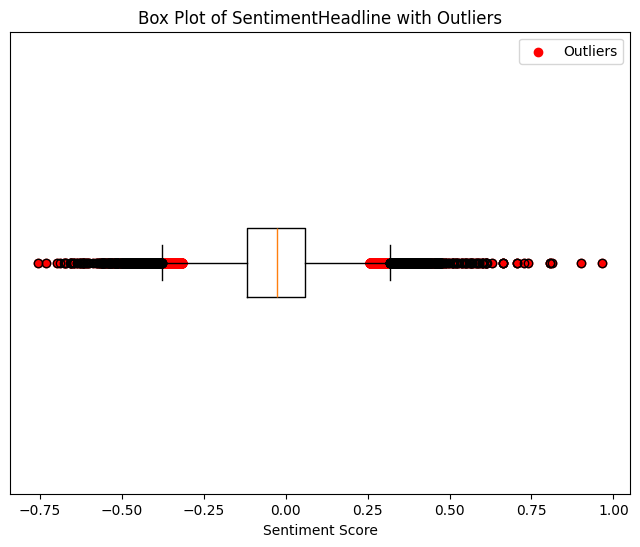

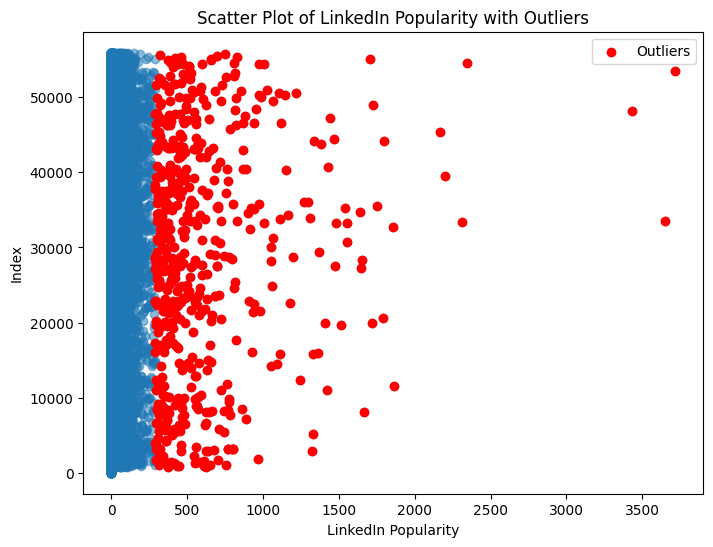

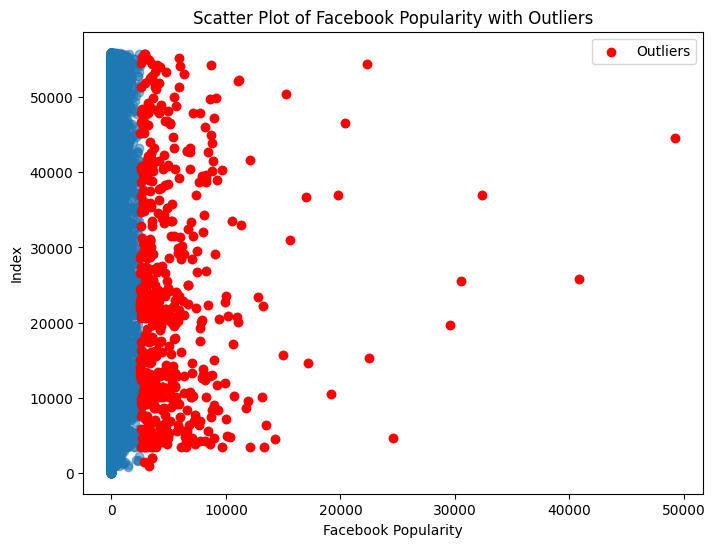

In [22]:

sentiment_title_mean = news_df['SentimentTitle'].mean()
sentiment_title_std = news_df['SentimentTitle'].std()
sentiment_title_threshold = 2 * sentiment_title_std


sentiment_title_outliers = news_df[
    (news_df['SentimentTitle'] > sentiment_title_mean + sentiment_title_threshold) |
    (news_df['SentimentTitle'] < sentiment_title_mean - sentiment_title_threshold)
]


plt.figure(figsize=(8, 6))
plt.boxplot(news_df['SentimentTitle'], vert=False)
plt.scatter(sentiment_title_outliers['SentimentTitle'], [1] * len(sentiment_title_outliers), color='red', label='Outliers')
plt.title('Box Plot of SentimentTitle with Outliers')
plt.xlabel('Sentiment Score')
plt.yticks([])
plt.legend()
plt.savefig("Outliers Title.png")
plt.show()

sentiment_headline_mean = news_df['SentimentHeadline'].mean()
sentiment_headline_std = news_df['SentimentHeadline'].std()
sentiment_headline_threshold = 2 * sentiment_headline_std


sentiment_title_outliers = news_df[
    (news_df['SentimentHeadline'] > sentiment_headline_mean + sentiment_headline_threshold) |
    (news_df['SentimentHeadline'] < sentiment_headline_mean - sentiment_headline_threshold)
]


plt.figure(figsize=(8, 6))
plt.boxplot(news_df['SentimentHeadline'], vert=False)
plt.scatter(sentiment_title_outliers['SentimentHeadline'], [1] * len(sentiment_title_outliers), color='red', label='Outliers')
plt.title('Box Plot of SentimentHeadline with Outliers')
plt.xlabel('Sentiment Score')
plt.yticks([])
plt.legend()
plt.savefig("Outliers Headline.png")
plt.show()


linkedIn_popularity_threshold = news_df['LinkedIn'].quantile(0.99)


linkedIn_popularity_outliers = news_df[news_df['LinkedIn'] > linkedIn_popularity_threshold]


plt.figure(figsize=(8, 6))
plt.scatter(news_df['LinkedIn'], range(len(news_df)), alpha=0.5)
plt.scatter(linkedIn_popularity_outliers['LinkedIn'], linkedIn_popularity_outliers.index, color='red', label='Outliers')
plt.title('Scatter Plot of LinkedIn Popularity with Outliers')
plt.xlabel('LinkedIn Popularity')
plt.ylabel('Index')
plt.legend()
plt.savefig("Outliers LinkedIn.png")
plt.show()

# --- Visualize outliers in Facebook popularity ---


facebook_popularity_threshold = news_df['Facebook'].quantile(0.99)

facebook_popularity_outliers = news_df[news_df['Facebook'] > facebook_popularity_threshold]


plt.figure(figsize=(8, 6))
plt.scatter(news_df['Facebook'], range(len(news_df)), alpha=0.5)
plt.scatter(facebook_popularity_outliers['Facebook'], facebook_popularity_outliers.index, color='red', label='Outliers')
plt.title('Scatter Plot of Facebook Popularity with Outliers')
plt.xlabel('Facebook Popularity')
plt.ylabel('Index')
plt.legend()
plt.savefig("Outliers Facebook.png")
plt.show()




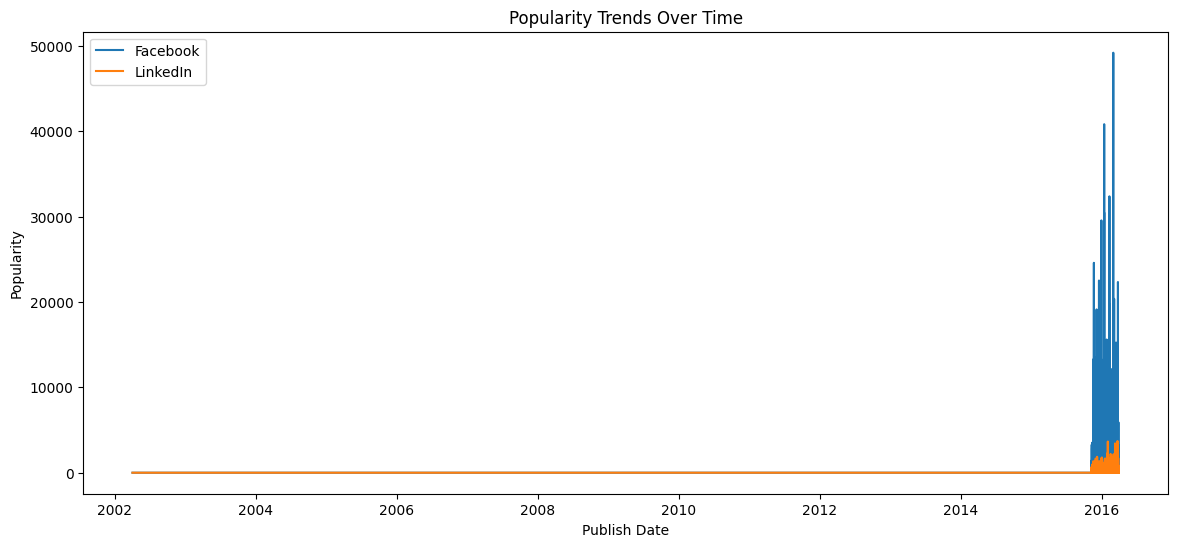

<Figure size 1400x500 with 0 Axes>

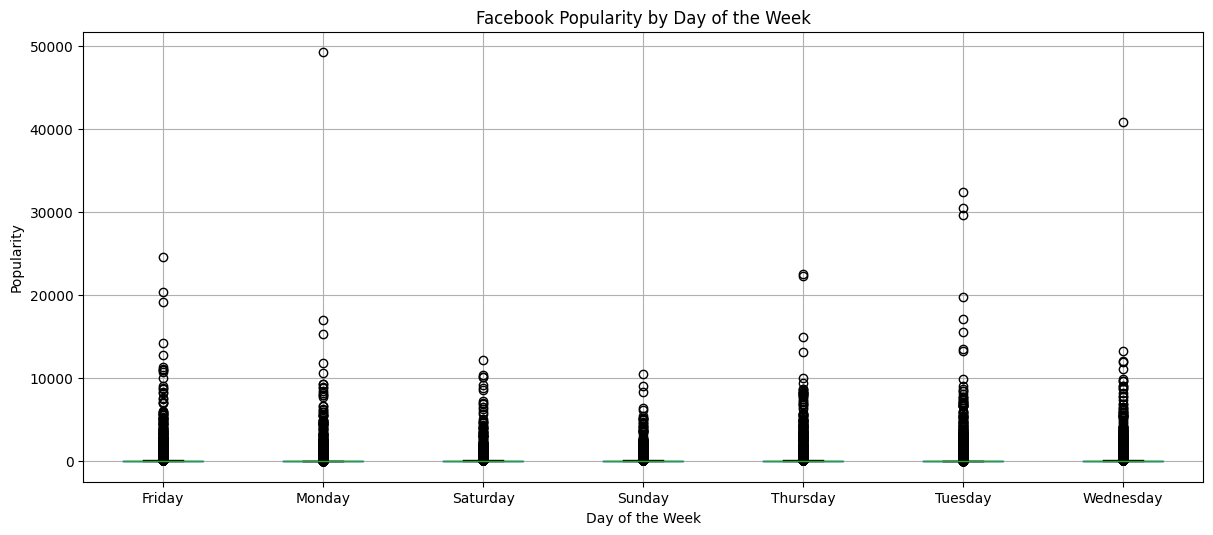

<Figure size 1400x600 with 0 Axes>

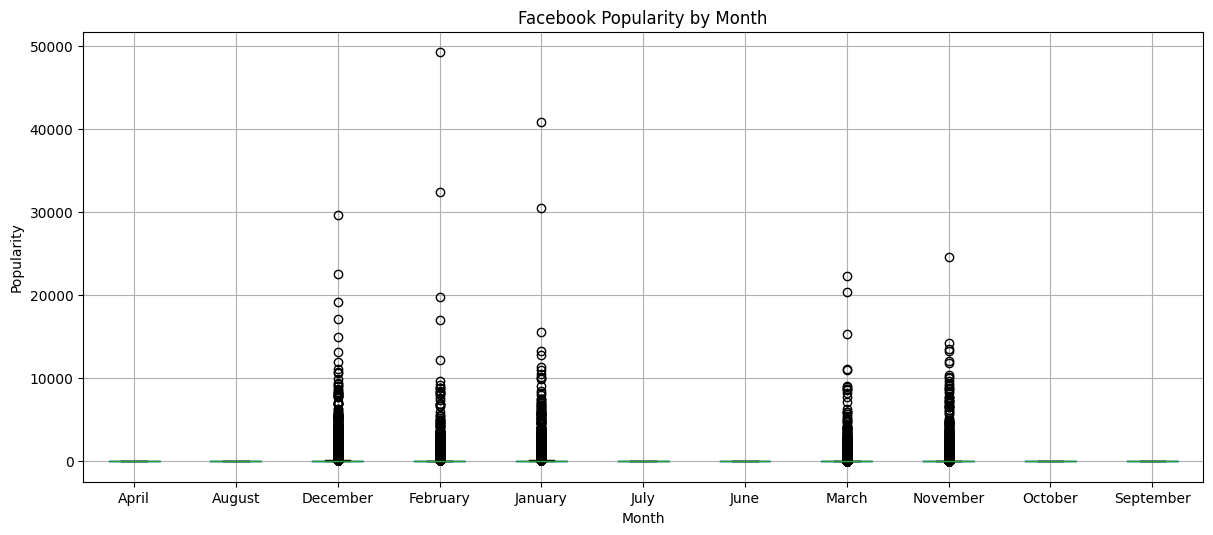

<Figure size 1400x500 with 0 Axes>

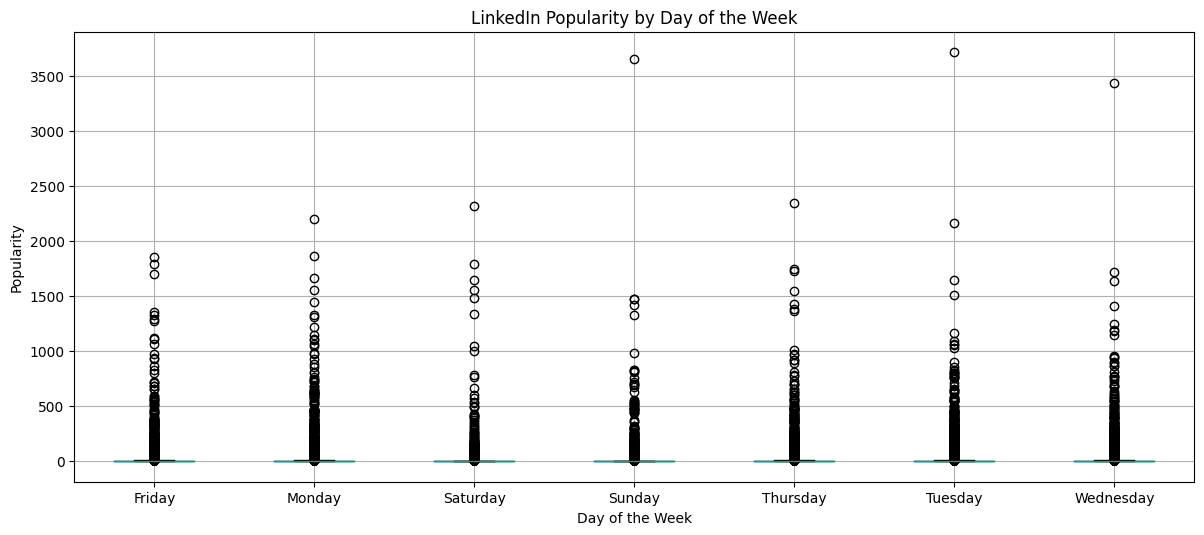

<Figure size 1400x600 with 0 Axes>

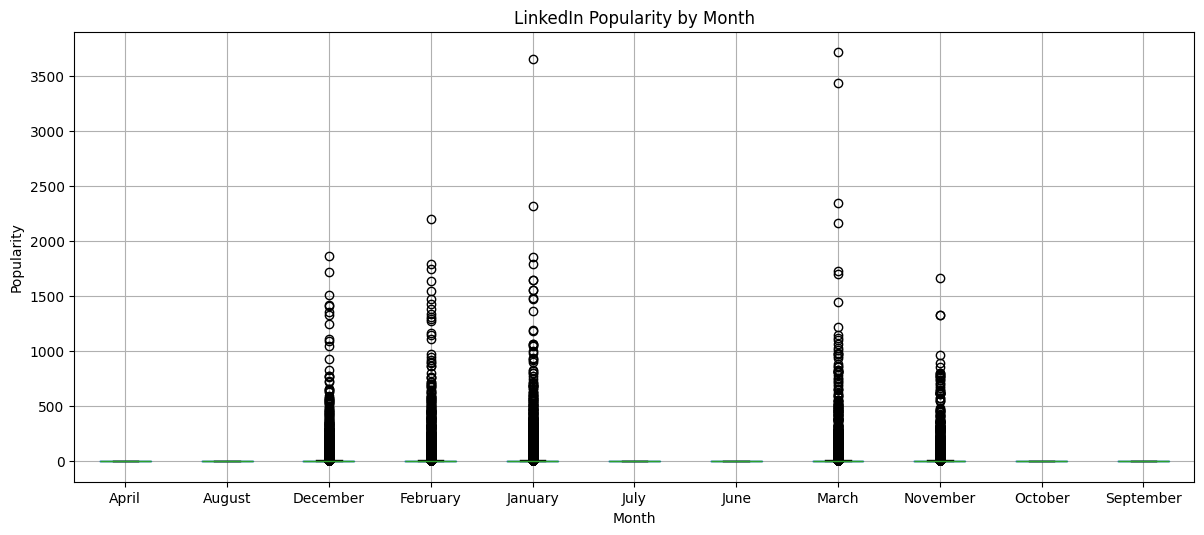

In [21]:
news_df['PublishDate'] = pd.to_datetime(news_df['PublishDate'])


news_df['DayOfWeek'] = news_df['PublishDate'].dt.day_name()
news_df['Month'] = news_df['PublishDate'].dt.month_name()
news_df['Year'] = news_df['PublishDate'].dt.year
news_df['Hour'] = news_df['PublishDate'].dt.hour


plt.figure(figsize=(14, 6))
plt.plot(news_df['PublishDate'], news_df['Facebook'], label='Facebook')
plt.plot(news_df['PublishDate'], news_df['LinkedIn'], label='LinkedIn')
plt.title('Popularity Trends Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Popularity')
plt.legend()
plt.savefig("Popularity Trends Over Time.png")
plt.show()


# Facebook
plt.figure(figsize=(14, 5))
news_df.boxplot(column='Facebook', by='DayOfWeek', figsize=(14, 6))
plt.title('Facebook Popularity by Day of the Week')
plt.suptitle('')
plt.xlabel('Day of the Week')
plt.ylabel('Popularity')
plt.savefig("Facebook_Popularity_by_Day_of_the_Week.png")
plt.show()

plt.figure(figsize=(14, 6))
news_df.boxplot(column='Facebook', by='Month', figsize=(14, 6))
plt.title('Facebook Popularity by Month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.savefig("Facebook_Popularity_by_Month.png")
plt.show()

# LinkedIn
plt.figure(figsize=(14, 5))
news_df.boxplot(column='LinkedIn', by='DayOfWeek', figsize=(14, 6))
plt.title('LinkedIn Popularity by Day of the Week')
plt.suptitle('')
plt.xlabel('Day of the Week')
plt.ylabel('Popularity')
plt.savefig("LinkedIn_Popularity_by_Day_of_the_Week.png")
plt.show()

plt.figure(figsize=(14, 6))
news_df.boxplot(column='LinkedIn', by='Month', figsize=(14, 6))
plt.title('LinkedIn Popularity by Month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.savefig("LinkedIn_Popularity_by_Month.png")
plt.show()



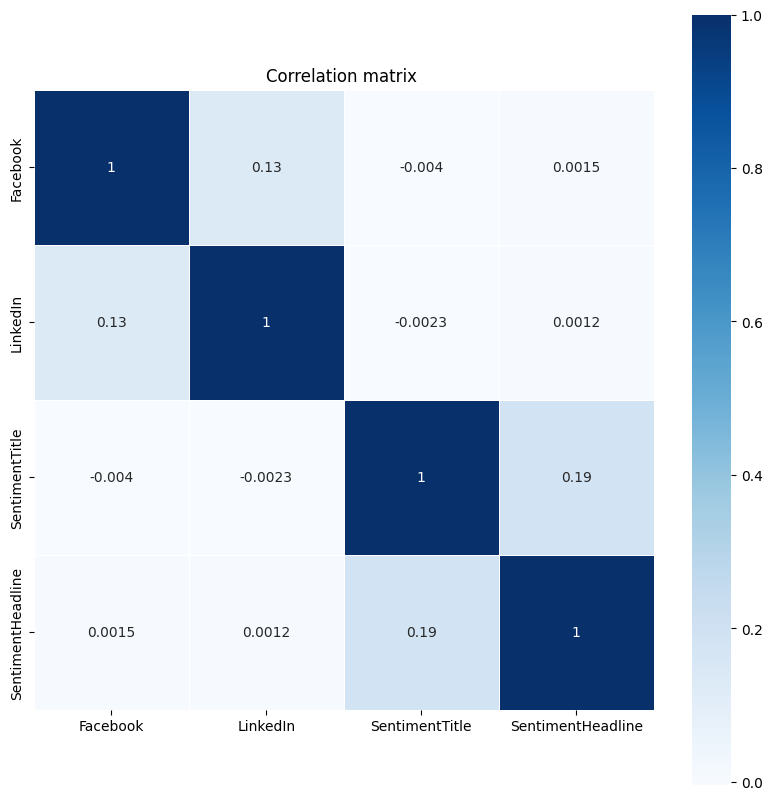

In [ ]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(news_df[['Facebook','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='Blues',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
plt.savefig("Correlation matrix .png")
plt.show()



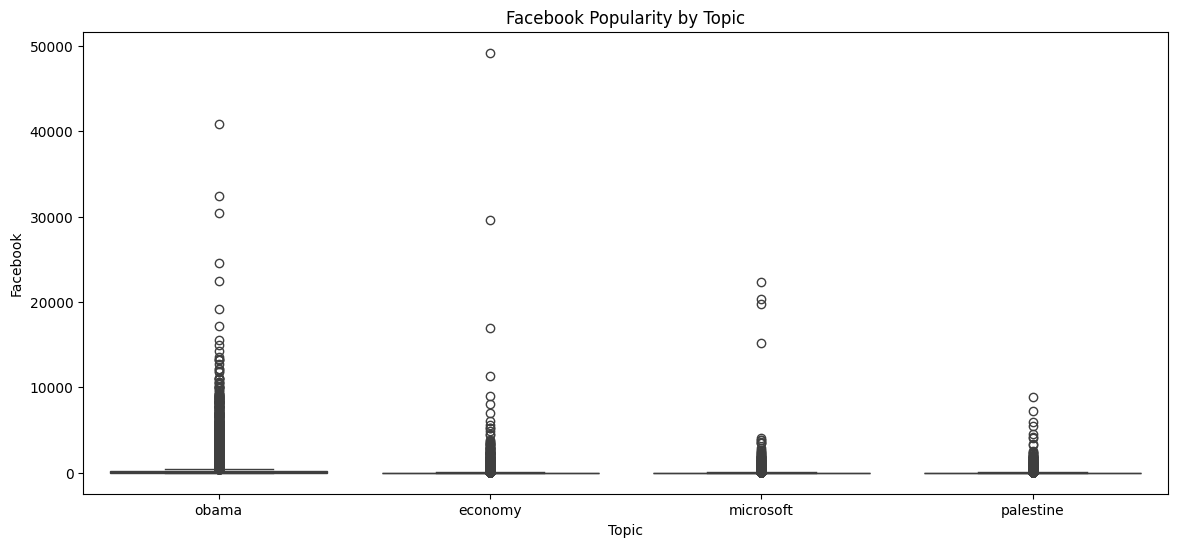

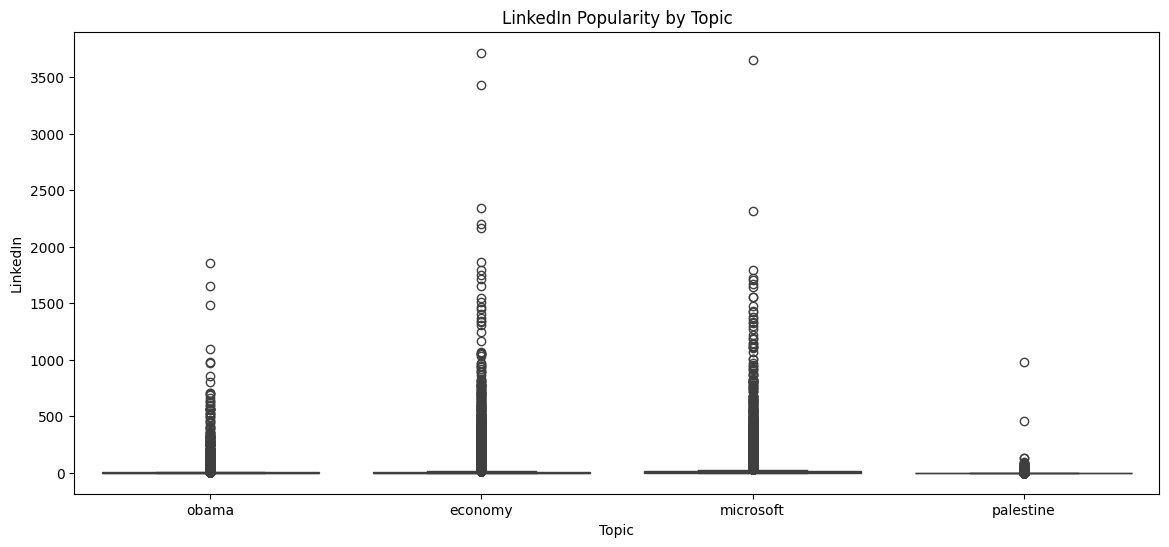

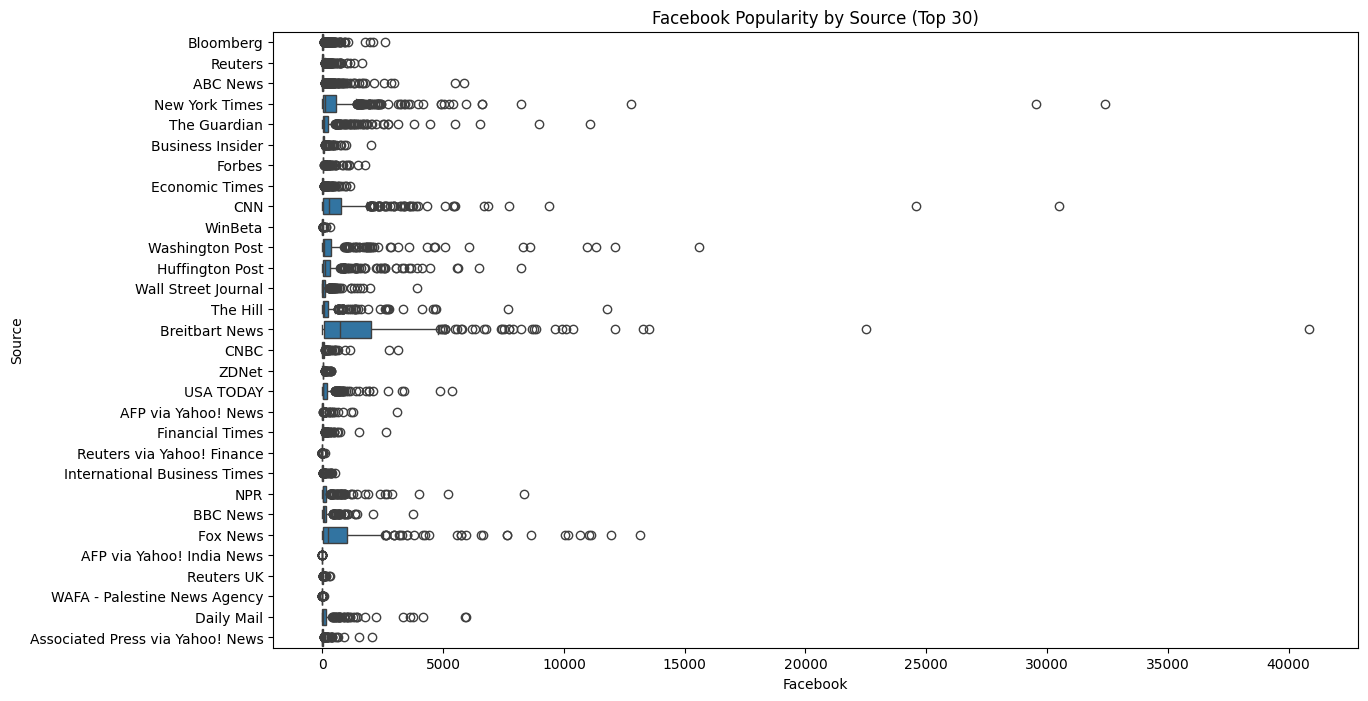

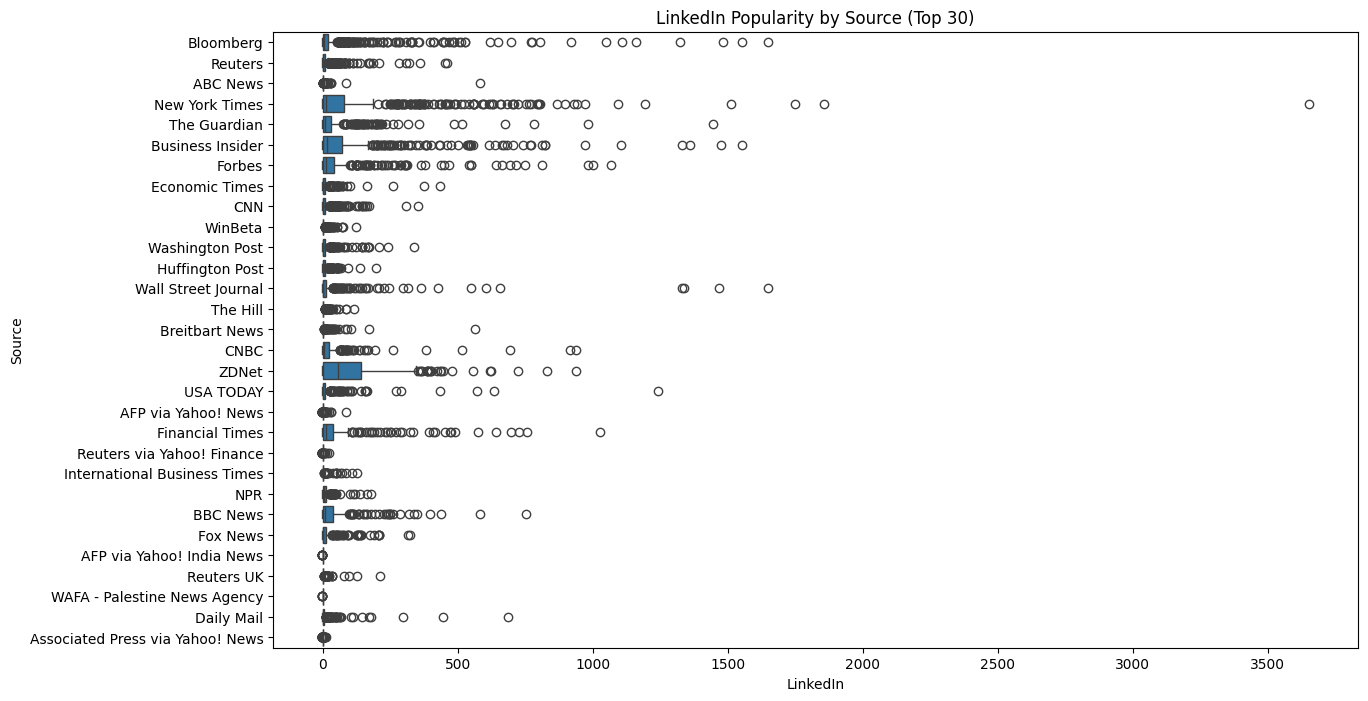

In [ ]:
# --- Popularity across topics ---
plt.figure(figsize=(14, 6))
sns.boxplot(x='Topic', y='Facebook', data=news_df)
plt.title('Facebook Popularity by Topic')
plt.savefig("Facebook Popularity by Topic.png")
plt.show()



plt.figure(figsize=(14, 6))
sns.boxplot(x='Topic', y='LinkedIn', data=news_df)
plt.title('LinkedIn Popularity by Topic')
plt.savefig("LinkedIn Popularity by Topic.png")
plt.show()



# --- Popularity across sources ---
plt.figure(figsize=(14, 8))
sns.boxplot(y='Source', x='Facebook', data=news_df, order=news_df['Source'].value_counts().head(30).index)
plt.title('Facebook Popularity by Source (Top 30)')
plt.savefig("Facebook Popularity by Source .png")
plt.show()



plt.figure(figsize=(14, 8))
sns.boxplot(y='Source', x='LinkedIn', data=news_df, order=news_df['Source'].value_counts().head(30).index)
plt.title('LinkedIn Popularity by Source (Top 30)')
plt.savefig("LinkedIn Popularity by Source.png")
plt.show()



In [ ]:
pip install nltk

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Top 10 words in titles: [('obama', 16379), ('economy', 16067), ('microsoft', 12117), ('say', 2434), ('palestine', 2350), ('u', 2299), ('new', 2237), ('china', 1794), ('president', 1791), ('economic', 1762)]
Top 10 words in headlines: [('obama', 18296), ('economy', 16271), ('microsoft', 14566), ('president', 14251), ('quot', 9614), ('barack', 7996), ('said', 6025), ('year', 5882), ('new', 5812), ('economic', 5542)]


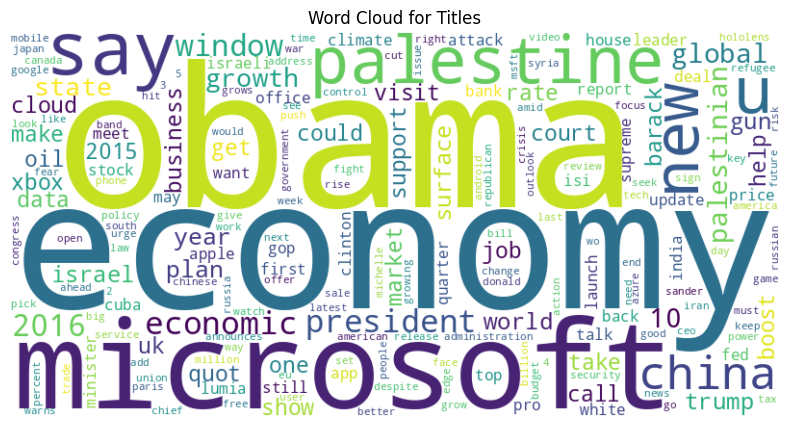

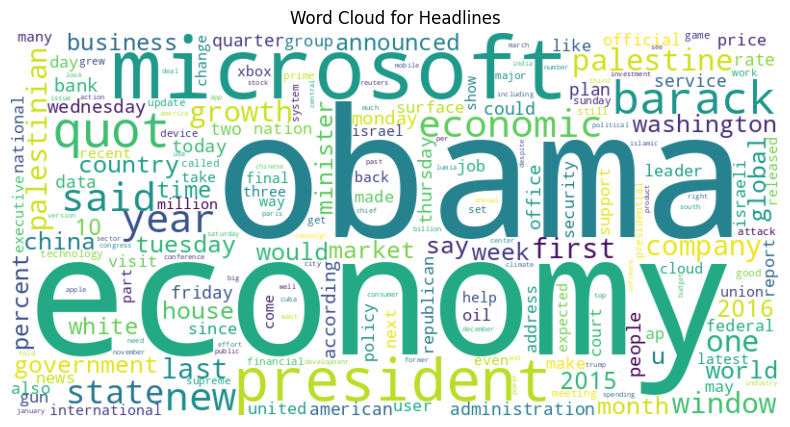

In [ ]:
import pandas as pd


from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# --- Text preprocessing ---
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return " ".join(tokens)

news_df['ProcessedTitle'] = news_df['Title'].apply(preprocess_text)
news_df['ProcessedHeadline'] = news_df['Headline'].apply(preprocess_text)

# --- Word frequency analysis ---
all_title_words = " ".join(news_df['ProcessedTitle']).split()
all_headline_words = " ".join(news_df['ProcessedHeadline']).split()

title_word_counts = Counter(all_title_words)
headline_word_counts = Counter(all_headline_words)

print("Top 10 words in titles:", title_word_counts.most_common(10))
print("Top 10 words in headlines:", headline_word_counts.most_common(10))


tfidf = TfidfVectorizer(ngram_range=(2, 3))
title_tfidf_matrix = tfidf.fit_transform(news_df['ProcessedTitle'])
headline_tfidf_matrix = tfidf.fit_transform(news_df['ProcessedHeadline'])



# --- Word cloud visualization ---
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_counts)
headline_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(headline_word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Titles')
plt.savefig("Word Cloud for Titles.png")
plt.show()



plt.figure(figsize=(10, 5))
plt.imshow(headline_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Headlines')
plt.savefig("Word Cloud for Headlines.png")
plt.show()



Data Preprocessing

In [ ]:
# Convert 'PublishDate' to datetime format
news_df['PublishDate'] = pd.to_datetime(news_df['PublishDate'])

# Extract day of the week, month, and year
news_df['DayOfWeek'] = news_df['PublishDate'].dt.dayofweek  # Monday=0, Sunday=6
news_df['Month'] = news_df['PublishDate'].dt.month  # January=1, December=12
news_df['Hour'] = news_df['PublishDate'].dt.hour


print(news_df[['PublishDate', 'DayOfWeek', 'Month', 'Hour']].head(10))

          PublishDate  DayOfWeek  Month  Hour
0 2002-04-02 00:00:00          1      4     0
1 2008-09-20 00:00:00          5      9     0
2 2012-01-28 00:00:00          5      1     0
3 2015-03-01 00:06:00          6      3     0
4 2015-03-01 00:11:00          6      3     0
5 2015-03-01 00:19:00          6      3     0
6 2016-02-28 14:03:00          6      2    14
7 2015-03-01 00:45:00          6      3     0
8 2015-03-01 01:20:00          6      3     1
9 2015-03-01 01:32:00          6      3     1


In [ ]:
# Verify that there are no more missing values in 'Source'
print(news_df['Source'].isnull().sum())

0


Missing values in LinkedIn column: 0

Descriptive statistics for LinkedIn popularity:
count    55932.000000
mean        14.300132
std         76.651420
min         -1.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       3716.000000
Name: LinkedIn, dtype: float64


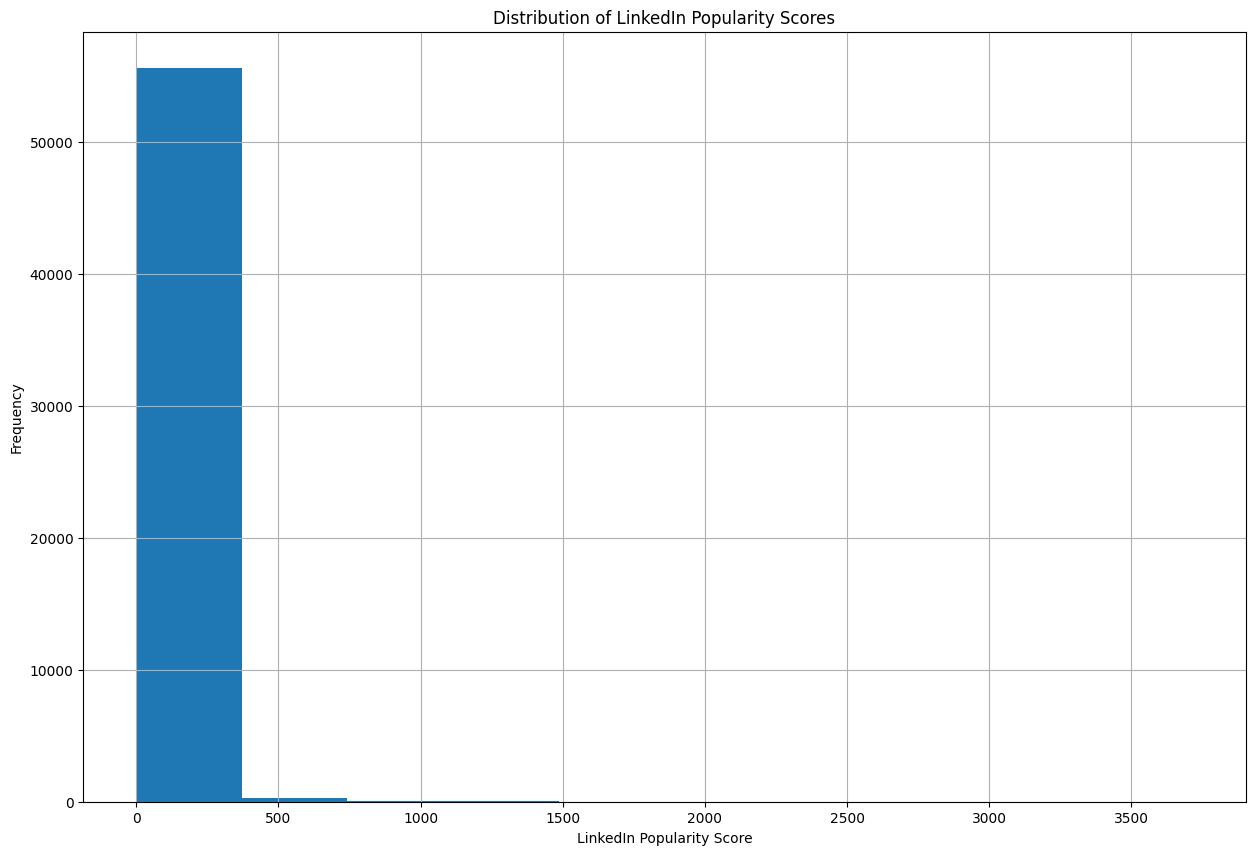

In [ ]:
# Check for missing values in the LinkedIn column
print("Missing values in LinkedIn column:", news_df['LinkedIn'].isnull().sum())


print("\nDescriptive statistics for LinkedIn popularity:")
print(news_df['LinkedIn'].describe())


news_df['LinkedIn'].hist()
plt.xlabel('LinkedIn Popularity Score')
plt.ylabel('Frequency')
plt.title('Distribution of LinkedIn Popularity Scores')
plt.savefig("Distribution of LinkedIn Popularity Scores.png")
plt.show()



In [ ]:
# Filter the data where LinkedIn and Facebook are both -1
filtered_df = news_df[(news_df['LinkedIn'] == -1) & (news_df['Facebook'] == -1)]


print(filtered_df.head())

print(filtered_df['Topic'].value_counts())
print(filtered_df['Source'].value_counts())


       IDLink                                              Title  \
0  Tr3CMgRv1N   Obama Lays Wreath at Arlington National Cemetery   
1  Wc81vGp8qZ        A Look at the Health of the Chinese Economy   
2  zNGH03CrZH   Nouriel Roubini: Global Economy Not Back to 2008   
3  3sM1H0W8ts                          Finland GDP Expands In Q4   
4  wUbnxgvqaZ  Tourism, govt spending buoys Thai economy in J...   

                                            Headline  \
0  Obama Lays Wreath at Arlington National Cemete...   
1  Tim Haywood, investment director business-unit...   
2  Nouriel Roubini, NYU professor and chairman at...   
3  Finland's economy expanded marginally in the t...   
4  Tourism and public spending continued to boost...   

                                     Source    Topic         PublishDate  \
0                                 USA TODAY    obama 2002-04-02 00:00:00   
1                                 Bloomberg  economy 2008-09-20 00:00:00   
2                         

In [ ]:
news_df['negative_popularity'] = ((news_df['LinkedIn'] == -1) & (news_df['Facebook'] == -1)).astype(int)

In [ ]:
print(news_df.groupby('negative_popularity')['Topic'].value_counts())
print(news_df.groupby('negative_popularity')['Source'].value_counts())

negative_popularity  Topic    
0                    economy      19750
                     obama        15766
                     microsoft    12016
                     palestine     4681
1                    obama         1151
                     palestine      937
                     microsoft      895
                     economy        736
Name: count, dtype: int64
negative_popularity  Source          
0                    Bloomberg           948
                     Reuters             735
                     ABC News            601
                     The Guardian        520
                     New York Times      510
                                        ... 
1                    iTWire                1
                     kfor.com              1
                     kwbe                  1
                     rabble.ca (blog)      1
                     stv.tv                1
Name: count, Length: 5672, dtype: int64


In [ ]:
news_df['LinkedIn_negative'] = (news_df['LinkedIn'] == -1).astype(int)
news_df['Facebook_negative'] = (news_df['Facebook'] == -1).astype(int)

# Drop the combined 'negative_popularity' column
news_df.drop('negative_popularity', axis=1, inplace=True)

In [ ]:
news_df['LinkedIn'] = np.where(news_df['LinkedIn'] <= 0, 0.001, news_df['LinkedIn'])
news_df['Facebook'] = np.where(news_df['Facebook'] <= 0, 0.001, news_df['Facebook'])

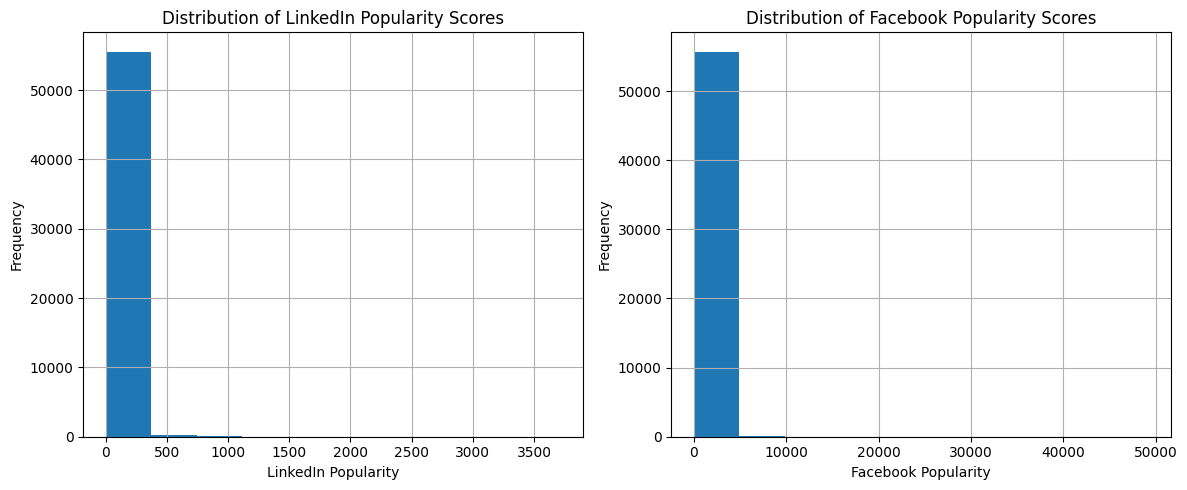

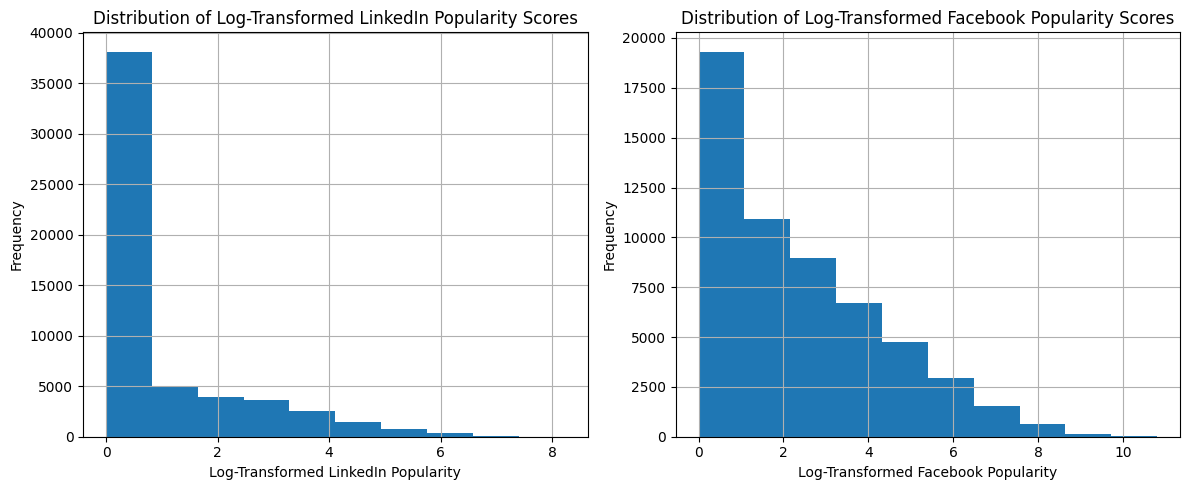

In [ ]:
# Explore the distributions of LinkedIn and Facebook popularity scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
news_df['LinkedIn'].hist()
plt.title('Distribution of LinkedIn Popularity Scores')
plt.xlabel('LinkedIn Popularity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
news_df['Facebook'].hist()
plt.title('Distribution of Facebook Popularity Scores')
plt.xlabel('Facebook Popularity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("Distribution of Popularity Scores_addition.png")
plt.show()


# Apply logarithmic transformation to LinkedIn and Facebook popularity scores
news_df['LinkedIn_log'] = np.log1p(news_df['LinkedIn'])
news_df['Facebook_log'] = np.log1p(news_df['Facebook'])

# Explore the distributions of the transformed scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
news_df['LinkedIn_log'].hist()
plt.title('Distribution of Log-Transformed LinkedIn Popularity Scores')
plt.xlabel('Log-Transformed LinkedIn Popularity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
news_df['Facebook_log'].hist()
plt.title('Distribution of Log-Transformed Facebook Popularity Scores')
plt.xlabel('Log-Transformed Facebook Popularity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("Distribution of Transformed Popularity Scores.png")
plt.show()



In [ ]:

print(news_df.info())

print(news_df.head())

print(news_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   IDLink             55932 non-null  object        
 1   Title              55932 non-null  object        
 2   Headline           55932 non-null  object        
 3   Source             55932 non-null  object        
 4   Topic              55932 non-null  object        
 5   PublishDate        55932 non-null  datetime64[ns]
 6   Facebook           55932 non-null  float64       
 7   LinkedIn           55932 non-null  float64       
 8   SentimentTitle     55932 non-null  float64       
 9   SentimentHeadline  55932 non-null  float64       
 10  DayOfWeek          55932 non-null  int32         
 11  Month              55932 non-null  int32         
 12  Year               55932 non-null  int32         
 13  Hour               55932 non-null  int32         
 14  Proces

In [ ]:




# Select numerical features for scaling
numerical_features = ['SentimentTitle', 'SentimentHeadline', 'DayOfWeek',
                      'Month', 'Year', 'Hour', 'LinkedIn_log', 'Facebook_log']


scaler = StandardScaler()

# Fit and transform the scaler on the training data
news_df[numerical_features] = scaler.fit_transform(news_df[numerical_features])

In [ ]:
news_df = pd.get_dummies(news_df, columns=['Topic', 'Source'])

In [ ]:
news_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Columns: 4776 entries, IDLink to Source_ 
dtypes: bool(4758), datetime64[ns](1), float64(10), int64(2), object(5)
memory usage: 261.5+ MB


In [ ]:
file_path = '/content/drive/My Drive/preprocessed_data_1.csv'

# Save the preprocessed data
news_df.to_csv(file_path, index=False)

In [ ]:
linkedin_counts = news_df['LinkedIn_log'].value_counts()
facebook_counts = news_df['Facebook_log'].value_counts()


print("Value counts for LinkedIn_log:")
print(linkedin_counts)

print("\nValue counts for Facebook_log:")
print(facebook_counts)

Value counts for LinkedIn_log:
LinkedIn_log
-0.636088    33623
-0.153982     4499
 0.128438     2241
 0.328819     1524
 0.484247     1192
             ...  
 3.654716        1
 3.522412        1
 3.811905        1
 3.737735        1
 4.194625        1
Name: count, Length: 647, dtype: int64

Value counts for Facebook_log:
Facebook_log
-1.076201    15077
-0.745779     4240
-0.552215     3085
-0.414879     2282
-0.308353     1828
             ...  
 3.169916        1
 2.765863        1
 2.312390        1
 3.252144        1
 2.687677        1
Name: count, Length: 2165, dtype: int64


In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Columns: 4776 entries, IDLink to Source_ 
dtypes: bool(4758), datetime64[ns](1), float64(10), int64(2), object(5)
memory usage: 261.5+ MB


In [ ]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the vectorizer on the processed title and headline
tfidf_title = vectorizer.fit_transform(news_df['ProcessedTitle'])
tfidf_headline = vectorizer.fit_transform(news_df['ProcessedHeadline'])

# Convert the sparse matrices to dense arrays
tfidf_title = tfidf_title.toarray()
tfidf_headline = tfidf_headline.toarray()

# Create column names for the TF-IDF features
title_cols = ['title_tfidf_' + str(i) for i in range(tfidf_title.shape[1])]
headline_cols = ['headline_tfidf_' + str(i) for i in range(tfidf_headline.shape[1])]

# Create DataFrames for the TF-IDF features
df_title_tfidf = pd.DataFrame(tfidf_title, columns=title_cols)
df_headline_tfidf = pd.DataFrame(tfidf_headline, columns=headline_cols)

# Concatenate the TF-IDF features with the original DataFrame
news_df = pd.concat([news_df, df_title_tfidf, df_headline_tfidf], axis=1)

In [ ]:
news_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Columns: 6776 entries, IDLink to headline_tfidf_999
dtypes: bool(4758), datetime64[ns](1), float64(2010), int64(2), object(5)
memory usage: 1.1+ GB


In [ ]:
features = ['SentimentTitle', 'SentimentHeadline',
            'DayOfWeek', 'Month', 'Year', 'Hour',
            'LinkedIn_negative', 'Facebook_negative']

features += [col for col in news_df.columns if col.startswith(('Topic_', 'Source_'))]
features += title_cols + headline_cols  # Add the TF-IDF feature names



# Separate features (X) and target variables (y)
X_unified = news_df[features]
y_unified = (news_df['LinkedIn_log'] + news_df['Facebook_log']) / 2

print( y_unified)

0       -0.856145
1       -0.856145
2       -0.856145
3       -0.856145
4       -0.856145
           ...   
55927    1.361358
55928   -0.856145
55929    0.249897
55930   -0.856145
55931    1.220304
Length: 55932, dtype: float64


In [ ]:
features = ['SentimentTitle', 'SentimentHeadline',
            'DayOfWeek', 'Month', 'Year', 'Hour',
            'LinkedIn_negative', 'Facebook_negative']

features += [col for col in news_df.columns if col.startswith(('Topic_', 'Source_'))]
features += title_cols + headline_cols


# Separate features (X) and target variables (y)
X_unified = news_df[features]
y_unified = (news_df['LinkedIn_log'] + news_df['Facebook_log']) / 2

# Split the data into training and test sets (60% train, 40% test)
X_train_unified, X_test_unified, y_train_unified, y_test_unified = train_test_split(
    X_unified, y_unified, test_size=0.4, random_state=42
)

# Further split the test set into validation and test sets (50% each, resulting in 20% of the original data)
X_val_unified, X_test_unified, y_val_unified, y_test_unified = train_test_split(
    X_test_unified, y_test_unified, test_size=0.5, random_state=42
)

# Print the shapes of the resulting sets
print("Training set shape:", X_train_unified.shape, y_train_unified.shape)
print("Validation set shape:", X_val_unified.shape, y_val_unified.shape)
print("Test set shape:", X_test_unified.shape, y_test_unified.shape)

Training set shape: (33559, 6766) (33559,)
Validation set shape: (11186, 6766) (11186,)
Test set shape: (11187, 6766) (11187,)


In [ ]:
X_train_unified.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33559 entries, 28526 to 15795
Columns: 6766 entries, SentimentTitle to headline_tfidf_999
dtypes: bool(4758), float64(2006), int64(2)
memory usage: 666.7 MB


In [ ]:
object_columns = X_train_unified.select_dtypes(include='object').columns


print(object_columns)

Index([], dtype='object')


In [ ]:
linear_regression_unified = LinearRegression()
decision_tree_unified = DecisionTreeRegressor(random_state=42)
random_forest_unified = RandomForestRegressor(random_state=42)
gradient_boosting_unified = GradientBoostingRegressor(random_state=42)


In [ ]:
# Train the unified models
linear_regression_unified.fit(X_train_unified, y_train_unified)

In [ ]:
random_forest_unified.fit(X_train_unified, y_train_unified)

In [ ]:
decision_tree_unified.fit(X_train_unified, y_train_unified)


In [ ]:
random_forest_unified.fit(X_train_unified, y_train_unified)


RandomForestRegressor(random_state=42)

In [ ]:
gradient_boosting_unified.fit(X_train_unified, y_train_unified)

Shapiro-Wilk Test for Normality:
Statistic: 0.9809714252077072
p-value: 4.858575130092869e-36


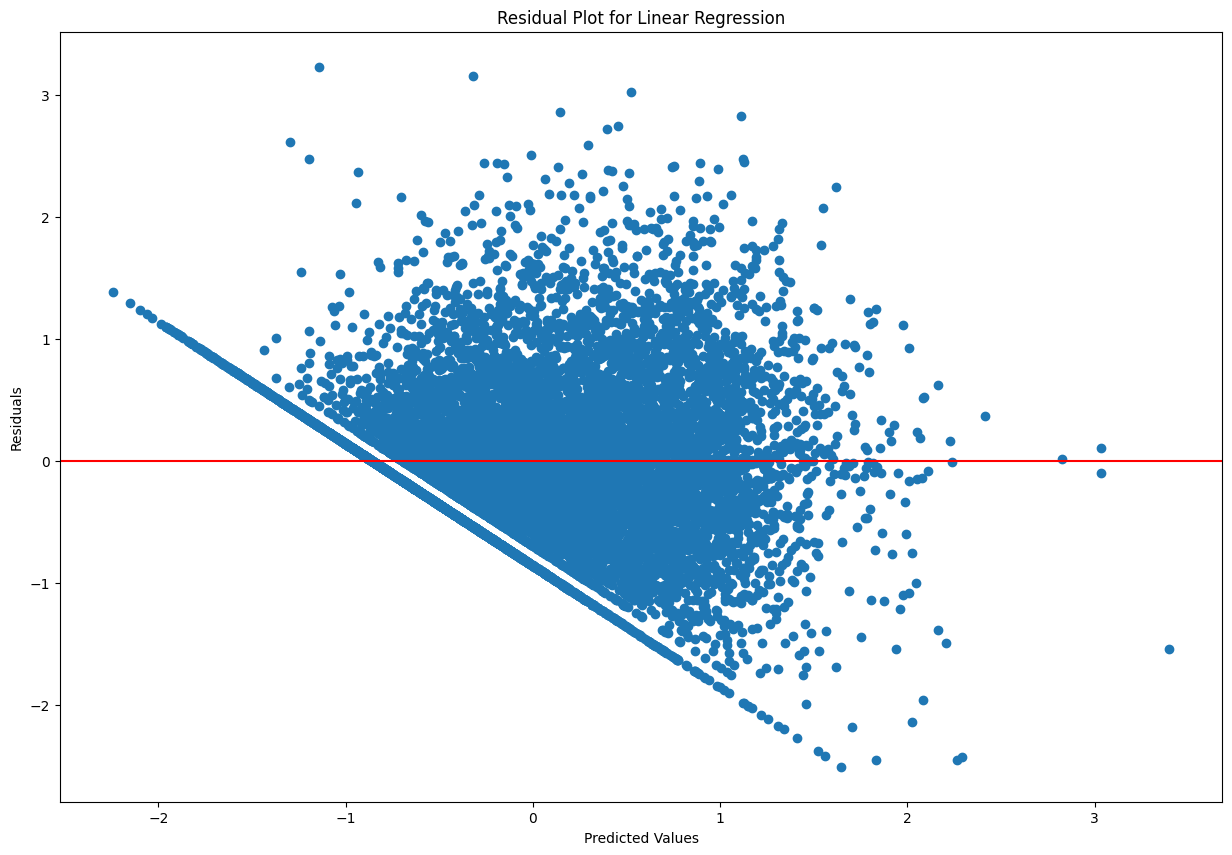

In [ ]:
#Test of assumptions
model_linear = linear_regression_unified
y_pred_linear = model_linear.predict(X_val_unified)

# 1. Normality of Residuals (Shapiro-Wilk Test)
residuals = y_val_unified - y_pred_linear
statistic, p_value = shapiro(residuals)
print("Shapiro-Wilk Test for Normality:")
print("Statistic:", statistic)
print("p-value:", p_value)



# 2. Linearity (Visual Inspection of Residual Plots)
plt.scatter(y_pred_linear, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig("Residual Plot for Linear Regression.png")
plt.show()


In [ ]:


# Evaluate the initial models on the validation set
models = [linear_regression_unified, decision_tree_unified, random_forest_unified, gradient_boosting_unified]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_val_unified)
    mse = mean_squared_error(y_val_unified, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val_unified, y_pred)
    r2 = r2_score(y_val_unified, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}")

In [ ]:
sample_size = 5000
X_train_sample_unified = X_train_unified.sample(n=sample_size, random_state=42)
y_train_sample_unified = y_train_unified.sample(n=sample_size, random_state=42)



In [ ]:
#Linear regression - Baseline
print("Tuning Linear Regression...")

param_distributions = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

linear_regression = LinearRegression()

random_search_lr = RandomizedSearchCV(
    estimator=linear_regression,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search_lr.fit(X_train_sample_unified, y_train_sample_unified)  # Using the sample

best_linear_regression = random_search_lr.best_estimator_
print(f"Best parameters for Linear Regression: {random_search_lr.best_params_}")

In [ ]:
# Decision Tree
print("Tuning Decision Tree...")
param_distributions = {
    'max_depth': [2, 3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'splitter': ['best', 'random']
}
decision_tree = DecisionTreeRegressor(random_state=42)
random_search_dt = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=param_distributions,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_dt.fit(X_train_sample_unified, y_train_sample_unified)  # Using the sample
best_decision_tree = random_search_dt.best_estimator_
print(f"Best parameters for Decision Tree: {random_search_dt.best_params_}")

In [ ]:
# Random Forest
print("Tuning Random Forest...")
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
random_forest = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_rf.fit(X_train_sample_unified, y_train_sample_unified)
best_random_forest = random_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")

Tuning Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}


In [ ]:
# Gradient Boosting
print("Tuning Gradient Boosting...")
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gradient_boosting = GradientBoostingRegressor(random_state=42)
random_search_gb = RandomizedSearchCV(
    estimator=gradient_boosting,
    param_distributions=param_distributions,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_gb.fit(X_train_sample_unified, y_train_sample_unified)  # Using the sample
best_gradient_boosting = random_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")

In [ ]:
# Gradient Boosting
print("Tuning Gradient Boosting...")
param_distributions = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5,7,9]
}
gradient_boosting = GradientBoostingRegressor(random_state=42)
random_search_gb = RandomizedSearchCV(
    estimator=gradient_boosting,
    param_distributions=param_distributions,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_gb.fit(X_train_sample_unified, y_train_sample_unified)  # Using the sample
best_gradient_boosting = random_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")

In [ ]:
# Print the best parameters for each model
print(f"Best parameters for Linear Regression: {random_search_lr.best_params_}")
print(f"Best parameters for Decision Tree: {random_search_dt.best_params_}")
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")

In [ ]:
models_unified = [best_linear_regression, best_decision_tree, best_random_forest, best_gradient_boosting]
model_names_unified = ['Linear Regression (Unified)','Decision Tree (Unified)', 'Random Forest (Unified)', 'Gradient Boosting (Unified)']

for model, model_name in zip(models_unified, model_names_unified):
    y_pred_unified = model.predict(X_val_unified)
    mse = mean_squared_error(y_val_unified, y_pred_unified)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val_unified, y_pred_unified)
    r2 = r2_score(y_val_unified, y_pred_unified)
    print(f"{model_name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}")


In [ ]:
for model, model_name in zip(models_unified, model_names_unified):
    try:
        # Generate predictions on the test set
        y_pred_test_unified = model.predict(X_test_unified)

        # Calculate evaluation metrics
        mse_test = mean_squared_error(y_test_unified, y_pred_test_unified)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test_unified, y_pred_test_unified)
        r2_test = r2_score(y_test_unified, y_pred_test_unified)


        print(f"{model_name} - Test MSE: {mse_test:.4f}, Test RMSE: {rmse_test:.4f}, "
              f"Test MAE: {mae_test:.4f}, Test R-squared: {r2_test:.4f}")

    except Exception as e:
        print(f"Error evaluating {model_name} on test set: {e}")

Facebook

In [ ]:
features_fb = ['SentimentTitle', 'SentimentHeadline',
            'DayOfWeek', 'Month', 'Year', 'Hour']

features_fb += [col for col in news_df.columns if col.startswith(('Topic_', 'Source_'))]
features_fb += title_cols + headline_cols

X_facebook = news_df[news_df['Facebook_negative'] == 0][features]
y_facebook = news_df[news_df['Facebook_negative'] == 0]['Facebook_log']

# Split the data into training and test sets (60% train, 40% test)
X_train_fb, X_temp_fb, y_train_fb, y_temp_fb = train_test_split(X_facebook, y_facebook, test_size=0.4, random_state=42)
X_val_fb, X_test_fb, y_val_fb, y_test_fb = train_test_split(X_temp_fb, y_temp_fb, test_size=0.5, random_state=42)



# Print the shapes of the resulting sets
print("Training set shape:", X_train_fb.shape, y_train_fb.shape)
print("Validation set shape:",
 X_val_fb.shape, y_val_fb.shape)
print("Test set shape:", X_test_fb.shape, y_test_fb.shape)



Training set shape: (31176, 2002) (31176,)
Validation set shape: (10392, 2002) (10392,)
Test set shape: (10392, 2002) (10392,)


In [ ]:
linear_regression_facebook = LinearRegression()
decision_tree_facebook = DecisionTreeRegressor(random_state=42)
random_forest_facebook = RandomForestRegressor(random_state=42)
gradient_boosting_facebook = GradientBoostingRegressor(random_state=42)





In [ ]:
# Train the Facebook models
linear_regression_facebook.fit(X_train_fb, y_train_fb)

In [ ]:
decision_tree_facebook.fit(X_train_fb, y_train_fb)


In [ ]:
random_forest_facebook.fit(X_train_fb, y_train_fb)


RandomForestRegressor(random_state=42)

In [ ]:
gradient_boosting_facebook.fit(X_train_fb, y_train_fb)

In [ ]:

# Evaluate the initial models on the validation set
models_fb = [linear_regression_facebook, decision_tree_facebook, random_forest_facebook, gradient_boosting_facebook]
model_names_fb = ['Linear Regression','Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, model_name in zip(models_fb, model_names_fb):
    y_pred_fb = model.predict(X_val_fb)
    mse_fb = mean_squared_error(y_val_fb, y_pred_fb)
    rmse_fb = np.sqrt(mse_fb)
    mae_fb = mean_absolute_error(y_val_fb, y_pred_fb)
    r2_fb = r2_score(y_val_fb, y_pred_fb)
    print(f"{model_name} - MSE: {mse_fb:.4f}, RMSE: {rmse_fb:.4f}, MAE: {mae_fb:.4f}, R-squared: {r2_fb:.4f}")


In [ ]:
features_linkedin = ['SentimentTitle', 'SentimentHeadline',
            'DayOfWeek', 'Month', 'Year', 'Hour']

features_linkedin += [col for col in news_df.columns if col.startswith(('Topic_', 'Source_'))]
features_linkedin += title_cols + headline_cols

X_linkedin = news_df[news_df['LinkedIn_negative'] == 0][features]
y_linkedin = news_df[news_df['LinkedIn_negative'] == 0]['LinkedIn_log']

X_train_linkedin, X_temp_linkedin, y_train_linkedin, y_temp_linkedin = train_test_split(X_linkedin, y_linkedin, test_size=0.4, random_state=42)
X_val_linkedin, X_test_linkedin, y_val_linkedin, y_test_linkedin = train_test_split(X_temp_linkedin, y_temp_linkedin, test_size=0.5, random_state=42)


# Print the shapes of the resulting sets
print("Training set shape:", X_train_linkedin.shape, y_train_linkedin.shape)
print("Validation set shape:",
 X_val_linkedin.shape, y_val_linkedin.shape)
print("Test set shape:", X_test_linkedin.shape, y_test_linkedin.shape)


Training set shape: (31327, 2002) (31327,)
Validation set shape: (10443, 2002) (10443,)
Test set shape: (10443, 2002) (10443,)


In [ ]:
linear_regression_linkedin = LinearRegression()
decision_tree_linkedin = DecisionTreeRegressor(random_state=42)
random_forest_linkedin = RandomForestRegressor(random_state=42)
gradient_boosting_linkedin = GradientBoostingRegressor(random_state=42)



In [ ]:
# Train the LinkedIn models
linear_regression_linkedin.fit(X_train_linkedin, y_train_linkedin)


In [ ]:
decision_tree_linkedin.fit(X_train_linkedin, y_train_linkedin)


In [ ]:
random_forest_linkedin.fit(X_train_linkedin, y_train_linkedin)


RandomForestRegressor(random_state=42)

In [ ]:
gradient_boosting_linkedin.fit(X_train_linkedin, y_train_linkedin)

In [ ]:

# Evaluate the initial models on the validation set
models_linkedin = [linear_regression_linkedin, decision_tree_linkedin, random_forest_linkedin, gradient_boosting_linkedin]
model_names_linkedin = ['Linear Regression','Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, model_name in zip(models_linkedin, model_names_linkedin):
    y_pred_linkedin = model.predict(X_val_linkedin)
    mse_linkedin = mean_squared_error(y_val_linkedin, y_pred_linkedin)
    rmse_linkedin = np.sqrt(mse_linkedin)
    mae_linkedin = mean_absolute_error(y_val_linkedin, y_pred_linkedin)
    r2_linkedin = r2_score(y_val_linkedin, y_pred_linkedin)
    print(f"{model_name} - MSE: {mse_linkedin:.4f}, RMSE: {rmse_linkedin:.4f}, MAE: {mae_linkedin:.4f}, R-squared: {r2_linkedin:.4f}")


In [ ]:
sample_size = 5000
X_train_sample_fb = X_train_fb.sample(n=sample_size, random_state=42)
y_train_sample_fb = y_train_fb.sample(n=sample_size, random_state=42)

In [ ]:
sample_size = 5000
X_train_sample_linkedin = X_train_linkedin.sample(n=sample_size, random_state=42)
y_train_sample_linkedin = y_train_linkedin.sample(n=sample_size, random_state=42)

In [ ]:
#Linear regression - Baseline
print("Tuning Linear Regression...")

param_distributions_lr_fb = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
linear_regression_facebook = LinearRegression()

random_search_lr_fb = RandomizedSearchCV(
    estimator=linear_regression_facebook,
    param_distributions=param_distributions_lr_fb,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search_lr_fb.fit(X_train_sample_fb, y_train_sample_fb)  # Using the sample

best_linear_regression_facebook = random_search_lr_fb.best_estimator_
print(f"Best parameters for Linear Regression: {random_search_lr_fb.best_params_}")

In [ ]:


# Decision Tree - Facebook
print("Tuning Decision Tree for Facebook...")
param_distributions_dt_facebook = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree_facebook = DecisionTreeRegressor(random_state=42)
random_search_dt_facebook = RandomizedSearchCV(
    estimator=decision_tree_facebook,
    param_distributions=param_distributions_dt_facebook,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_dt_facebook.fit(X_train_sample_fb, y_train_sample_fb)
best_decision_tree_facebook = random_search_dt_facebook.best_estimator_
print(f"Best parameters for Decision Tree (Facebook): {random_search_dt_facebook.best_params_}")



In [ ]:
# Random Forest - Facebook
print("Tuning Random Forest for Facebook...")
param_distributions_rf_facebook = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
random_forest_facebook = RandomForestRegressor(random_state=42)
random_search_rf_facebook = RandomizedSearchCV(
    estimator=random_forest_facebook,
    param_distributions=param_distributions_rf_facebook,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_rf_facebook.fit(X_train_sample_fb, y_train_sample_fb)
best_random_forest_facebook = random_search_rf_facebook.best_estimator_
print(f"Best parameters for Random Forest (Facebook): {random_search_rf_facebook.best_params_}")


Tuning Random Forest for Facebook...
Best parameters for Random Forest (Facebook): {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}


In [ ]:
# Gradient Boosting - Facebook
print("Tuning Gradient Boosting for Facebook...")
param_distributions_gb_facebook = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gradient_boosting_facebook = GradientBoostingRegressor(random_state=42)
random_search_gb_facebook = RandomizedSearchCV(
    estimator=gradient_boosting_facebook,
    param_distributions=param_distributions_gb_facebook,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_gb_facebook.fit(X_train_sample_fb, y_train_sample_fb)
best_gradient_boosting_facebook = random_search_gb_facebook.best_estimator_
print(f"Best parameters for Gradient Boosting (Facebook): {random_search_gb_facebook.best_params_}")



In [ ]:
#Linear regression - Baseline
print("Tuning Linear Regression...")

param_distributions_lr_linkedin = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
linear_regression_linkedin = LinearRegression()

random_search_lr_linkedin = RandomizedSearchCV(
    estimator=linear_regression_linkedin,
    param_distributions=param_distributions_lr_linkedin,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search_lr_linkedin.fit(X_train_sample_linkedin, y_train_sample_linkedin)  # Using the sample

best_linear_regression_linkedin = random_search_lr_linkedin.best_estimator_
print(f"Best parameters for Linear Regression: {random_search_lr_linkedin.best_params_}")

In [ ]:
# Decision Tree - LinkedIn
print("Tuning Decision Tree for LinkedIn...")
param_distributions_dt_linkedin = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree_linkedin = DecisionTreeRegressor(random_state=42)
random_search_dt_linkedin = RandomizedSearchCV(
    estimator=decision_tree_linkedin,
    param_distributions=param_distributions_dt_linkedin,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_dt_linkedin.fit(X_train_sample_linkedin, y_train_sample_linkedin)
best_decision_tree_linkedin = random_search_dt_linkedin.best_estimator_
print(f"Best parameters for Decision Tree (LinkedIn): {random_search_dt_linkedin.best_params_}")



In [ ]:
# Random Forest - LinkedIn
print("Tuning Random Forest for LinkedIn...")
param_distributions_rf_linkedin = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
random_forest_linkedin = RandomForestRegressor(random_state=42)
random_search_rf_linkedin = RandomizedSearchCV(
    estimator=random_forest_linkedin,
    param_distributions=param_distributions_rf_linkedin,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_rf_linkedin.fit(X_train_sample_linkedin, y_train_sample_linkedin)
best_random_forest_linkedin = random_search_rf_linkedin.best_estimator_
print(f"Best parameters for Random Forest (LinkedIn): {random_search_rf_linkedin.best_params_}")



Tuning Random Forest for LinkedIn...
Best parameters for Random Forest (LinkedIn): {'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 10}


In [ ]:
# Gradient Boosting - LinkedIn
print("Tuning Gradient Boosting for LinkedIn...")
param_distributions_gb_linkedin = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gradient_boosting_linkedin = GradientBoostingRegressor(random_state=42)
random_search_gb_linkedin = RandomizedSearchCV(
    estimator=gradient_boosting_linkedin,
    param_distributions=param_distributions_gb_linkedin,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_gb_linkedin.fit(X_train_sample_linkedin, y_train_sample_linkedin)
best_gradient_boosting_linkedin = random_search_gb_linkedin.best_estimator_
print(f"Best parameters for Gradient Boosting (LinkedIn): {random_search_gb_linkedin.best_params_}")

In [ ]:
# Print the best parameters for each model
print(f"Best parameters for Linear Regression Facebook: {random_search_lr_fb.best_params_}")
print(f"Best parameters for Decision Tree Facebook: {random_search_dt_facebook.best_params_}")
print(f"Best parameters for Random Forest Facebook: {random_search_rf_facebook.best_params_}")
print(f"Best parameters for Gradient Boosting Facebook: {random_search_gb_facebook.best_params_}")

In [ ]:
# Print the best parameters for each model
print(f"Best parameters for Linear Regression LinkedIn: {random_search_lr_linkedin.best_params_}")
print(f"Best parameters for Decision Tree LinkedIn: {random_search_dt_linkedin.best_params_}")
print(f"Best parameters for Random Forest LinkedIn: {random_search_rf_linkedin.best_params_}")
print(f"Best parameters for Gradient Boosting LinkedIn: {random_search_gb_linkedin.best_params_}")

In [ ]:
#Facebook
models_facebook = [best_linear_regression_facebook, best_decision_tree_facebook, best_random_forest_facebook, best_gradient_boosting_facebook]
model_names_facebook = ['Linear Regression (Facebook)','Decision Tree (Facebook)', 'Random Forest (Facebook)', 'Gradient Boosting (Facebook)']

for model, model_name in zip(models_facebook, model_names_facebook):
    y_pred_fb = model.predict(X_val_fb)
    mse_fb = mean_squared_error(y_val_fb, y_pred_fb)
    rmse_fb = np.sqrt(mse_fb)
    mae_fb = mean_absolute_error(y_val_fb, y_pred_fb)
    r2_fb = r2_score(y_val_fb, y_pred_fb)
    print(f"{model_name} - MSE: {mse_fb:.4f}, RMSE: {rmse_fb:.4f}, MAE: {mae_fb:.4f}, R-squared: {r2_fb:.4f}")

In [ ]:
# Facebook
for model, model_name in zip(models_facebook, model_names_facebook):
    try:
        # Generate predictions on the test set
        y_pred_test_fb = model.predict(X_test_fb)  # Replace X_test_facebook with your actual test data

        # Calculate evaluation metrics
        mse_test_fb = mean_squared_error(y_test_fb, y_pred_test_fb)  # Replace y_test_facebook with your actual test labels
        rmse_test_fb = np.sqrt(mse_test_fb)
        mae_test_fb = mean_absolute_error(y_test_fb, y_pred_test_fb)
        r2_test_fb = r2_score(y_test_fb, y_pred_test_fb)

        # Print the results
        print(f"{model_name} - Test MSE: {mse_test_fb:.4f}, Test RMSE: {rmse_test_fb:.4f}, "
              f"Test MAE: {mae_test_fb:.4f}, Test R-squared: {r2_test_fb:.4f}")

    except Exception as e:
        print(f"Error evaluating {model_name} on test set: {e}")

In [ ]:
#LinkedIn
models_linkedin = [best_linear_regression_linkedin, best_decision_tree_linkedin, best_random_forest_linkedin, best_gradient_boosting_linkedin]
model_names_linkedin = ['Linear Regression (LinkedIn)','Decision Tree (LinkedIn)', 'Random Forest (LinkedIn)', 'Gradient Boosting (LinkedIn)']

for model, model_name in zip(models_linkedin, model_names_linkedin):
    y_pred_linkedin = model.predict(X_val_linkedin)
    mse_li = mean_squared_error(y_val_linkedin, y_pred_linkedin)
    rmse_li = np.sqrt(mse_li)
    mae_li = mean_absolute_error(y_val_linkedin, y_pred_linkedin)
    r2_li = r2_score(y_val_linkedin, y_pred_linkedin)
    print(f"{model_name} - MSE: {mse_li:.4f}, RMSE: {rmse_li:.4f}, MAE: {mae_li:.4f}, R-squared: {r2_li:.4f}")

In [ ]:
# LinkedIn
for model, model_name in zip(models_linkedin, model_names_linkedin):
    try:
        # Generate predictions on the test set
        y_pred_test_linkedin = model.predict(X_test_linkedin)  # Replace X_test_li with your actual test data

        # Calculate evaluation metrics
        mse_test_li = mean_squared_error(y_test_linkedin, y_pred_test_linkedin)  # Replace y_test_li with your actual test labels
        rmse_test_li = np.sqrt(mse_test_li)  # Use mse_test_li here
        mae_test_li = mean_absolute_error(y_test_linkedin, y_pred_test_linkedin)
        r2_test_li = r2_score(y_test_linkedin, y_pred_test_linkedin)

        # Print the results
        print(f"{model_name} - Test MSE: {mse_test_li:.4f}, Test RMSE: {rmse_test_li:.4f}, "
              f"Test MAE: {mae_test_li:.4f}, Test R-squared: {r2_test_li:.4f}")

    except Exception as e:
        print(f"Error evaluating {model_name} on test set: {e}")

RQ2

In [ ]:
# Print all column names (features)
print(news_df.columns.tolist())

['IDLink', 'Title', 'Headline', 'PublishDate', 'Facebook', 'LinkedIn', 'SentimentTitle', 'SentimentHeadline', 'DayOfWeek', 'Month', 'Year', 'Hour', 'ProcessedTitle', 'ProcessedHeadline', 'LinkedIn_negative', 'Facebook_negative', 'LinkedIn_log', 'Facebook_log', 'Topic_economy', 'Topic_microsoft', 'Topic_obama', 'Topic_palestine', 'Source_ ', 'Source_+972 Magazine', 'Source_/FILM', 'Source_12 News Phoenix', 'Source_12NewsNow.Com', 'Source_12news.com', 'Source_1340 WJOL', 'Source_13WMAZ', 'Source_13WMAZ.com', 'Source_13abc Action News', 'Source_13newsnow.com', 'Source_14 News WFIE Evansville', 'Source_14 WFIE Evansville', 'Source_20minutes.fr', 'Source_21Alive', 'Source_24/7 Wall St.', 'Source_24/7 Wall St. via Yahoo! Finance', 'Source_247Sports', 'Source_2paragraphs.com', 'Source_3DPrint.com', 'Source_3News NZ', 'Source_3ders.org (blog)', 'Source_3news', 'Source_41 NBC News', 'Source_4NI', 'Source_4k', 'Source_5 Eyewitness News St. Paul', 'Source_550 KTSA', 'Source_570 News', 'Source_580

In [ ]:
news_df.columns


Index(['IDLink', 'Title', 'Headline', 'PublishDate', 'Facebook', 'LinkedIn',
       'SentimentTitle', 'SentimentHeadline', 'DayOfWeek', 'Month',
       ...
       'headline_tfidf_990', 'headline_tfidf_991', 'headline_tfidf_992',
       'headline_tfidf_993', 'headline_tfidf_994', 'headline_tfidf_995',
       'headline_tfidf_996', 'headline_tfidf_997', 'headline_tfidf_998',
       'headline_tfidf_999'],
      dtype='object', length=6776)

In [ ]:
X = news_df.drop(['Facebook', 'LinkedIn', 'PublishDate', 'IDLink', 'Title', 'Headline', 'ProcessedTitle', 'ProcessedHeadline'], axis=1)
y = news_df[['LinkedIn_log', 'Facebook_log']]

feature_sets = {
    'Content-Only': ['SentimentTitle', 'SentimentHeadline'] + [col for col in X.columns if 'title_tfidf' in col or 'headline_tfidf' in col],
    'Platform-Only': [col for col in X.columns if 'Source_' in col or 'DayOfWeek_' in col or 'Month_' in col or 'Year_' in col],
    'All-Features': X_train_unified.columns.tolist()
}

In [ ]:
sample_size = 5000
X_train_sample_unified = X_train_unified.sample(n=sample_size, random_state=42)
y_train_sample_unified = y_train_unified.sample(n=sample_size, random_state=42)



In [ ]:

results = []

for feature_set_name, features in feature_sets.items():
    print(f"Evaluating Random Forest with {feature_set_name} features...")

    X_train_subset = X_train_sample_unified[features]
    X_test_subset = X_test_unified[features]

    # Initialize Random Forest model with the BEST hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=10,
        random_state=42
    )

    # Train the model (use y_train_unified for the unified model)
    rf_model.fit(X_train_subset, y_train_sample_unified)

    # Evaluate the model on the test set
    y_pred = rf_model.predict(X_test_subset)

    # Calculate metrics for the unified model
    results.append({
        'feature_set': feature_set_name,
        'MAE': mean_absolute_error(y_test_unified, y_pred),
        'MSE': mean_squared_error(y_test_unified, y_pred),
        'RMSE': np.sqrt(mse)),
        'R2': r2_score(y_test_unified, y_pred),
    })

results_df_rf = pd.DataFrame(results)

Evaluating Random Forest with Content-Only features...
Evaluating Random Forest with Platform-Only features...
Evaluating Random Forest with All-Features features...


In [ ]:
print("\nPerformance of Random Forest with Different Feature Sets:")
print(results_df_rf)

best_rf_features = results_df_rf.sort_values(by='R2').iloc[0]
print("\nBest Performing Random Forest Feature Set:")
print(best_rf_features)


Performance of Random Forest with Different Feature Sets:
     feature_set       MAE       MSE      RMSE        R2
0   Content-Only  0.635764  0.683755  0.683755  0.061603
1  Platform-Only  0.520260  0.553326  0.553326  0.240607
2   All-Features  0.526310  0.509629  0.509629  0.300576

Best Performing Random Forest Feature Set:
feature_set    Content-Only
MAE                0.635764
MSE                0.683755
RMSE               0.683755
R2                 0.061603
Name: 0, dtype: object


In [ ]:
y_pred_unified = random_forest_unified.predict(X_val_unified)

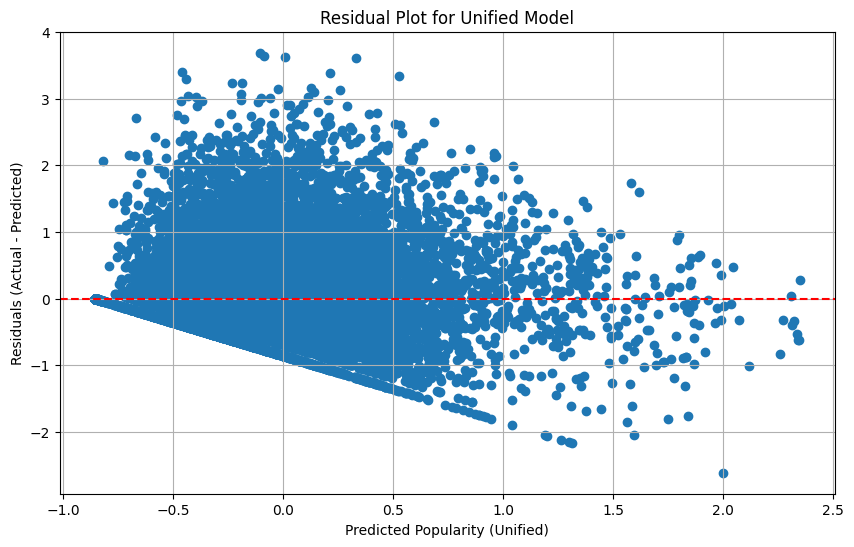

In [ ]:
# 1. Residual Plots
y_pred_unified = best_random_forest.predict(X_val_unified)
residuals_unified = y_val_unified - y_pred_unified

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_unified, residuals_unified)
plt.xlabel("Predicted Popularity (Unified)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Unified Model")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.savefig("residual_plot_unified.png")
plt.show()

# 2. Subgroup Examination (by Topic and Source)

# Ensure 'Topic' and 'Source' columns are in your X_val_unified DataFrame
if 'Topic' in X_val_unified.columns and 'Source' in X_val_unified.columns:
    topics = X_val_unified['Topic'].unique()
    sources = X_val_unified['Source'].unique()

    topic_performance = {}
    for topic in topics:
        topic_indices = X_val_unified[X_val_unified['Topic'] == topic].index
        y_val_topic = y_val_unified.loc[topic_indices]
        y_pred_topic = y_pred_unified[topic_indices]

        if len(y_val_topic) > 0:
            mae_topic = mean_absolute_error(y_val_topic, y_pred_topic)
            mse_topic = mean_squared_error(y_val_topic, y_pred_topic)
            rmse_topic = np.sqrt(mse_topic)
            r2_topic = r2_score(y_val_topic, y_pred_topic)
            topic_performance[topic] = {'MAE': mae_topic, 'MSE': mse_topic, 'RMSE': rmse_topic, 'R2': r2_topic, 'n_samples': len(y_val_topic)}

    print("\nPerformance by Topic:")
    topic_df = pd.DataFrame.from_dict(topic_performance, orient='index')
    print(topic_df)

    source_performance = {}
    for source in sources:
        source_indices = X_val_unified[X_val_unified['Source'] == source].index
        y_val_source = y_val_unified.loc[source_indices]
        y_pred_source = y_pred_unified[source_indices]

        if len(y_val_source) > 0:
            mae_source = mean_absolute_error(y_val_source, y_pred_source)
            mse_source = mean_squared_error(y_val_source, y_pred_source)
            rmse_source = np.sqrt(mse_source)
            r2_source = r2_score(y_val_source, y_pred_source)
            source_performance[source] = {'MAE': mae_source, 'MSE': mse_source, 'RMSE': rmse_source, 'R2': r2_source, 'n_samples': len(y_val_source)}

    print("\nPerformance by Source:")
    source_df = pd.DataFrame.from_dict(source_performance, orient='index')
    print(source_df)

In [ ]:
print("Shape of y_val_unified:", y_val_unified.shape)
print("Shape of y_pred_unified:", y_pred_unified.shape)

Shape of y_val_unified: (11186,)
Shape of y_pred_unified: (11186,)


In [ ]:
print("Sample of y_val_topic.index:", y_val_topic.index[:5])

Sample of y_val_topic.index: Index([54791, 30457, 20795, 25764, 55863], dtype='int64')


In [ ]:
# Group by Topic
topic_cols = [col for col in X_val_unified.columns if col.startswith('Topic_')]
if topic_cols:
    topic_performance = {}
    unique_topics = [col.split('Topic_')[1] for col in topic_cols]

    # Get the positional index for each row in X_val_unified
    x_val_indices = X_val_unified.index

    for i, topic_col in enumerate(topic_cols):
        topic_name = unique_topics[i]
        original_topic_indices = X_val_unified[X_val_unified[topic_col] == 1].index

        positional_topic_indices = x_val_indices.get_indexer(original_topic_indices)

        # Use these positional indices to slice y_val_unified and y_pred_unified
        y_val_topic = y_val_unified.iloc[positional_topic_indices].values  # Use iloc for positional indexing
        y_pred_topic = y_pred_unified[positional_topic_indices]          # Use positional indexing

        if len(y_val_topic) > 0:
            mae_topic = mean_absolute_error(y_val_topic, y_pred_topic)
            mse_topic = mean_squared_error(y_val_topic, y_pred_topic)
            rmse_topic = np.sqrt(mse_topic)
            r2_topic = r2_score(y_val_topic, y_pred_topic)
            topic_performance[topic_name] = {'MAE': mae_topic, 'MSE': mse_topic, 'RMSE': rmse_topic, 'R2': r2_topic, 'n_samples': len(y_val_topic)}

    print("\nPerformance by Topic:")
    topic_df = pd.DataFrame.from_dict(topic_performance, orient='index')
    print(topic_df)
else:
    print("\nNo 'Topic_' columns found in X_val_unified. Cannot perform subgroup examination by Topic.")

# Group by Source
source_cols = [col for col in X_val_unified.columns if col.startswith('Source_')]
if source_cols:
    source_performance = {}
    unique_sources = [col.split('Source_')[1] for col in source_cols] # Get original source names

    # Get the positional index for each row in X_val_unified
    x_val_indices = X_val_unified.index

    for i, source_col in enumerate(source_cols):
        source_name = unique_sources[i]
        original_source_indices = X_val_unified[X_val_unified[source_col] == 1].index

        positional_source_indices = x_val_indices.get_indexer(original_source_indices)

        # Use these positional indices to slice y_val_unified and y_pred_unified
        y_val_source = y_val_unified.iloc[positional_source_indices].values  # Use iloc for positional indexing
        y_pred_source = y_pred_unified[positional_source_indices]          # Use positional indexing

        if len(y_val_source) > 0:
            mae_source = mean_absolute_error(y_val_source, y_pred_source)
            mse_source = mean_squared_error(y_val_source, y_pred_source)
            rmse_source = np.sqrt(mse_source)
            r2_source = r2_score(y_val_source, y_pred_source)
            source_performance[source_name] = {'MAE': mae_source, 'MSE': mse_source, 'RMSE': rmse_source, 'R2': r2_source, 'n_samples': len(y_val_source)}

    print("\nPerformance by Source:")
    source_df = pd.DataFrame.from_dict(source_performance, orient='index')
    print(source_df)
else:
    print("\nNo 'Source_' columns found in X_val_unified. Cannot perform subgroup examination by Source.")


Performance by Topic:
                MAE       MSE      RMSE        R2  n_samples
economy    0.553003  0.564110  0.751072  0.197092       4103
microsoft  0.526438  0.520753  0.721632  0.369276       2598
obama      0.572976  0.582361  0.763126  0.217407       3367
palestine  0.339443  0.250186  0.500186  0.216388       1118

Performance by Source:
                                       MAE       MSE      RMSE        R2  \
                                  0.288029  0.152050  0.389935 -0.323071   
+972 Magazine                     0.355689  0.379544  0.616071  0.202864   
13newsnow.com                     0.862439  0.743801  0.862439       NaN   
24/7 Wall St.                     0.343873  0.283162  0.532130  0.179204   
24/7 Wall St. via Yahoo! Finance  0.419607  0.176070  0.419607       NaN   
...                                    ...       ...       ...       ...   
thejournal.ie                     1.876162  3.519985  1.876162       NaN   
vtdigger.org                      0.5333

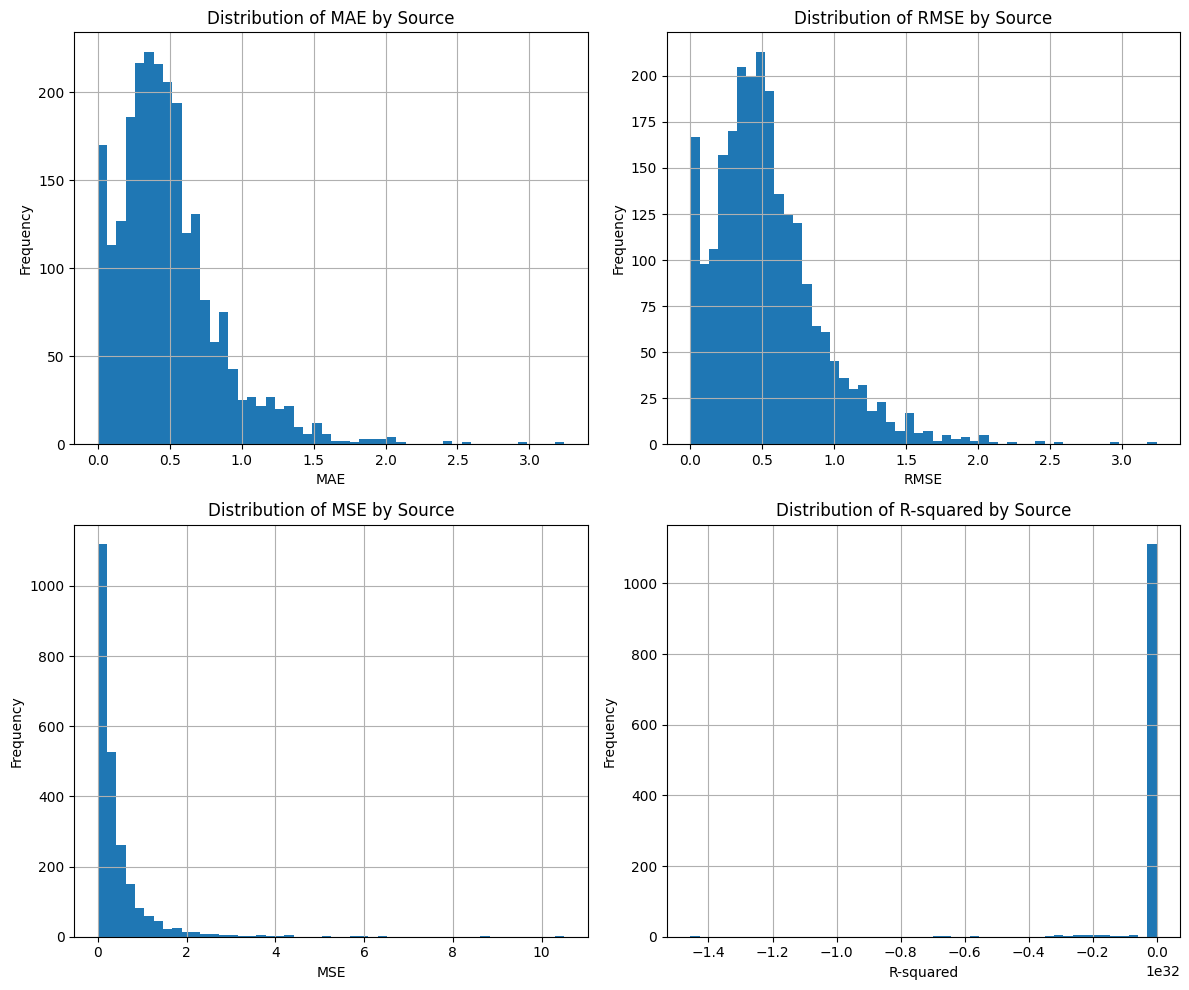

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
source_df['MAE'].hist(bins=50)
plt.title('Distribution of MAE by Source')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
source_df['RMSE'].hist(bins=50)
plt.title('Distribution of RMSE by Source')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
source_df['MSE'].hist(bins=50)
plt.title('Distribution of MSE by Source')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
source_df['R2'].hist(bins=50)
plt.title('Distribution of R-squared by Source')
plt.xlabel('R-squared')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("Source distribution")
plt.show()

SQ3

Unified Model Feature Importances:
                      Feature  Importance
7           Facebook_negative    0.063879
6369       headline_tfidf_603    0.042181
5861        headline_tfidf_95    0.025308
3959         Source_The Verge    0.023937
1           SentimentHeadline    0.019879
5                        Hour    0.019556
4611             Source_ZDNet    0.017294
0              SentimentTitle    0.016533
6           LinkedIn_negative    0.015077
3470        Source_TechCrunch    0.015059
3694      Source_The Guardian    0.014968
2648    Source_New York Times    0.011079
5360          title_tfidf_594    0.010547
4200       Source_VentureBeat    0.009627
6324       headline_tfidf_558    0.009096
1365   Source_Financial Times    0.008553
524   Source_Business Insider    0.008076
6442       headline_tfidf_676    0.007944
2                   DayOfWeek    0.007416
5016          title_tfidf_250    0.006679


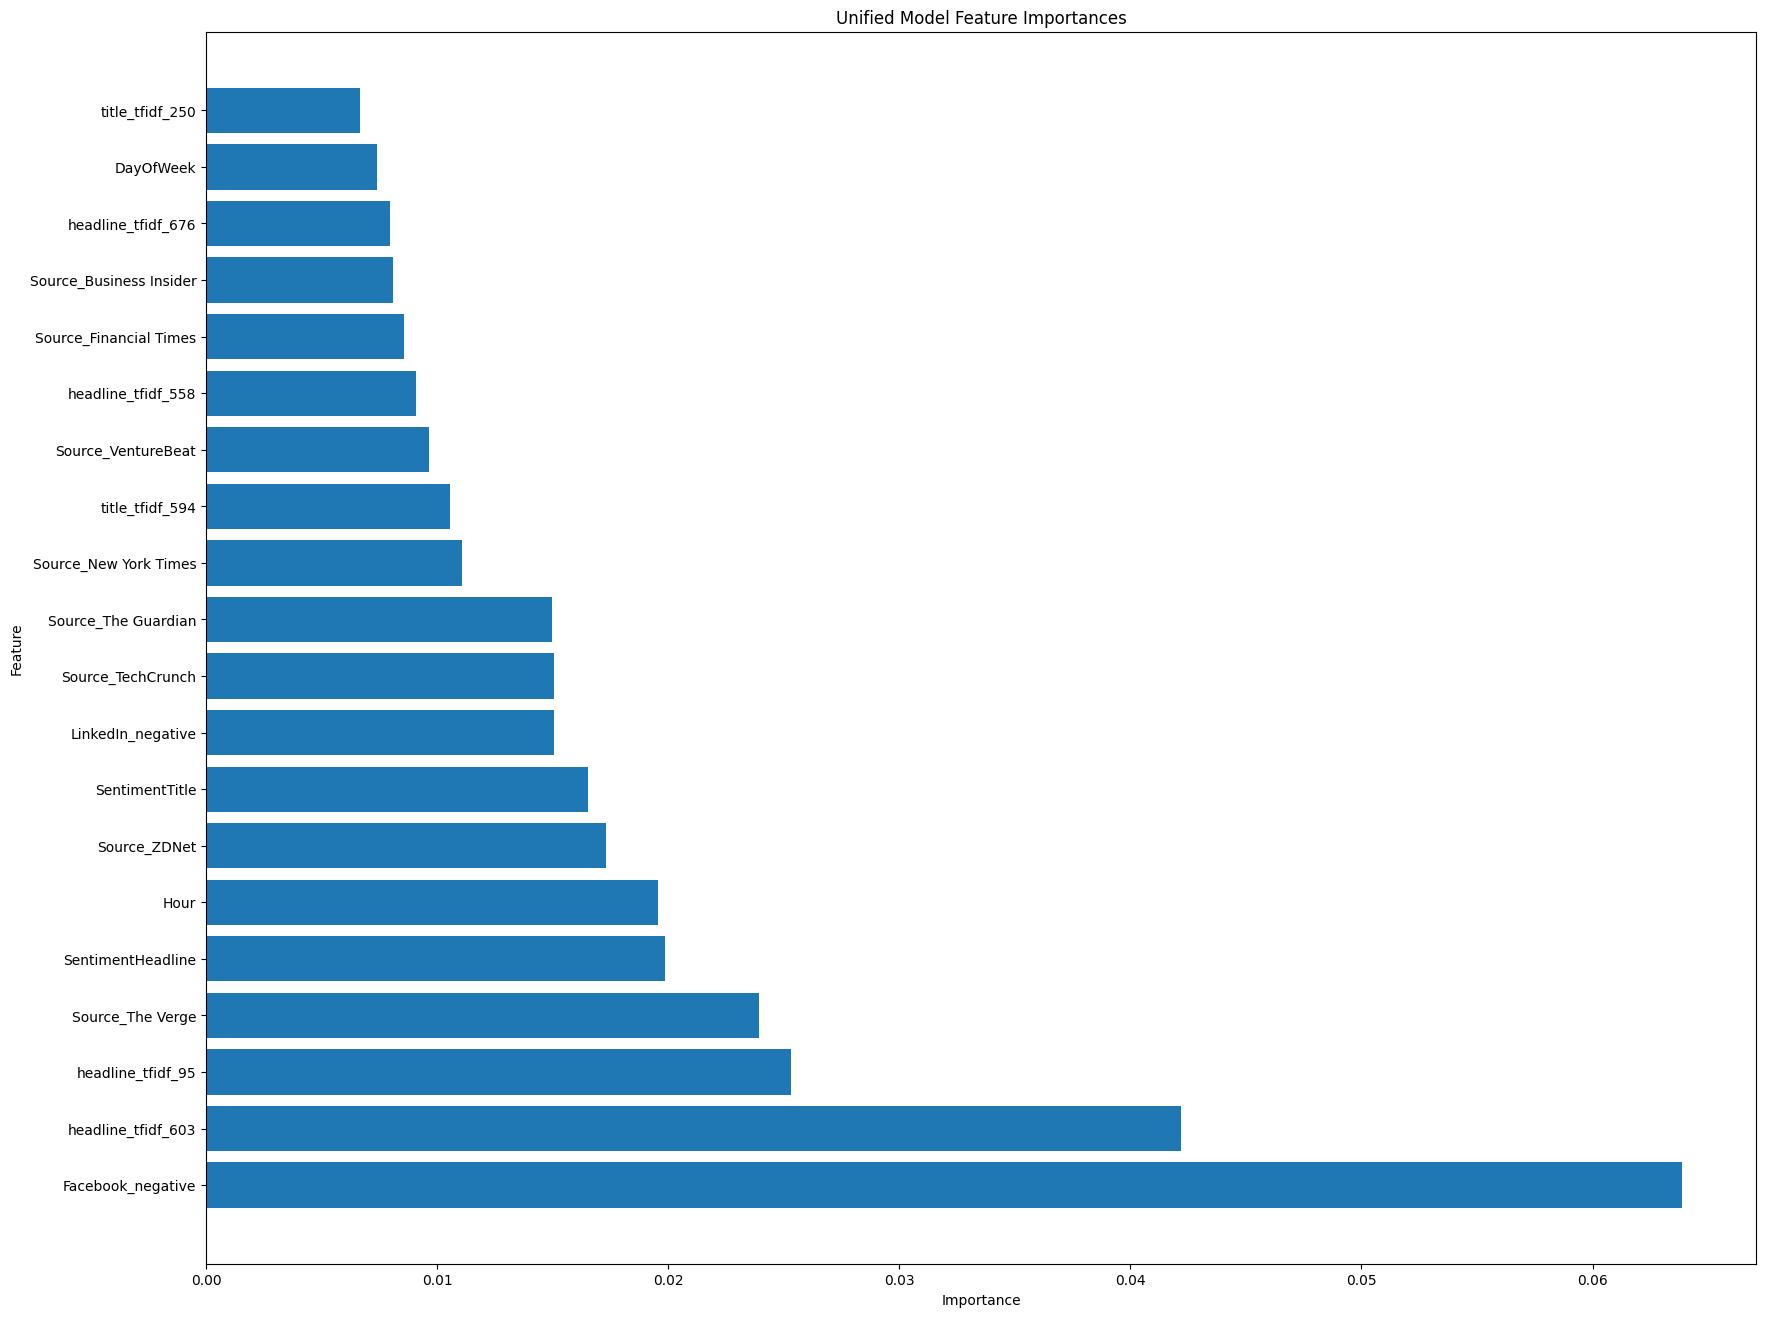

In [ ]:
# Get feature importances for the unified model
if hasattr(best_random_forest, 'feature_importances_'):
    importances_unified = best_random_forest.feature_importances_
    feature_names_unified = X_train_unified.columns

    feature_importances_unified = pd.DataFrame({'Feature': feature_names_unified, 'Importance': importances_unified})
    feature_importances_unified = feature_importances_unified.sort_values(by='Importance', ascending=False).head(20)
    print("Unified Model Feature Importances:")
    print(feature_importances_unified)

if hasattr(best_random_forest, 'feature_importances_'):
    plt.figure(figsize=(20, 16))
    plt.barh(feature_importances_unified['Feature'], feature_importances_unified['Importance'])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Unified Model Feature Importances")
    plt.savefig("Unified Model Feature Importances.png")
    plt.show()

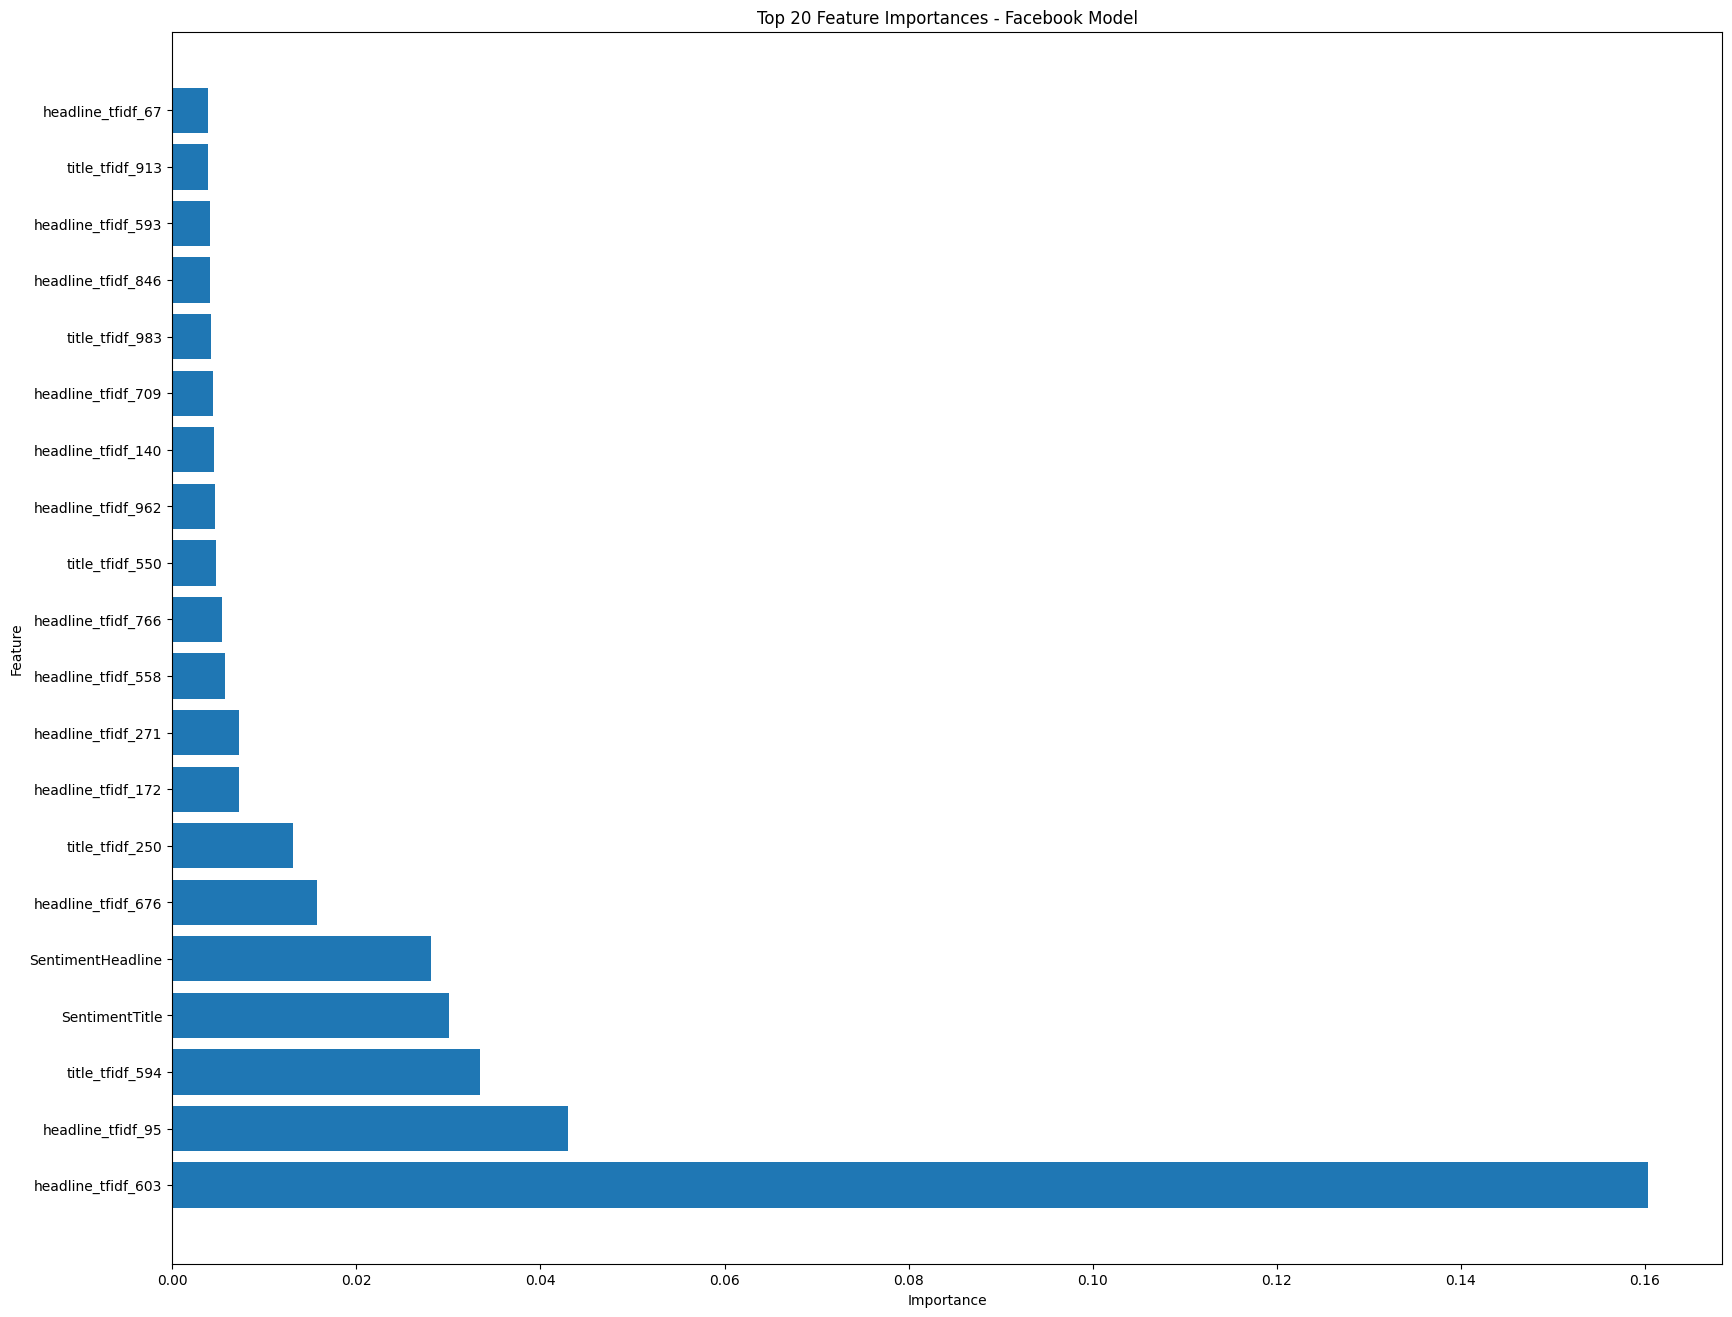

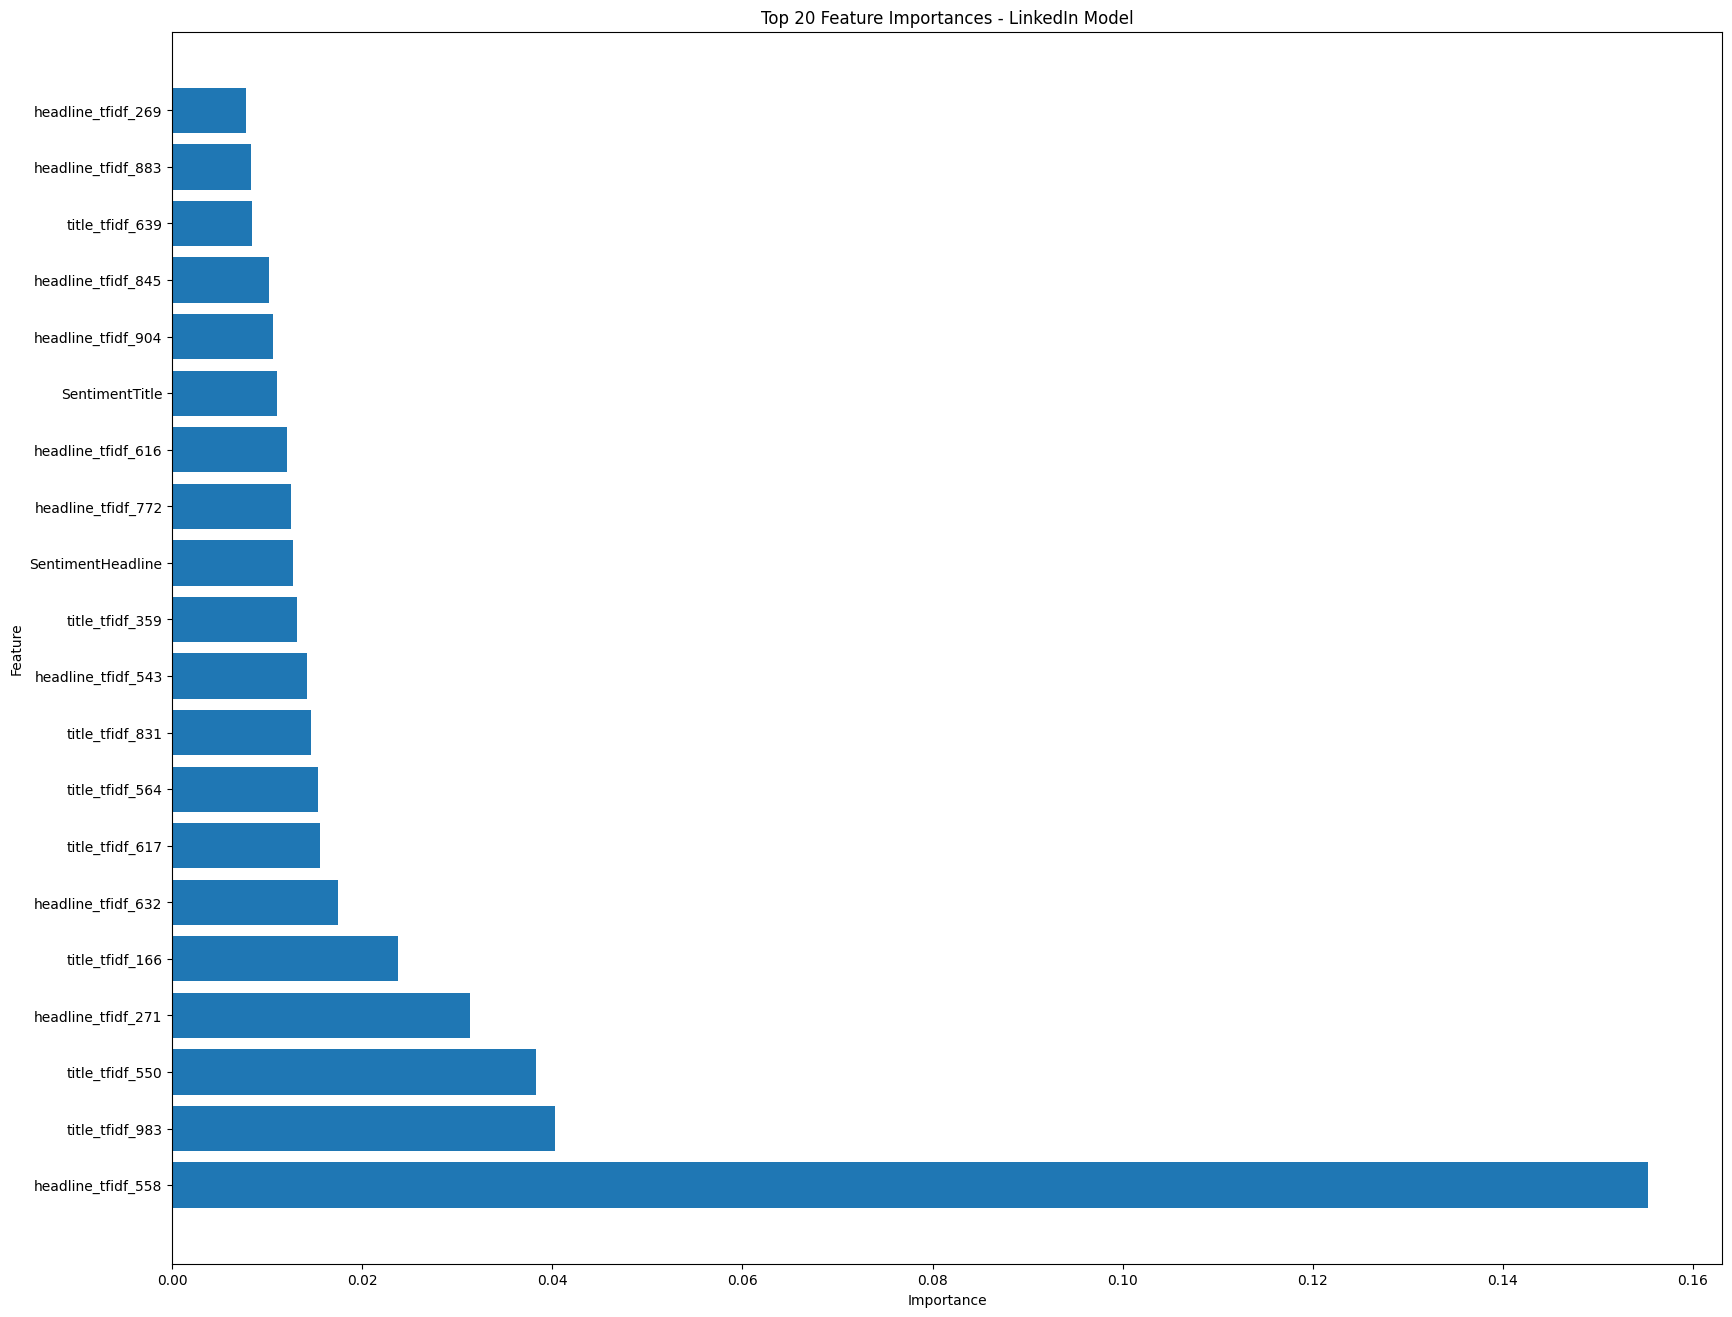

In [ ]:
# Get feature importances for the Facebook model
if hasattr(best_random_forest_facebook, 'feature_importances_'):
    importances_facebook = best_random_forest_facebook.feature_importances_
    feature_names_facebook = X_train_fb.columns
    feature_importances_facebook = pd.DataFrame({'Feature': feature_names_facebook, 'Importance': importances_facebook})
    feature_importances_facebook = feature_importances_facebook.sort_values(by='Importance', ascending=False).head(20) # Display top 20


    plt.figure(figsize=(20, 16))
    plt.barh(feature_importances_facebook['Feature'], feature_importances_facebook['Importance'])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Top 20 Feature Importances - Facebook Model")
    plt.savefig("Facebook_Top20_Feature_Importance.png")
    plt.show()
else:
    print("\nFacebook model does not have feature_importances_ attribute.")

# Get feature importances for the LinkedIn model
if hasattr(best_random_forest_linkedin, 'feature_importances_'):
    importances_linkedin = best_random_forest_linkedin.feature_importances_
    feature_names_linkedin = X_train_linkedin.columns
    feature_importances_linkedin = pd.DataFrame({'Feature': feature_names_linkedin, 'Importance': importances_linkedin})
    feature_importances_linkedin = feature_importances_linkedin.sort_values(by='Importance', ascending=False).head(20) # Display top 20

    plt.figure(figsize=(20, 16))
    plt.barh(feature_importances_linkedin['Feature'], feature_importances_linkedin['Importance'])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Top 20 Feature Importances - LinkedIn Model")
    plt.savefig("LinkedIn_Top20_Feature_Importance.png")
    plt.show()
else:
    print("\nLinkedIn model does not have feature_importances_ attribute.")

SQ4

SQ4

In [ ]:
#Robustness check
X = news_df[features]
y_facebook = news_df['Facebook']
y_linkedin = news_df['LinkedIn']

y_unified_original = (y_facebook + y_linkedin) / 2

X_train, X_test, y_unified_original_train, y_unified_original_test = train_test_split(
    X, y_unified_original, test_size=0.2, random_state=42
)
X_train, X_val, y_unified_original_train, y_unified_original_val = train_test_split(
    X_train, y_unified_original_train, test_size=0.25, random_state=42)

# Train and evaluate the unified model on the untransformed, averaged target variable
model_unified_untransformed = RandomForestRegressor()
model_unified_untransformed.fit(X_train, y_unified_original_train)
y_pred_unified_untransformed = model_unified_untransformed.predict(X_val)

# Calculate evaluation metrics
mse_unified_untransformed = mean_squared_error(y_unified_original_val, y_pred_unified_untransformed)
mae_unified_untransformed = mean_absolute_error(y_unified_original_val, y_pred_unified_untransformed)
rmse_unified_untransformed = mean_squared_error(y_unified_original_val, y_pred_unified_untransformed)
r2_unified_untransformed = r2_score(y_unified_original_val, y_pred_unified_untransformed)


print("Unified Model (Untransformed Data)")
print("MSE:", mse_unified_untransformed)
print("MAE:", mae_unified_untransformed)
print("RMSE:", rmse_unified_untransformed)
print("R-squared:", r2_unified_untransformed)



Unified Model (Untransformed Data)
MSE: 152777.51774314995
MAE: 97.4932399839233
RMSE: 152777.51774314995
R-squared: -0.03684168677176425


In [ ]:

# 1. Identify Class Imbalance
popularity_threshold = y_train_unified.mean()
y_train_binary = (y_train_unified > popularity_threshold).astype(int)
y_test_binary = (y_test_unified > popularity_threshold).astype(int)

print("Original class distribution in training data:", Counter(y_train_binary))
print("Original class distribution in test data:", Counter(y_test_binary))

# 2. Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_unified, y_train_binary)

print("\nClass distribution after undersampling:", Counter(y_train_undersampled))

rf_undersampled = RandomForestRegressor(**best_random_forest.get_params())
rf_undersampled.fit(X_train_undersampled, y_train_unified[X_train_undersampled.index])
y_pred_undersampled = rf_undersampled.predict(X_test_unified)

mse_undersampled = mean_squared_error(y_test_unified, y_pred_undersampled)
mae_undersampled = mean_absolute_error(y_test_unified, y_pred_undersampled)
rmse_undersampled = np.sqrt(mean_squared_error(y_test_unified, y_pred_undersampled))
r2_undersampled = r2_score(y_test_unified, y_pred_undersampled)

print("\nPerformance on test set after undersampling:")
print(f"MSE: {mse_undersampled:.4f}, MAE: {mae_undersampled:.4f}, RMSE: {rmse_undersampled:.4f}, R2: {r2_undersampled:.4f}")



Original class distribution in training data: Counter({0: 19651, 1: 13908})
Original class distribution in test data: Counter({0: 6532, 1: 4655})

Class distribution after undersampling: Counter({0: 13908, 1: 13908})

Performance on test set after undersampling:
MAE: 0.4817, RMSE: 0.6470, R2: 0.4254

Class distribution after oversampling (SMOTE): Counter({1: 19651, 0: 19651})


KeyError: '[0, 1, 4, 6, 7, 11, 13, 17, 23, 25, 30, 31, 33, 34, 38, 40, 41, 43, 47, 49, 52, 53, 54, 61, 62, 65, 69, 70, 71, 75, 80, 81, 83, 86, 89, 90, 92, 95, 96, 98, 103, 107, 108, 109, 110, 114, 116, 118, 119, 120, 121, 122, 128, 130, 134, 139, 144, 147, 149, 150, 152, 157, 158, 165, 167, 170, 171, 173, 176, 180, 181, 182, 186, 187, 194, 195, 196, 198, 199, 200, 201, 204, 210, 212, 214, 216, 217, 219, 225, 226, 231, 232, 233, 237, 239, 241, 242, 243, 248, 250, 251, 252, 253, 261, 262, 263, 264, 266, 267, 268, 273, 274, 277, 278, 279, 280, 283, 285, 289, 292, 295, 297, 304, 308, 309, 310, 311, 312, 313, 314, 316, 317, 322, 323, 324, 325, 326, 330, 332, 334, 335, 341, 342, 343, 344, 351, 353, 354, 361, 369, 373, 374, 376, 377, 378, 381, 382, 383, 385, 387, 391, 396, 398, 399, 403, 407, 408, 409, 410, 413, 416, 418, 419, 423, 426, 428, 429, 430, 431, 433, 436, 437, 438, 439, 441, 444, 447, 452, 454, 455, 457, 460, 462, 464, 465, 466, 468, 469, 470, 471, 474, 475, 476, 479, 480, 482, 484, 491, 494, 498, 499, 501, 505, 508, 509, 512, 516, 517, 521, 523, 532, 536, 538, 540, 542, 543, 550, 554, 558, 564, 566, 573, 574, 578, 579, 580, 581, 584, 585, 586, 588, 593, 596, 600, 604, 606, 608, 609, 616, 618, 621, 623, 624, 625, 626, 628, 630, 631, 640, 643, 644, 646, 647, 648, 649, 651, 655, 657, 659, 664, 672, 673, 674, 675, 676, 677, 681, 682, 686, 687, 696, 697, 702, 703, 708, 709, 710, 712, 723, 724, 725, 729, 732, 733, 734, 736, 738, 740, 741, 742, 743, 745, 746, 747, 748, 750, 754, 756, 758, 762, 764, 768, 770, 771, 772, 773, 774, 775, 776, 779, 780, 790, 791, 793, 800, 802, 805, 807, 810, 811, 812, 816, 817, 821, 825, 827, 828, 829, 831, 833, 836, 837, 838, 839, 842, 843, 844, 847, 848, 850, 852, 853, 857, 861, 862, 866, 871, 873, 874, 875, 879, 883, 884, 890, 892, 896, 898, 902, 904, 906, 911, 913, 914, 918, 919, 920, 923, 926, 927, 928, 930, 932, 936, 938, 939, 940, 942, 943, 948, 949, 950, 951, 952, 953, 957, 959, 960, 961, 962, 963, 966, 967, 971, 977, 978, 979, 980, 983, 985, 986, 988, 989, 990, 991, 993, 994, 998, 1000, 1003, 1005, 1008, 1009, 1012, 1023, 1024, 1026, 1029, 1030, 1032, 1033, 1034, 1039, 1043, 1045, 1047, 1048, 1052, 1053, 1054, 1057, 1061, 1065, 1066, 1068, 1072, 1077, 1078, 1086, 1090, 1092, 1096, 1097, 1100, 1106, 1107, 1108, 1109, 1111, 1113, 1114, 1118, 1121, 1122, 1124, 1126, 1127, 1131, 1133, 1138, 1139, 1142, 1143, 1146, 1147, 1149, 1156, 1157, 1158, 1162, 1163, 1164, 1165, 1166, 1169, 1174, 1175, 1176, 1179, 1180, 1181, 1182, 1183, 1185, 1188, 1189, 1190, 1194, 1197, 1202, 1203, 1204, 1210, 1213, 1219, 1221, 1226, 1227, 1231, 1232, 1240, 1243, 1246, 1247, 1248, 1251, 1253, 1256, 1260, 1270, 1271, 1272, 1274, 1275, 1276, 1277, 1278, 1281, 1282, 1284, 1285, 1288, 1289, 1291, 1292, 1295, 1296, 1298, 1303, 1305, 1311, 1314, 1317, 1318, 1319, 1321, 1323, 1326, 1331, 1332, 1334, 1335, 1336, 1337, 1339, 1343, 1344, 1345, 1346, 1347, 1348, 1350, 1357, 1362, 1366, 1370, 1372, 1377, 1383, 1387, 1388, 1389, 1390, 1392, 1395, 1396, 1397, 1398, 1400, 1402, 1406, 1410, 1411, 1412, 1413, 1414, 1416, 1417, 1418, 1419, 1422, 1423, 1426, 1427, 1428, 1429, 1430, 1433, 1434, 1438, 1440, 1441, 1442, 1443, 1444, 1446, 1448, 1451, 1453, 1456, 1457, 1458, 1463, 1464, 1465, 1467, 1470, 1474, 1477, 1478, 1479, 1480, 1483, 1484, 1486, 1487, 1488, 1489, 1490, 1491, 1495, 1496, 1497, 1498, 1500, 1501, 1503, 1507, 1508, 1510, 1512, 1513, 1514, 1516, 1520, 1521, 1526, 1533, 1534, 1536, 1540, 1543, 1544, 1549, 1550, 1553, 1554, 1555, 1557, 1558, 1562, 1563, 1564, 1565, 1566, 1570, 1572, 1574, 1575, 1576, 1583, 1584, 1588, 1590, 1593, 1594, 1596, 1599, 1602, 1603, 1606, 1608, 1613, 1616, 1618, 1621, 1623, 1631, 1632, 1635, 1638, 1639, 1640, 1641, 1644, 1647, 1653, 1655, 1656, 1661, 1662, 1668, 1670, 1671, 1673, 1675, 1677, 1680, 1681, 1682, 1683, 1684, 1687, 1689, 1696, 1697, 1698, 1699, 1703, 1704, 1707, 1709, 1710, 1712, 1717, 1719, 1720, 1721, 1723, 1729, 1730, 1731, 1732, 1733, 1736, 1738, 1741, 1748, 1751, 1758, 1761, 1763, 1771, 1775, 1781, 1782, 1784, 1786, 1788, 1791, 1792, 1793, 1794, 1796, 1800, 1801, 1803, 1807, 1808, 1811, 1812, 1815, 1817, 1818, 1819, 1822, 1824, 1826, 1829, 1837, 1839, 1841, 1842, 1846, 1850, 1851, 1853, 1856, 1859, 1863, 1864, 1866, 1871, 1876, 1877, 1878, 1879, 1880, 1882, 1884, 1886, 1888, 1889, 1895, 1896, 1897, 1900, 1901, 1904, 1905, 1911, 1912, 1918, 1928, 1930, 1941, 1944, 1952, 1954, 1956, 1957, 1959, 1962, 1967, 1968, 1972, 1974, 1975, 1976, 1977, 1981, 1984, 1985, 1991, 1992, 1993, 1994, 1997, 2000, 2001, 2004, 2007, 2008, 2009, 2012, 2020, 2022, 2029, 2030, 2034, 2041, 2043, 2052, 2053, 2054, 2055, 2059, 2069, 2071, 2072, 2074, 2075, 2078, 2081, 2084, 2086, 2087, 2088, 2091, 2094, 2095, 2097, 2098, 2101, 2104, 2109, 2110, 2111, 2115, 2116, 2117, 2119, 2126, 2129, 2132, 2133, 2135, 2138, 2141, 2142, 2145, 2146, 2149, 2150, 2153, 2156, 2158, 2161, 2165, 2166, 2168, 2174, 2180, 2181, 2182, 2185, 2186, 2188, 2189, 2191, 2194, 2195, 2206, 2207, 2210, 2211, 2213, 2215, 2220, 2222, 2225, 2227, 2229, 2231, 2232, 2233, 2235, 2236, 2237, 2238, 2239, 2240, 2245, 2247, 2252, 2254, 2255, 2258, 2259, 2264, 2265, 2266, 2269, 2273, 2275, 2276, 2277, 2279, 2281, 2284, 2286, 2289, 2290, 2294, 2295, 2296, 2298, 2299, 2300, 2301, 2304, 2305, 2306, 2308, 2310, 2312, 2313, 2322, 2323, 2324, 2325, 2326, 2328, 2330, 2331, 2333, 2337, 2338, 2342, 2343, 2344, 2345, 2346, 2348, 2349, 2350, 2351, 2354, 2357, 2360, 2362, 2363, 2372, 2373, 2374, 2375, 2376, 2383, 2385, 2386, 2388, 2390, 2391, 2398, 2399, 2403, 2404, 2408, 2417, 2418, 2432, 2434, 2435, 2436, 2437, 2440, 2441, 2442, 2445, 2448, 2449, 2453, 2457, 2463, 2464, 2465, 2467, 2474, 2476, 2480, 2487, 2489, 2493, 2494, 2495, 2496, 2499, 2505, 2507, 2510, 2514, 2515, 2517, 2518, 2522, 2524, 2525, 2527, 2528, 2529, 2530, 2531, 2532, 2541, 2544, 2547, 2548, 2549, 2554, 2558, 2561, 2562, 2564, 2569, 2571, 2574, 2577, 2578, 2579, 2582, 2585, 2588, 2592, 2593, 2595, 2601, 2602, 2603, 2608, 2615, 2616, 2617, 2619, 2622, 2624, 2625, 2627, 2628, 2630, 2633, 2635, 2638, 2640, 2644, 2645, 2646, 2647, 2649, 2650, 2652, 2653, 2656, 2658, 2662, 2664, 2666, 2668, 2672, 2676, 2678, 2679, 2680, 2681, 2683, 2691, 2692, 2702, 2705, 2709, 2710, 2713, 2714, 2715, 2718, 2720, 2725, 2726, 2729, 2730, 2731, 2733, 2735, 2740, 2741, 2742, 2743, 2744, 2746, 2748, 2750, 2752, 2754, 2755, 2756, 2757, 2758, 2760, 2761, 2762, 2767, 2772, 2777, 2778, 2780, 2782, 2789, 2791, 2793, 2799, 2807, 2813, 2814, 2817, 2820, 2824, 2825, 2826, 2828, 2829, 2830, 2834, 2836, 2845, 2847, 2848, 2851, 2854, 2856, 2857, 2858, 2861, 2863, 2864, 2865, 2867, 2868, 2874, 2875, 2877, 2879, 2883, 2884, 2885, 2888, 2891, 2893, 2894, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2906, 2907, 2908, 2915, 2916, 2917, 2923, 2927, 2931, 2935, 2938, 2942, 2943, 2946, 2949, 2952, 2954, 2955, 2958, 2960, 2965, 2969, 2971, 2974, 2975, 2980, 2982, 2984, 2987, 2989, 2990, 2992, 2993, 2996, 2997, 3000, 3001, 3002, 3003, 3004, 3007, 3008, 3011, 3013, 3016, 3018, 3021, 3022, 3023, 3025, 3027, 3028, 3029, 3030, 3031, 3033, 3035, 3036, 3037, 3038, 3039, 3043, 3049, 3053, 3056, 3058, 3063, 3064, 3067, 3068, 3069, 3073, 3074, 3075, 3076, 3077, 3085, 3095, 3096, 3100, 3102, 3104, 3105, 3106, 3108, 3109, 3110, 3113, 3115, 3116, 3118, 3120, 3124, 3125, 3126, 3128, 3131, 3136, 3138, 3141, 3142, 3150, 3151, 3154, 3155, 3156, 3160, 3161, 3163, 3165, 3168, 3169, 3171, 3173, 3177, 3180, 3184, 3186, 3189, 3193, 3197, 3198, 3200, 3202, 3208, 3210, 3211, 3214, 3215, 3219, 3220, 3221, 3222, 3226, 3227, 3229, 3230, 3231, 3241, 3242, 3243, 3245, 3248, 3250, 3252, 3253, 3254, 3256, 3257, 3263, 3265, 3269, 3270, 3272, 3277, 3279, 3281, 3282, 3284, 3286, 3287, 3288, 3289, 3290, 3294, 3296, 3298, 3303, 3305, 3308, 3309, 3310, 3315, 3316, 3318, 3335, 3337, 3344, 3349, 3350, 3351, 3354, 3356, 3357, 3366, 3367, 3369, 3375, 3377, 3378, 3382, 3386, 3388, 3391, 3393, 3394, 3396, 3401, 3402, 3403, 3406, 3408, 3416, 3418, 3419, 3422, 3425, 3426, 3428, 3429, 3431, 3433, 3434, 3437, 3438, 3441, 3442, 3444, 3445, 3446, 3450, 3451, 3452, 3455, 3458, 3460, 3461, 3462, 3467, 3470, 3474, 3480, 3481, 3482, 3483, 3485, 3486, 3488, 3489, 3490, 3493, 3494, 3495, 3500, 3502, 3503, 3504, 3507, 3510, 3519, 3520, 3524, 3525, 3529, 3530, 3533, 3539, 3541, 3542, 3547, 3548, 3555, 3560, 3563, 3564, 3566, 3568, 3570, 3578, 3579, 3580, 3581, 3584, 3585, 3589, 3592, 3593, 3594, 3597, 3600, 3601, 3602, 3604, 3605, 3607, 3609, 3610, 3611, 3613, 3614, 3615, 3617, 3618, 3619, 3622, 3623, 3624, 3628, 3633, 3635, 3638, 3639, 3640, 3643, 3645, 3647, 3649, 3653, 3660, 3661, 3662, 3663, 3673, 3674, 3682, 3683, 3693, 3697, 3698, 3700, 3702, 3703, 3704, 3705, 3707, 3708, 3714, 3715, 3719, 3721, 3723, 3725, 3732, 3734, 3735, 3737, 3739, 3751, 3753, 3755, 3758, 3759, 3761, 3766, 3767, 3772, 3776, 3777, 3779, 3780, 3781, 3785, 3788, 3789, 3790, 3792, 3795, 3798, 3799, 3803, 3804, 3806, 3813, 3818, 3820, 3826, 3829, 3831, 3833, 3834, 3835, 3836, 3839, 3840, 3842, 3843, 3847, 3850, 3852, 3853, 3855, 3858, 3859, 3861, 3862, 3863, 3867, 3872, 3875, 3876, 3882, 3885, 3886, 3891, 3893, 3899, 3900, 3904, 3905, 3906, 3910, 3912, 3914, 3915, 3916, 3918, 3919, 3922, 3923, 3928, 3929, 3930, 3931, 3933, 3935, 3938, 3939, 3940, 3942, 3944, 3945, 3946, 3950, 3953, 3954, 3955, 3957, 3965, 3973, 3976, 3979, 3986, 3988, 3994, 3997, 3998, 4003, 4009, 4010, 4012, 4016, 4020, 4021, 4028, 4029, 4031, 4032, 4034, 4035, 4036, 4039, 4040, 4041, 4044, 4045, 4046, 4047, 4048, 4053, 4056, 4057, 4058, 4059, 4060, 4062, 4064, 4066, 4068, 4070, 4071, 4077, 4082, 4086, 4091, 4092, 4093, 4095, 4097, 4104, 4107, 4108, 4110, 4116, 4119, 4120, 4124, 4126, 4127, 4128, 4129, 4130, 4139, 4140, 4144, 4146, 4148, 4149, 4152, 4155, 4156, 4157, 4159, 4160, 4162, 4165, 4168, 4169, 4170, 4172, 4177, 4178, 4180, 4181, 4183, 4185, 4189, 4191, 4193, 4194, 4196, 4197, 4199, 4201, 4202, 4203, 4204, 4207, 4208, 4212, 4214, 4215, 4216, 4217, 4219, 4222, 4226, 4227, 4229, 4230, 4233, 4235, 4237, 4238, 4241, 4243, 4244, 4245, 4246, 4248, 4251, 4252, 4253, 4254, 4256, 4262, 4264, 4265, 4268, 4269, 4272, 4273, 4277, 4280, 4283, 4285, 4289, 4291, 4292, 4293, 4296, 4303, 4304, 4305, 4306, 4308, 4310, 4315, 4322, 4325, 4326, 4328, 4330, 4335, 4336, 4337, 4339, 4341, 4342, 4346, 4347, 4348, 4351, 4356, 4361, 4362, 4364, 4372, 4374, 4377, 4380, 4384, 4385, 4387, 4393, 4396, 4399, 4400, 4401, 4402, 4404, 4405, 4407, 4408, 4410, 4411, 4412, 4413, 4416, 4417, 4419, 4420, 4421, 4422, 4428, 4430, 4436, 4439, 4443, 4445, 4448, 4449, 4450, 4451, 4455, 4456, 4457, 4459, 4461, 4463, 4464, 4465, 4466, 4468, 4469, 4471, 4472, 4475, 4480, 4483, 4488, 4496, 4497, 4500, 4503, 4504, 4506, 4508, 4510, 4513, 4514, 4516, 4518, 4519, 4520, 4523, 4524, 4526, 4528, 4530, 4537, 4538, 4540, 4542, 4543, 4546, 4548, 4550, 4556, 4559, 4562, 4563, 4564, 4568, 4569, 4571, 4572, 4573, 4579, 4580, 4585, 4589, 4591, 4592, 4593, 4602, 4604, 4605, 4608, 4609, 4613, 4614, 4615, 4619, 4620, 4622, 4630, 4634, 4635, 4636, 4638, 4639, 4640, 4641, 4644, 4645, 4647, 4650, 4651, 4657, 4660, 4664, 4665, 4667, 4669, 4672, 4678, 4679, 4680, 4689, 4692, 4699, 4702, 4704, 4705, 4707, 4709, 4717, 4724, 4726, 4729, 4730, 4737, 4738, 4740, 4741, 4745, 4750, 4751, 4756, 4759, 4764, 4766, 4767, 4768, 4770, 4771, 4772, 4775, 4776, 4779, 4783, 4785, 4786, 4788, 4800, 4801, 4805, 4810, 4811, 4813, 4815, 4816, 4817, 4819, 4822, 4824, 4826, 4828, 4829, 4831, 4832, 4836, 4844, 4845, 4850, 4851, 4855, 4859, 4863, 4865, 4867, 4877, 4878, 4879, 4880, 4882, 4883, 4884, 4890, 4892, 4894, 4896, 4900, 4903, 4908, 4910, 4911, 4913, 4914, 4915, 4918, 4919, 4921, 4928, 4932, 4939, 4943, 4948, 4949, 4952, 4955, 4957, 4962, 4968, 4969, 4970, 4974, 4976, 4980, 4981, 4982, 4985, 4988, 4990, 4995, 4998, 5001, 5003, 5005, 5009, 5010, 5011, 5012, 5013, 5014, 5018, 5020, 5026, 5030, 5031, 5032, 5034, 5035, 5038, 5040, 5041, 5042, 5043, 5045, 5046, 5048, 5053, 5055, 5058, 5068, 5070, 5071, 5072, 5073, 5076, 5078, 5080, 5081, 5082, 5085, 5086, 5087, 5089, 5090, 5092, 5098, 5100, 5102, 5107, 5114, 5115, 5116, 5117, 5121, 5123, 5125, 5128, 5129, 5130, 5133, 5134, 5137, 5139, 5140, 5144, 5145, 5146, 5148, 5152, 5157, 5158, 5159, 5160, 5162, 5165, 5169, 5170, 5172, 5173, 5174, 5175, 5179, 5181, 5182, 5183, 5186, 5187, 5189, 5191, 5195, 5198, 5199, 5200, 5201, 5205, 5211, 5215, 5216, 5218, 5219, 5220, 5221, 5222, 5223, 5225, 5226, 5227, 5228, 5231, 5233, 5234, 5235, 5236, 5238, 5242, 5245, 5246, 5253, 5260, 5261, 5262, 5264, 5265, 5266, 5270, 5273, 5275, 5278, 5281, 5286, 5288, 5291, 5292, 5294, 5297, 5298, 5303, 5304, 5306, 5308, 5314, 5321, 5323, 5324, 5325, 5326, 5329, 5331, 5333, 5336, 5340, 5341, 5342, 5343, 5345, 5346, 5348, 5352, 5354, 5356, 5357, 5359, 5360, 5365, 5367, 5369, 5370, 5371, 5373, 5377, 5382, 5384, 5386, 5388, 5389, 5394, 5395, 5396, 5401, 5407, 5411, 5418, 5421, 5426, 5428, 5434, 5436, 5438, 5447, 5450, 5455, 5457, 5459, 5460, 5466, 5467, 5471, 5473, 5476, 5478, 5484, 5488, 5489, 5490, 5491, 5494, 5500, 5501, 5503, 5504, 5508, 5510, 5511, 5513, 5517, 5522, 5523, 5525, 5528, 5531, 5532, 5533, 5535, 5536, 5537, 5540, 5541, 5545, 5548, 5549, 5551, 5553, 5557, 5559, 5561, 5562, 5563, 5564, 5567, 5568, 5570, 5572, 5576, 5579, 5582, 5595, 5598, 5604, 5610, 5613, 5623, 5625, 5627, 5628, 5632, 5633, 5637, 5638, 5640, 5641, 5642, 5643, 5645, 5646, 5647, 5652, 5653, 5654, 5657, 5661, 5662, 5665, 5667, 5672, 5676, 5677, 5679, 5683, 5684, 5685, 5686, 5687, 5688, 5692, 5694, 5697, 5701, 5705, 5707, 5709, 5711, 5712, 5715, 5718, 5726, 5729, 5732, 5733, 5734, 5735, 5739, 5740, 5742, 5746, 5747, 5748, 5749, 5751, 5754, 5756, 5757, 5758, 5761, 5762, 5763, 5764, 5766, 5768, 5770, 5771, 5775, 5777, 5780, 5784, 5785, 5787, 5792, 5794, 5795, 5802, 5803, 5809, 5815, 5819, 5821, 5822, 5823, 5824, 5826, 5828, 5831, 5835, 5836, 5841, 5843, 5846, 5847, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5869, 5872, 5873, 5874, 5875, 5876, 5878, 5879, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5890, 5893, 5896, 5897, 5904, 5907, 5908, 5910, 5911, 5915, 5916, 5918, 5920, 5921, 5923, 5924, 5925, 5928, 5929, 5931, 5935, 5936, 5940, 5941, 5944, 5946, 5954, 5955, 5959, 5960, 5961, 5964, 5966, 5970, 5971, 5975, 5976, 5977, 5981, 5987, 5989, 5990, 5991, 5992, 5994, 5996, 5998, 5999, 6000, 6002, 6003, 6005, 6006, 6010, 6013, 6014, 6016, 6017, 6018, 6019, 6020, 6024, 6025, 6027, 6029, 6034, 6036, 6039, 6042, 6043, 6046, 6048, 6049, 6052, 6053, 6056, 6059, 6062, 6065, 6067, 6069, 6070, 6072, 6075, 6079, 6081, 6082, 6084, 6095, 6098, 6100, 6104, 6108, 6110, 6111, 6112, 6113, 6118, 6119, 6128, 6129, 6132, 6133, 6134, 6136, 6137, 6138, 6140, 6143, 6144, 6146, 6148, 6149, 6156, 6161, 6164, 6165, 6166, 6167, 6169, 6174, 6175, 6176, 6178, 6179, 6181, 6184, 6186, 6187, 6188, 6193, 6194, 6196, 6197, 6198, 6199, 6201, 6202, 6204, 6205, 6206, 6211, 6215, 6216, 6217, 6219, 6222, 6224, 6225, 6230, 6231, 6232, 6233, 6234, 6235, 6236, 6237, 6244, 6245, 6246, 6247, 6250, 6252, 6253, 6261, 6262, 6264, 6266, 6267, 6268, 6270, 6271, 6272, 6274, 6275, 6278, 6282, 6288, 6289, 6293, 6301, 6308, 6311, 6312, 6314, 6315, 6316, 6319, 6322, 6324, 6326, 6328, 6329, 6330, 6334, 6335, 6339, 6340, 6342, 6346, 6347, 6348, 6350, 6352, 6354, 6355, 6357, 6361, 6363, 6365, 6366, 6367, 6369, 6373, 6375, 6379, 6381, 6383, 6388, 6390, 6392, 6394, 6399, 6400, 6401, 6404, 6407, 6409, 6413, 6415, 6417, 6418, 6420, 6423, 6424, 6425, 6426, 6427, 6428, 6429, 6431, 6432, 6433, 6434, 6435, 6442, 6451, 6454, 6456, 6459, 6463, 6465, 6467, 6468, 6478, 6480, 6481, 6482, 6483, 6484, 6491, 6492, 6493, 6496, 6497, 6501, 6502, 6513, 6514, 6515, 6516, 6521, 6522, 6524, 6526, 6527, 6528, 6529, 6532, 6535, 6536, 6537, 6541, 6542, 6543, 6545, 6549, 6550, 6551, 6552, 6555, 6556, 6558, 6561, 6564, 6567, 6573, 6576, 6580, 6583, 6585, 6592, 6593, 6594, 6596, 6597, 6600, 6601, 6603, 6604, 6605, 6612, 6620, 6623, 6628, 6631, 6633, 6646, 6648, 6649, 6650, 6651, 6652, 6653, 6656, 6658, 6660, 6662, 6663, 6664, 6666, 6667, 6669, 6670, 6671, 6675, 6676, 6682, 6684, 6685, 6686, 6687, 6689, 6690, 6692, 6693, 6698, 6699, 6700, 6702, 6703, 6705, 6707, 6708, 6711, 6715, 6717, 6720, 6723, 6724, 6725, 6726, 6730, 6735, 6736, 6739, 6740, 6742, 6746, 6747, 6748, 6750, 6752, 6753, 6756, 6757, 6758, 6759, 6760, 6761, 6768, 6769, 6778, 6779, 6788, 6793, 6797, 6802, 6803, 6804, 6807, 6808, 6809, 6810, 6813, 6814, 6821, 6824, 6832, 6835, 6839, 6847, 6848, 6850, 6851, 6857, 6860, 6863, 6864, 6865, 6868, 6870, 6871, 6872, 6874, 6875, 6879, 6882, 6885, 6887, 6888, 6889, 6890, 6892, 6896, 6898, 6899, 6902, 6904, 6911, 6912, 6913, 6914, 6915, 6916, 6917, 6919, 6920, 6921, 6923, 6925, 6926, 6927, 6930, 6933, 6934, 6935, 6936, 6939, 6942, 6943, 6945, 6946, 6948, 6950, 6954, 6956, 6957, 6964, 6965, 6969, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6981, 6985, 6987, 6988, 6990, 6991, 6993, 6994, 6995, 6996, 7001, 7002, 7003, 7020, 7023, 7024, 7027, 7028, 7029, 7030, 7033, 7040, 7049, 7053, 7055, 7057, 7062, 7063, 7064, 7070, 7078, 7080, 7090, 7091, 7092, 7094, 7096, 7100, 7102, 7104, 7105, 7109, 7112, 7117, 7118, 7119, 7122, 7123, 7125, 7126, 7128, 7132, 7133, 7134, 7142, 7143, 7144, 7149, 7150, 7152, 7153, 7154, 7155, 7161, 7162, 7164, 7168, 7173, 7174, 7175, 7177, 7180, 7182, 7183, 7184, 7191, 7193, 7195, 7200, 7201, 7205, 7208, 7209, 7212, 7215, 7217, 7220, 7225, 7229, 7231, 7234, 7236, 7237, 7238, 7247, 7249, 7250, 7251, 7258, 7262, 7264, 7266, 7267, 7268, 7270, 7272, 7275, 7277, 7278, 7279, 7281, 7284, 7285, 7289, 7290, 7294, 7298, 7301, 7302, 7303, 7305, 7306, 7308, 7309, 7315, 7320, 7321, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7335, 7336, 7337, 7339, 7340, 7342, 7343, 7350, 7355, 7356, 7359, 7360, 7361, 7363, 7364, 7365, 7369, 7374, 7375, 7376, 7379, 7380, 7383, 7385, 7388, 7390, 7397, 7401, 7402, 7403, 7406, 7409, 7411, 7414, 7416, 7419, 7422, 7427, 7431, 7438, 7439, 7441, 7442, 7448, 7449, 7451, 7454, 7456, 7460, 7462, 7468, 7469, 7471, 7474, 7475, 7478, 7479, 7481, 7483, 7487, 7492, 7496, 7497, 7499, 7503, 7511, 7513, 7514, 7515, 7516, 7519, 7524, 7525, 7528, 7530, 7537, 7538, 7540, 7541, 7544, 7547, 7555, 7557, 7560, 7563, 7565, 7567, 7568, 7569, 7571, 7573, 7576, 7577, 7578, 7579, 7580, 7581, 7584, 7586, 7589, 7592, 7594, 7596, 7598, 7599, 7600, 7602, 7605, 7606, 7608, 7609, 7611, 7613, 7615, 7616, 7617, 7618, 7621, 7623, 7624, 7625, 7627, 7635, 7638, 7639, 7640, 7643, 7646, 7647, 7648, 7650, 7652, 7653, 7654, 7656, 7658, 7665, 7667, 7671, 7672, 7673, 7677, 7678, 7679, 7680, 7682, 7683, 7685, 7686, 7687, 7696, 7698, 7701, 7703, 7705, 7706, 7707, 7708, 7714, 7716, 7718, 7719, 7720, 7721, 7722, 7723, 7724, 7725, 7728, 7729, 7730, 7732, 7738, 7743, 7744, 7745, 7747, 7751, 7753, 7755, 7759, 7760, 7762, 7763, 7769, 7772, 7775, 7776, 7778, 7779, 7780, 7781, 7785, 7786, 7787, 7789, 7792, 7793, 7794, 7800, 7801, 7808, 7809, 7811, 7815, 7817, 7821, 7822, 7827, 7829, 7831, 7836, 7840, 7841, 7842, 7844, 7845, 7849, 7852, 7858, 7861, 7870, 7873, 7876, 7877, 7879, 7880, 7881, 7886, 7890, 7891, 7892, 7893, 7895, 7900, 7901, 7905, 7908, 7911, 7915, 7916, 7918, 7920, 7932, 7936, 7937, 7940, 7945, 7947, 7948, 7949, 7950, 7952, 7955, 7956, 7958, 7963, 7964, 7969, 7974, 7976, 7978, 7980, 7981, 7982, 7984, 7986, 7989, 7990, 7998, 8006, 8013, 8019, 8020, 8021, 8022, 8023, 8028, 8034, 8035, 8037, 8040, 8042, 8045, 8047, 8049, 8053, 8054, 8057, 8059, 8064, 8069, 8074, 8075, 8082, 8085, 8087, 8088, 8089, 8090, 8091, 8092, 8093, 8099, 8101, 8105, 8106, 8111, 8113, 8114, 8115, 8116, 8122, 8124, 8132, 8133, 8134, 8135, 8139, 8140, 8141, 8144, 8145, 8147, 8153, 8156, 8160, 8161, 8165, 8166, 8170, 8171, 8178, 8180, 8182, 8188, 8190, 8191, 8193, 8194, 8200, 8201, 8202, 8206, 8207, 8220, 8223, 8224, 8225, 8230, 8231, 8235, 8238, 8239, 8240, 8241, 8242, 8246, 8247, 8248, 8249, 8251, 8256, 8257, 8260, 8268, 8270, 8274, 8276, 8277, 8278, 8279, 8285, 8288, 8290, 8293, 8295, 8296, 8297, 8304, 8305, 8312, 8313, 8317, 8318, 8321, 8322, 8326, 8327, 8331, 8337, 8339, 8340, 8341, 8343, 8344, 8345, 8350, 8352, 8354, 8357, 8358, 8359, 8362, 8363, 8365, 8368, 8370, 8372, 8374, 8375, 8376, 8377, 8379, 8383, 8385, 8388, 8393, 8394, 8398, 8400, 8402, 8403, 8404, 8406, 8407, 8408, 8409, 8410, 8413, 8414, 8416, 8420, 8421, 8423, 8425, 8426, 8428, 8435, 8439, 8440, 8441, 8442, 8443, 8445, 8449, 8450, 8451, 8452, 8454, 8455, 8465, 8466, 8467, 8468, 8470, 8471, 8473, 8474, 8475, 8476, 8477, 8478, 8479, 8480, 8481, 8482, 8483, 8489, 8490, 8492, 8494, 8497, 8499, 8500, 8501, 8504, 8508, 8510, 8517, 8522, 8523, 8525, 8528, 8530, 8537, 8538, 8541, 8543, 8546, 8550, 8551, 8552, 8557, 8560, 8561, 8564, 8565, 8568, 8569, 8570, 8574, 8578, 8580, 8581, 8582, 8585, 8586, 8590, 8592, 8596, 8600, 8602, 8607, 8608, 8612, 8613, 8615, 8617, 8618, 8620, 8626, 8628, 8632, 8637, 8639, 8641, 8642, 8643, 8647, 8648, 8649, 8654, 8658, 8659, 8661, 8663, 8665, 8668, 8670, 8671, 8672, 8675, 8676, 8677, 8684, 8686, 8687, 8690, 8692, 8694, 8703, 8707, 8708, 8713, 8718, 8721, 8723, 8725, 8726, 8729, 8731, 8732, 8735, 8736, 8739, 8740, 8741, 8745, 8746, 8748, 8755, 8760, 8761, 8763, 8765, 8768, 8773, 8777, 8780, 8781, 8784, 8785, 8786, 8788, 8790, 8795, 8797, 8801, 8803, 8807, 8808, 8810, 8812, 8814, 8819, 8821, 8822, 8824, 8825, 8829, 8832, 8835, 8836, 8839, 8841, 8842, 8844, 8845, 8850, 8853, 8854, 8857, 8858, 8860, 8867, 8868, 8869, 8870, 8871, 8874, 8875, 8877, 8879, 8880, 8883, 8886, 8889, 8891, 8892, 8893, 8895, 8897, 8899, 8901, 8902, 8904, 8907, 8908, 8909, 8910, 8913, 8918, 8919, 8920, 8923, 8925, 8929, 8931, 8932, 8934, 8937, 8939, 8940, 8943, 8944, 8948, 8952, 8957, 8960, 8961, 8962, 8966, 8969, 8970, 8971, 8972, 8973, 8975, 8976, 8980, 8982, 8986, 8993, 8994, 9000, 9002, 9003, 9005, 9006, 9008, 9010, 9011, 9014, 9015, 9020, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9029, 9035, 9036, 9037, 9038, 9040, 9041, 9042, 9043, 9044, 9048, 9051, 9052, 9055, 9056, 9057, 9058, 9059, 9060, 9061, 9062, 9064, 9068, 9069, 9072, 9073, 9084, 9086, 9087, 9093, 9094, 9097, 9100, 9103, 9105, 9113, 9116, 9118, 9123, 9125, 9126, 9128, 9129, 9132, 9134, 9137, 9141, 9143, 9146, 9149, 9159, 9162, 9163, 9164, 9165, 9167, 9169, 9170, 9172, 9183, 9186, 9188, 9189, 9192, 9194, 9195, 9197, 9199, 9202, 9205, 9206, 9207, 9211, 9224, 9225, 9226, 9229, 9232, 9233, 9234, 9235, 9237, 9238, 9239, 9240, 9242, 9246, 9253, 9254, 9258, 9263, 9264, 9266, 9267, 9270, 9273, 9276, 9279, 9281, 9282, 9284, 9285, 9287, 9288, 9289, 9291, 9293, 9294, 9296, 9298, 9299, 9301, 9303, 9309, 9310, 9311, 9312, 9313, 9314, 9315, 9317, 9320, 9324, 9326, 9330, 9331, 9339, 9349, 9351, 9353, 9354, 9358, 9366, 9367, 9370, 9375, 9376, 9377, 9378, 9381, 9384, 9389, 9390, 9391, 9392, 9398, 9400, 9401, 9403, 9405, 9407, 9409, 9410, 9413, 9414, 9419, 9420, 9421, 9426, 9427, 9430, 9433, 9437, 9440, 9441, 9444, 9447, 9448, 9450, 9451, 9452, 9459, 9462, 9464, 9467, 9468, 9469, 9473, 9478, 9480, 9485, 9494, 9501, 9506, 9508, 9519, 9520, 9523, 9525, 9526, 9527, 9531, 9532, 9535, 9536, 9538, 9539, 9541, 9544, 9545, 9548, 9549, 9553, 9555, 9556, 9561, 9562, 9564, 9565, 9568, 9571, 9572, 9576, 9577, 9580, 9584, 9588, 9590, 9591, 9592, 9594, 9595, 9598, 9604, 9606, 9608, 9613, 9618, 9619, 9620, 9621, 9625, 9631, 9632, 9633, 9634, 9639, 9640, 9641, 9645, 9647, 9648, 9654, 9656, 9658, 9661, 9666, 9667, 9670, 9672, 9674, 9679, 9681, 9682, 9683, 9685, 9687, 9690, 9693, 9694, 9696, 9697, 9698, 9701, 9702, 9709, 9712, 9713, 9717, 9720, 9722, 9724, 9725, 9728, 9731, 9733, 9736, 9737, 9738, 9739, 9742, 9743, 9744, 9747, 9750, 9753, 9755, 9757, 9758, 9760, 9761, 9763, 9766, 9767, 9769, 9771, 9779, 9781, 9785, 9786, 9790, 9792, 9793, 9798, 9800, 9801, 9802, 9803, 9804, 9806, 9807, 9810, 9822, 9826, 9827, 9828, 9829, 9830, 9831, 9836, 9838, 9841, 9842, 9844, 9845, 9846, 9848, 9851, 9855, 9856, 9861, 9863, 9869, 9871, 9876, 9877, 9880, 9881, 9887, 9889, 9892, 9899, 9902, 9905, 9908, 9911, 9918, 9919, 9920, 9922, 9923, 9924, 9925, 9928, 9929, 9931, 9932, 9935, 9936, 9937, 9942, 9948, 9951, 9955, 9957, 9959, 9960, 9961, 9974, 9975, 9976, 9977, 9978, 9981, 9985, 9986, 9987, 9988, 9992, 9994, 9997, 9998, 10001, 10003, 10005, 10007, 10008, 10009, 10012, 10013, 10016, 10017, 10020, 10026, 10029, 10030, 10035, 10036, 10037, 10044, 10045, 10048, 10049, 10050, 10054, 10059, 10063, 10064, 10065, 10069, 10071, 10072, 10074, 10075, 10077, 10079, 10081, 10085, 10089, 10091, 10092, 10097, 10098, 10099, 10104, 10107, 10111, 10113, 10115, 10118, 10121, 10123, 10125, 10126, 10127, 10130, 10132, 10134, 10135, 10137, 10138, 10144, 10146, 10151, 10153, 10157, 10159, 10163, 10166, 10171, 10172, 10173, 10175, 10178, 10183, 10189, 10192, 10193, 10197, 10199, 10200, 10202, 10206, 10210, 10212, 10214, 10217, 10218, 10221, 10226, 10229, 10237, 10239, 10240, 10241, 10242, 10243, 10245, 10250, 10252, 10253, 10254, 10259, 10261, 10262, 10263, 10264, 10268, 10271, 10276, 10277, 10279, 10280, 10281, 10284, 10285, 10286, 10287, 10289, 10294, 10297, 10299, 10307, 10308, 10311, 10317, 10318, 10323, 10324, 10329, 10331, 10333, 10337, 10339, 10342, 10343, 10347, 10351, 10354, 10362, 10365, 10368, 10369, 10371, 10378, 10381, 10383, 10385, 10388, 10389, 10390, 10392, 10393, 10397, 10398, 10399, 10405, 10406, 10407, 10410, 10413, 10414, 10417, 10418, 10421, 10422, 10423, 10424, 10427, 10428, 10430, 10434, 10436, 10439, 10441, 10444, 10445, 10446, 10448, 10453, 10454, 10458, 10459, 10460, 10463, 10465, 10474, 10475, 10476, 10477, 10480, 10484, 10490, 10491, 10494, 10496, 10497, 10499, 10500, 10502, 10504, 10506, 10508, 10512, 10520, 10522, 10527, 10530, 10533, 10536, 10538, 10539, 10540, 10542, 10544, 10545, 10549, 10552, 10557, 10562, 10565, 10568, 10571, 10573, 10574, 10575, 10577, 10583, 10586, 10587, 10591, 10592, 10593, 10595, 10598, 10600, 10603, 10604, 10608, 10609, 10610, 10612, 10613, 10628, 10629, 10630, 10632, 10636, 10639, 10644, 10646, 10648, 10649, 10650, 10653, 10656, 10657, 10658, 10660, 10664, 10665, 10668, 10669, 10671, 10673, 10674, 10675, 10676, 10678, 10684, 10688, 10689, 10695, 10700, 10708, 10709, 10713, 10718, 10723, 10727, 10732, 10733, 10734, 10735, 10741, 10742, 10743, 10746, 10752, 10755, 10758, 10761, 10764, 10765, 10772, 10779, 10780, 10781, 10783, 10791, 10792, 10797, 10798, 10801, 10802, 10803, 10806, 10810, 10812, 10814, 10815, 10817, 10818, 10820, 10821, 10822, 10823, 10824, 10827, 10829, 10835, 10838, 10840, 10842, 10843, 10849, 10850, 10852, 10853, 10854, 10855, 10859, 10863, 10865, 10869, 10870, 10873, 10874, 10877, 10880, 10881, 10883, 10890, 10894, 10896, 10899, 10901, 10904, 10907, 10915, 10917, 10921, 10926, 10927, 10930, 10936, 10941, 10944, 10945, 10946, 10947, 10948, 10949, 10951, 10955, 10958, 10962, 10963, 10964, 10968, 10969, 10970, 10981, 10984, 10986, 10989, 10992, 10993, 10994, 10996, 10999, 11000, 11006, 11007, 11010, 11011, 11014, 11015, 11018, 11020, 11024, 11026, 11028, 11029, 11031, 11032, 11034, 11035, 11037, 11041, 11042, 11044, 11047, 11048, 11052, 11054, 11056, 11058, 11059, 11061, 11062, 11065, 11067, 11069, 11070, 11072, 11076, 11077, 11080, 11081, 11082, 11086, 11088, 11090, 11092, 11096, 11097, 11098, 11099, 11100, 11102, 11104, 11105, 11107, 11113, 11115, 11118, 11119, 11121, 11124, 11126, 11127, 11128, 11129, 11131, 11141, 11142, 11146, 11149, 11150, 11153, 11163, 11165, 11166, 11168, 11169, 11178, 11180, 11181, 11184, 11186, 11187, 11189, 11192, 11195, 11196, 11200, 11203, 11206, 11208, 11209, 11210, 11212, 11214, 11220, 11224, 11225, 11235, 11237, 11238, 11239, 11242, 11245, 11247, 11248, 11250, 11256, 11257, 11259, 11260, 11262, 11264, 11265, 11266, 11269, 11270, 11272, 11275, 11277, 11281, 11286, 11288, 11293, 11296, 11297, 11298, 11299, 11300, 11306, 11307, 11309, 11310, 11313, 11315, 11321, 11327, 11331, 11335, 11337, 11342, 11343, 11347, 11348, 11354, 11359, 11364, 11368, 11370, 11373, 11375, 11376, 11378, 11380, 11385, 11393, 11395, 11396, 11398, 11400, 11401, 11402, 11404, 11416, 11417, 11418, 11420, 11426, 11427, 11429, 11433, 11436, 11438, 11444, 11449, 11450, 11451, 11457, 11458, 11459, 11461, 11463, 11466, 11470, 11472, 11474, 11475, 11476, 11477, 11478, 11482, 11483, 11484, 11487, 11488, 11489, 11493, 11494, 11496, 11497, 11499, 11500, 11501, 11504, 11505, 11509, 11511, 11514, 11515, 11518, 11520, 11521, 11527, 11532, 11535, 11538, 11541, 11543, 11546, 11547, 11550, 11551, 11558, 11562, 11566, 11568, 11570, 11571, 11574, 11575, 11578, 11582, 11583, 11591, 11592, 11594, 11597, 11599, 11601, 11605, 11606, 11607, 11608, 11611, 11615, 11616, 11617, 11619, 11622, 11625, 11627, 11632, 11634, 11635, 11636, 11638, 11641, 11642, 11645, 11647, 11648, 11658, 11660, 11661, 11665, 11666, 11667, 11668, 11670, 11671, 11674, 11677, 11680, 11682, 11690, 11699, 11702, 11708, 11709, 11710, 11711, 11713, 11715, 11716, 11726, 11729, 11730, 11731, 11732, 11733, 11734, 11742, 11744, 11746, 11749, 11751, 11753, 11756, 11757, 11759, 11761, 11762, 11764, 11768, 11770, 11771, 11778, 11783, 11786, 11789, 11790, 11797, 11798, 11799, 11806, 11807, 11808, 11810, 11812, 11813, 11821, 11823, 11827, 11832, 11834, 11836, 11838, 11839, 11840, 11841, 11843, 11846, 11847, 11849, 11852, 11853, 11854, 11858, 11860, 11861, 11863, 11865, 11868, 11869, 11872, 11873, 11875, 11876, 11878, 11879, 11884, 11886, 11887, 11890, 11892, 11893, 11895, 11897, 11898, 11899, 11900, 11901, 11902, 11903, 11904, 11905, 11909, 11910, 11911, 11912, 11915, 11917, 11919, 11921, 11923, 11925, 11930, 11933, 11940, 11941, 11942, 11943, 11947, 11948, 11958, 11960, 11961, 11963, 11967, 11968, 11972, 11974, 11976, 11979, 11980, 11981, 11986, 11987, 11988, 11993, 11995, 11997, 12000, 12001, 12004, 12005, 12006, 12007, 12009, 12010, 12019, 12023, 12024, 12025, 12027, 12030, 12033, 12036, 12037, 12038, 12042, 12044, 12045, 12048, 12050, 12051, 12052, 12053, 12058, 12059, 12063, 12064, 12065, 12066, 12073, 12074, 12075, 12080, 12081, 12082, 12083, 12085, 12086, 12088, 12090, 12092, 12096, 12097, 12098, 12101, 12102, 12103, 12104, 12108, 12110, 12114, 12117, 12123, 12124, 12130, 12136, 12140, 12141, 12143, 12144, 12146, 12147, 12151, 12153, 12154, 12157, 12160, 12163, 12168, 12169, 12172, 12174, 12179, 12181, 12184, 12187, 12189, 12193, 12200, 12203, 12208, 12212, 12214, 12216, 12217, 12220, 12223, 12229, 12230, 12231, 12233, 12235, 12240, 12241, 12245, 12246, 12248, 12249, 12250, 12252, 12257, 12261, 12263, 12266, 12267, 12272, 12276, 12277, 12283, 12285, 12286, 12287, 12290, 12292, 12296, 12299, 12301, 12307, 12309, 12310, 12313, 12315, 12319, 12320, 12322, 12324, 12325, 12327, 12331, 12335, 12337, 12338, 12340, 12341, 12345, 12347, 12348, 12349, 12350, 12351, 12353, 12354, 12358, 12362, 12364, 12365, 12370, 12371, 12372, 12376, 12377, 12378, 12384, 12385, 12387, 12389, 12395, 12399, 12400, 12403, 12406, 12407, 12409, 12414, 12415, 12418, 12421, 12422, 12423, 12425, 12426, 12428, 12429, 12431, 12435, 12440, 12441, 12443, 12447, 12451, 12457, 12459, 12461, 12465, 12469, 12471, 12472, 12474, 12475, 12477, 12478, 12481, 12483, 12484, 12486, 12487, 12488, 12492, 12495, 12496, 12498, 12505, 12506, 12507, 12508, 12510, 12512, 12513, 12514, 12515, 12518, 12520, 12522, 12524, 12525, 12527, 12528, 12532, 12534, 12536, 12539, 12542, 12544, 12547, 12551, 12555, 12556, 12557, 12558, 12564, 12566, 12570, 12571, 12573, 12574, 12575, 12581, 12586, 12589, 12591, 12592, 12593, 12594, 12597, 12599, 12604, 12608, 12609, 12610, 12613, 12616, 12617, 12618, 12619, 12622, 12623, 12627, 12628, 12629, 12630, 12633, 12635, 12637, 12639, 12640, 12642, 12645, 12648, 12649, 12650, 12652, 12653, 12654, 12656, 12659, 12660, 12662, 12667, 12668, 12671, 12678, 12680, 12681, 12687, 12689, 12690, 12691, 12692, 12695, 12701, 12702, 12704, 12708, 12710, 12711, 12712, 12724, 12725, 12726, 12727, 12728, 12729, 12730, 12732, 12733, 12736, 12737, 12739, 12744, 12750, 12752, 12753, 12757, 12758, 12759, 12760, 12761, 12766, 12768, 12769, 12773, 12774, 12776, 12781, 12783, 12784, 12788, 12789, 12790, 12791, 12792, 12793, 12796, 12798, 12800, 12802, 12804, 12805, 12814, 12815, 12824, 12829, 12830, 12831, 12833, 12838, 12840, 12843, 12845, 12847, 12848, 12849, 12851, 12854, 12858, 12859, 12862, 12865, 12868, 12870, 12880, 12883, 12887, 12889, 12890, 12892, 12893, 12894, 12895, 12896, 12897, 12899, 12900, 12903, 12908, 12909, 12913, 12914, 12915, 12917, 12918, 12923, 12927, 12928, 12929, 12932, 12933, 12934, 12936, 12945, 12946, 12947, 12949, 12950, 12953, 12955, 12956, 12957, 12958, 12959, 12964, 12966, 12967, 12968, 12969, 12971, 12980, 12981, 12983, 12986, 12988, 12990, 12993, 12994, 12995, 13000, 13004, 13005, 13008, 13010, 13013, 13019, 13022, 13023, 13024, 13030, 13032, 13033, 13034, 13035, 13037, 13039, 13040, 13041, 13044, 13047, 13048, 13053, 13058, 13059, 13061, 13062, 13063, 13064, 13066, 13069, 13075, 13077, 13082, 13084, 13089, 13094, 13095, 13097, 13098, 13099, 13103, 13104, 13108, 13110, 13114, 13118, 13120, 13124, 13125, 13126, 13128, 13129, 13130, 13131, 13132, 13139, 13141, 13143, 13148, 13150, 13151, 13152, 13153, 13154, 13160, 13167, 13168, 13172, 13174, 13177, 13179, 13182, 13183, 13190, 13192, 13196, 13197, 13198, 13203, 13204, 13205, 13206, 13209, 13214, 13226, 13236, 13238, 13240, 13242, 13243, 13247, 13249, 13250, 13251, 13252, 13253, 13254, 13256, 13258, 13259, 13260, 13263, 13267, 13268, 13270, 13272, 13274, 13278, 13282, 13287, 13289, 13290, 13293, 13294, 13295, 13297, 13298, 13299, 13301, 13307, 13308, 13310, 13312, 13314, 13315, 13321, 13325, 13326, 13328, 13337, 13342, 13345, 13352, 13353, 13356, 13359, 13360, 13363, 13365, 13367, 13370, 13371, 13373, 13375, 13377, 13378, 13384, 13389, 13391, 13396, 13398, 13399, 13400, 13413, 13420, 13424, 13426, 13431, 13433, 13438, 13441, 13443, 13446, 13449, 13451, 13452, 13455, 13458, 13459, 13461, 13462, 13464, 13466, 13468, 13469, 13471, 13473, 13474, 13475, 13477, 13478, 13480, 13484, 13486, 13488, 13496, 13497, 13498, 13501, 13504, 13505, 13506, 13511, 13517, 13519, 13524, 13529, 13533, 13534, 13537, 13538, 13539, 13540, 13542, 13548, 13552, 13553, 13556, 13557, 13558, 13559, 13561, 13571, 13572, 13573, 13576, 13577, 13579, 13581, 13585, 13586, 13588, 13590, 13591, 13595, 13596, 13597, 13600, 13602, 13604, 13606, 13608, 13609, 13610, 13611, 13614, 13618, 13619, 13620, 13623, 13624, 13625, 13626, 13631, 13632, 13633, 13637, 13641, 13642, 13643, 13645, 13649, 13650, 13651, 13653, 13655, 13656, 13657, 13658, 13659, 13660, 13661, 13664, 13670, 13671, 13674, 13676, 13683, 13685, 13687, 13694, 13695, 13700, 13701, 13702, 13705, 13709, 13711, 13712, 13713, 13717, 13719, 13720, 13721, 13723, 13726, 13728, 13729, 13732, 13734, 13738, 13742, 13744, 13745, 13747, 13748, 13752, 13755, 13757, 13758, 13759, 13762, 13770, 13774, 13787, 13791, 13793, 13797, 13800, 13801, 13802, 13804, 13810, 13813, 13814, 13816, 13817, 13818, 13819, 13822, 13825, 13826, 13827, 13830, 13831, 13832, 13835, 13838, 13839, 13841, 13842, 13845, 13847, 13849, 13852, 13853, 13855, 13856, 13857, 13858, 13862, 13863, 13867, 13868, 13870, 13871, 13876, 13883, 13889, 13897, 13902, 13904, 13905, 13906, 13909, 13911, 13912, 13914, 13920, 13922, 13924, 13926, 13927, 13933, 13938, 13941, 13943, 13946, 13948, 13949, 13954, 13956, 13957, 13958, 13959, 13963, 13964, 13966, 13969, 13970, 13972, 13976, 13980, 13983, 13984, 13985, 13988, 13989, 13991, 13993, 13995, 13996, 13997, 13999, 14000, 14001, 14005, 14006, 14009, 14010, 14013, 14014, 14015, 14018, 14019, 14023, 14029, 14032, 14036, 14044, 14045, 14049, 14050, 14054, 14055, 14057, 14058, 14061, 14064, 14065, 14067, 14068, 14073, 14074, 14076, 14077, 14081, 14083, 14084, 14085, 14090, 14091, 14092, 14094, 14095, 14097, 14100, 14103, 14104, 14109, 14111, 14115, 14121, 14124, 14125, 14128, 14129, 14131, 14134, 14137, 14142, 14143, 14144, 14145, 14146, 14148, 14150, 14154, 14158, 14159, 14160, 14163, 14164, 14165, 14168, 14169, 14170, 14172, 14173, 14174, 14180, 14181, 14182, 14183, 14187, 14188, 14189, 14190, 14192, 14194, 14198, 14200, 14203, 14206, 14207, 14208, 14212, 14213, 14214, 14216, 14217, 14218, 14222, 14224, 14228, 14229, 14233, 14237, 14238, 14240, 14250, 14261, 14269, 14273, 14276, 14277, 14278, 14279, 14283, 14285, 14286, 14290, 14293, 14295, 14299, 14300, 14302, 14303, 14304, 14310, 14311, 14313, 14314, 14320, 14321, 14326, 14331, 14335, 14337, 14339, 14341, 14343, 14348, 14350, 14354, 14355, 14356, 14359, 14361, 14362, 14363, 14365, 14366, 14368, 14371, 14381, 14384, 14395, 14398, 14399, 14400, 14401, 14402, 14403, 14409, 14411, 14417, 14421, 14423, 14424, 14427, 14430, 14431, 14433, 14441, 14443, 14446, 14447, 14448, 14449, 14453, 14454, 14458, 14459, 14462, 14463, 14467, 14470, 14471, 14473, 14474, 14475, 14477, 14478, 14486, 14487, 14488, 14492, 14493, 14494, 14495, 14499, 14500, 14501, 14504, 14505, 14508, 14509, 14511, 14513, 14514, 14518, 14520, 14521, 14522, 14524, 14526, 14527, 14528, 14529, 14532, 14533, 14539, 14540, 14543, 14545, 14552, 14554, 14555, 14558, 14563, 14564, 14565, 14572, 14573, 14574, 14575, 14576, 14577, 14578, 14579, 14580, 14581, 14584, 14585, 14589, 14592, 14593, 14595, 14597, 14598, 14603, 14606, 14607, 14608, 14611, 14614, 14617, 14619, 14623, 14624, 14625, 14631, 14632, 14636, 14640, 14643, 14644, 14646, 14649, 14651, 14653, 14655, 14657, 14658, 14661, 14664, 14667, 14668, 14673, 14680, 14681, 14682, 14686, 14695, 14697, 14700, 14701, 14703, 14704, 14707, 14709, 14710, 14711, 14712, 14714, 14720, 14722, 14725, 14729, 14731, 14733, 14734, 14736, 14737, 14740, 14741, 14747, 14748, 14749, 14750, 14753, 14754, 14756, 14757, 14759, 14761, 14763, 14764, 14765, 14766, 14768, 14769, 14771, 14773, 14774, 14777, 14782, 14784, 14786, 14788, 14791, 14792, 14793, 14794, 14797, 14802, 14803, 14804, 14806, 14809, 14811, 14812, 14815, 14825, 14827, 14828, 14829, 14831, 14832, 14835, 14836, 14840, 14845, 14848, 14850, 14851, 14854, 14856, 14857, 14858, 14861, 14865, 14871, 14872, 14874, 14875, 14880, 14881, 14883, 14885, 14886, 14888, 14889, 14894, 14896, 14898, 14902, 14913, 14916, 14921, 14922, 14926, 14931, 14933, 14934, 14935, 14936, 14938, 14940, 14944, 14946, 14948, 14951, 14956, 14957, 14960, 14966, 14967, 14968, 14969, 14971, 14972, 14976, 14977, 14981, 14982, 14985, 14989, 14991, 14993, 14994, 14998, 15000, 15002, 15004, 15006, 15010, 15012, 15013, 15016, 15017, 15018, 15019, 15020, 15022, 15024, 15027, 15028, 15030, 15031, 15033, 15035, 15039, 15041, 15044, 15045, 15046, 15054, 15056, 15057, 15061, 15067, 15069, 15071, 15073, 15074, 15075, 15079, 15080, 15081, 15083, 15085, 15093, 15101, 15102, 15104, 15107, 15108, 15109, 15110, 15112, 15118, 15119, 15121, 15122, 15124, 15125, 15127, 15129, 15130, 15132, 15134, 15135, 15140, 15142, 15143, 15145, 15146, 15153, 15157, 15158, 15159, 15165, 15168, 15170, 15171, 15176, 15177, 15178, 15179, 15181, 15182, 15188, 15189, 15190, 15191, 15192, 15199, 15200, 15204, 15207, 15208, 15209, 15211, 15214, 15215, 15217, 15219, 15224, 15226, 15230, 15232, 15236, 15239, 15242, 15244, 15246, 15247, 15249, 15253, 15255, 15257, 15258, 15259, 15262, 15267, 15269, 15273, 15274, 15277, 15278, 15279, 15280, 15283, 15286, 15291, 15292, 15293, 15294, 15296, 15297, 15298, 15301, 15302, 15307, 15311, 15312, 15318, 15320, 15331, 15334, 15335, 15341, 15347, 15350, 15353, 15355, 15356, 15359, 15361, 15363, 15364, 15368, 15381, 15382, 15384, 15387, 15388, 15390, 15391, 15392, 15393, 15394, 15397, 15399, 15400, 15403, 15404, 15411, 15418, 15420, 15421, 15423, 15427, 15429, 15431, 15433, 15435, 15440, 15443, 15444, 15452, 15458, 15459, 15460, 15463, 15464, 15465, 15466, 15469, 15477, 15480, 15481, 15482, 15483, 15484, 15486, 15492, 15495, 15497, 15499, 15500, 15501, 15502, 15505, 15506, 15507, 15509, 15516, 15517, 15518, 15520, 15521, 15526, 15529, 15532, 15537, 15538, 15539, 15541, 15542, 15548, 15550, 15551, 15553, 15555, 15557, 15558, 15561, 15566, 15571, 15572, 15578, 15580, 15587, 15590, 15593, 15594, 15597, 15598, 15599, 15601, 15602, 15603, 15606, 15607, 15610, 15612, 15614, 15617, 15618, 15621, 15625, 15626, 15631, 15632, 15633, 15639, 15643, 15644, 15647, 15650, 15652, 15653, 15655, 15656, 15662, 15664, 15665, 15666, 15669, 15670, 15671, 15673, 15679, 15680, 15681, 15686, 15692, 15694, 15695, 15697, 15699, 15703, 15706, 15709, 15711, 15712, 15714, 15716, 15719, 15724, 15725, 15726, 15727, 15731, 15736, 15737, 15738, 15742, 15744, 15747, 15750, 15751, 15757, 15759, 15760, 15763, 15766, 15767, 15769, 15771, 15774, 15778, 15780, 15785, 15789, 15796, 15798, 15800, 15801, 15805, 15806, 15807, 15809, 15811, 15813, 15814, 15815, 15821, 15824, 15825, 15832, 15833, 15837, 15838, 15840, 15843, 15845, 15849, 15851, 15853, 15854, 15855, 15864, 15868, 15869, 15871, 15878, 15880, 15884, 15885, 15888, 15889, 15897, 15908, 15910, 15914, 15917, 15922, 15924, 15936, 15937, 15938, 15940, 15943, 15944, 15946, 15949, 15951, 15952, 15953, 15955, 15956, 15959, 15961, 15962, 15965, 15968, 15969, 15970, 15971, 15975, 15978, 15980, 15981, 15982, 15983, 15984, 15985, 15998, 15999, 16000, 16002, 16003, 16013, 16019, 16022, 16026, 16027, 16028, 16030, 16031, 16033, 16036, 16039, 16041, 16045, 16048, 16049, 16050, 16051, 16053, 16054, 16055, 16062, 16063, 16064, 16071, 16072, 16073, 16077, 16079, 16084, 16085, 16089, 16093, 16094, 16095, 16097, 16098, 16100, 16106, 16107, 16109, 16111, 16112, 16113, 16114, 16115, 16123, 16124, 16125, 16129, 16132, 16133, 16134, 16135, 16140, 16144, 16145, 16147, 16152, 16156, 16157, 16158, 16159, 16162, 16164, 16166, 16169, 16170, 16171, 16172, 16174, 16176, 16177, 16178, 16179, 16180, 16181, 16185, 16187, 16188, 16189, 16190, 16196, 16197, 16201, 16203, 16207, 16213, 16214, 16216, 16222, 16224, 16227, 16228, 16231, 16233, 16234, 16235, 16239, 16242, 16243, 16247, 16248, 16250, 16253, 16256, 16261, 16264, 16266, 16268, 16269, 16270, 16271, 16273, 16274, 16275, 16276, 16281, 16284, 16286, 16290, 16293, 16294, 16295, 16296, 16297, 16298, 16300, 16305, 16307, 16311, 16313, 16315, 16316, 16320, 16323, 16325, 16329, 16330, 16332, 16336, 16337, 16338, 16339, 16341, 16342, 16344, 16345, 16348, 16355, 16356, 16357, 16358, 16359, 16366, 16368, 16372, 16377, 16379, 16380, 16381, 16382, 16386, 16391, 16392, 16397, 16398, 16399, 16403, 16404, 16408, 16409, 16413, 16416, 16418, 16419, 16420, 16421, 16423, 16424, 16425, 16426, 16429, 16430, 16431, 16432, 16434, 16437, 16441, 16451, 16454, 16460, 16463, 16466, 16467, 16468, 16469, 16470, 16474, 16476, 16481, 16483, 16492, 16495, 16497, 16501, 16503, 16504, 16507, 16510, 16511, 16516, 16521, 16522, 16525, 16528, 16529, 16530, 16539, 16540, 16541, 16542, 16545, 16546, 16549, 16563, 16570, 16572, 16573, 16577, 16580, 16581, 16582, 16584, 16586, 16591, 16594, 16596, 16599, 16601, 16604, 16609, 16610, 16612, 16613, 16614, 16617, 16618, 16620, 16621, 16625, 16629, 16635, 16641, 16647, 16648, 16649, 16655, 16656, 16657, 16658, 16659, 16662, 16666, 16670, 16671, 16674, 16675, 16677, 16680, 16687, 16688, 16690, 16694, 16695, 16696, 16697, 16700, 16701, 16703, 16706, 16707, 16711, 16714, 16717, 16718, 16721, 16723, 16726, 16728, 16729, 16730, 16731, 16732, 16739, 16742, 16745, 16749, 16750, 16751, 16752, 16754, 16758, 16759, 16764, 16765, 16768, 16773, 16776, 16778, 16780, 16781, 16785, 16790, 16794, 16796, 16797, 16801, 16808, 16810, 16811, 16812, 16813, 16814, 16816, 16817, 16822, 16823, 16825, 16826, 16828, 16830, 16831, 16839, 16840, 16841, 16842, 16844, 16845, 16849, 16852, 16853, 16854, 16857, 16861, 16864, 16869, 16870, 16871, 16875, 16880, 16883, 16886, 16887, 16889, 16890, 16895, 16897, 16898, 16899, 16900, 16903, 16904, 16912, 16914, 16916, 16917, 16918, 16921, 16922, 16927, 16929, 16930, 16933, 16935, 16941, 16946, 16947, 16948, 16951, 16953, 16954, 16957, 16962, 16966, 16969, 16970, 16971, 16974, 16976, 16981, 16982, 16985, 16987, 16989, 16992, 16993, 16996, 17002, 17003, 17004, 17005, 17008, 17009, 17011, 17012, 17016, 17017, 17018, 17020, 17023, 17024, 17026, 17031, 17036, 17037, 17039, 17041, 17047, 17048, 17049, 17050, 17051, 17052, 17053, 17054, 17063, 17066, 17072, 17074, 17075, 17078, 17079, 17080, 17082, 17086, 17089, 17090, 17095, 17098, 17102, 17104, 17108, 17109, 17112, 17113, 17115, 17117, 17121, 17122, 17123, 17124, 17126, 17128, 17132, 17133, 17134, 17135, 17136, 17141, 17149, 17150, 17151, 17155, 17160, 17161, 17162, 17163, 17164, 17168, 17170, 17172, 17173, 17176, 17179, 17180, 17183, 17185, 17188, 17190, 17192, 17193, 17196, 17201, 17202, 17203, 17204, 17208, 17210, 17212, 17220, 17222, 17224, 17227, 17231, 17233, 17235, 17237, 17239, 17240, 17242, 17244, 17247, 17248, 17249, 17250, 17252, 17255, 17258, 17267, 17271, 17277, 17278, 17280, 17281, 17282, 17284, 17286, 17287, 17289, 17291, 17293, 17294, 17295, 17298, 17299, 17306, 17309, 17311, 17313, 17317, 17318, 17319, 17324, 17342, 17345, 17346, 17348, 17351, 17353, 17354, 17356, 17362, 17363, 17364, 17366, 17370, 17372, 17377, 17378, 17381, 17385, 17391, 17394, 17395, 17396, 17398, 17403, 17406, 17407, 17411, 17416, 17417, 17418, 17419, 17425, 17432, 17436, 17437, 17445, 17446, 17448, 17452, 17455, 17456, 17457, 17461, 17462, 17466, 17471, 17473, 17474, 17475, 17476, 17477, 17479, 17483, 17486, 17487, 17489, 17491, 17496, 17497, 17498, 17503, 17510, 17515, 17516, 17518, 17520, 17521, 17523, 17524, 17525, 17530, 17531, 17532, 17534, 17537, 17541, 17542, 17546, 17549, 17552, 17553, 17554, 17555, 17557, 17561, 17566, 17567, 17571, 17577, 17581, 17582, 17583, 17588, 17589, 17592, 17593, 17595, 17596, 17598, 17599, 17606, 17608, 17609, 17612, 17616, 17617, 17620, 17621, 17624, 17628, 17631, 17638, 17639, 17641, 17643, 17644, 17646, 17649, 17652, 17656, 17657, 17662, 17663, 17664, 17666, 17672, 17679, 17680, 17681, 17683, 17686, 17687, 17688, 17689, 17690, 17692, 17697, 17698, 17700, 17702, 17703, 17704, 17707, 17708, 17710, 17712, 17713, 17714, 17717, 17721, 17722, 17723, 17724, 17725, 17726, 17730, 17731, 17734, 17735, 17736, 17737, 17746, 17753, 17756, 17757, 17758, 17759, 17767, 17768, 17770, 17775, 17777, 17779, 17780, 17781, 17782, 17785, 17786, 17791, 17792, 17795, 17797, 17802, 17804, 17805, 17807, 17808, 17811, 17812, 17814, 17815, 17816, 17817, 17819, 17820, 17823, 17825, 17827, 17831, 17832, 17834, 17835, 17836, 17837, 17838, 17840, 17841, 17844, 17846, 17851, 17853, 17856, 17860, 17863, 17867, 17871, 17874, 17876, 17879, 17880, 17887, 17890, 17891, 17893, 17894, 17895, 17896, 17897, 17900, 17901, 17904, 17912, 17914, 17915, 17919, 17922, 17926, 17928, 17930, 17933, 17936, 17937, 17940, 17941, 17951, 17954, 17960, 17961, 17962, 17963, 17964, 17965, 17967, 17971, 17972, 17979, 17983, 17987, 17990, 17995, 17998, 17999, 18002, 18004, 18010, 18011, 18012, 18014, 18022, 18027, 18031, 18035, 18036, 18044, 18045, 18046, 18048, 18049, 18053, 18054, 18056, 18057, 18063, 18067, 18068, 18080, 18081, 18083, 18086, 18087, 18091, 18092, 18094, 18097, 18102, 18104, 18106, 18107, 18109, 18110, 18111, 18112, 18115, 18117, 18119, 18121, 18124, 18126, 18127, 18129, 18136, 18137, 18138, 18140, 18142, 18143, 18144, 18145, 18148, 18149, 18150, 18151, 18152, 18153, 18154, 18159, 18163, 18166, 18169, 18172, 18173, 18175, 18176, 18177, 18178, 18180, 18182, 18183, 18184, 18187, 18188, 18191, 18192, 18194, 18197, 18198, 18200, 18203, 18209, 18210, 18215, 18216, 18218, 18219, 18221, 18222, 18224, 18233, 18236, 18237, 18238, 18239, 18245, 18246, 18247, 18248, 18250, 18253, 18264, 18265, 18266, 18270, 18272, 18273, 18274, 18275, 18276, 18278, 18283, 18285, 18289, 18291, 18294, 18295, 18299, 18301, 18303, 18307, 18310, 18314, 18326, 18327, 18329, 18331, 18332, 18335, 18337, 18338, 18339, 18341, 18342, 18346, 18347, 18348, 18349, 18352, 18353, 18359, 18360, 18362, 18364, 18365, 18367, 18370, 18372, 18376, 18377, 18378, 18379, 18380, 18382, 18386, 18388, 18389, 18390, 18391, 18392, 18393, 18397, 18398, 18399, 18400, 18415, 18417, 18418, 18419, 18421, 18424, 18427, 18428, 18430, 18432, 18434, 18435, 18439, 18442, 18444, 18446, 18453, 18455, 18457, 18461, 18463, 18464, 18465, 18466, 18469, 18471, 18473, 18475, 18476, 18478, 18479, 18480, 18483, 18486, 18487, 18490, 18491, 18494, 18495, 18496, 18498, 18500, 18501, 18502, 18503, 18508, 18511, 18512, 18517, 18519, 18521, 18524, 18527, 18528, 18532, 18533, 18534, 18536, 18545, 18551, 18552, 18553, 18554, 18555, 18558, 18566, 18572, 18573, 18575, 18576, 18577, 18583, 18585, 18586, 18587, 18590, 18591, 18592, 18593, 18596, 18597, 18598, 18600, 18603, 18606, 18607, 18614, 18618, 18619, 18621, 18622, 18623, 18627, 18629, 18633, 18641, 18647, 18649, 18650, 18655, 18659, 18661, 18662, 18663, 18664, 18666, 18668, 18670, 18671, 18673, 18674, 18679, 18683, 18684, 18685, 18686, 18692, 18694, 18696, 18698, 18700, 18701, 18707, 18709, 18713, 18714, 18716, 18718, 18719, 18724, 18726, 18729, 18730, 18736, 18737, 18739, 18741, 18746, 18747, 18750, 18754, 18762, 18765, 18769, 18775, 18778, 18783, 18785, 18786, 18794, 18795, 18797, 18798, 18801, 18803, 18804, 18805, 18806, 18809, 18810, 18813, 18817, 18818, 18821, 18826, 18828, 18829, 18831, 18832, 18834, 18841, 18842, 18843, 18844, 18846, 18848, 18849, 18853, 18856, 18858, 18861, 18862, 18863, 18865, 18868, 18869, 18870, 18871, 18872, 18874, 18875, 18878, 18881, 18885, 18892, 18894, 18896, 18902, 18903, 18905, 18906, 18911, 18914, 18916, 18917, 18921, 18923, 18924, 18925, 18937, 18938, 18948, 18954, 18955, 18956, 18957, 18958, 18959, 18960, 18962, 18965, 18967, 18968, 18969, 18972, 18974, 18977, 18980, 18983, 18986, 18988, 18995, 18998, 18999, 19001, 19002, 19006, 19007, 19011, 19012, 19013, 19015, 19016, 19018, 19020, 19021, 19022, 19025, 19027, 19031, 19034, 19035, 19036, 19038, 19042, 19044, 19045, 19051, 19052, 19055, 19057, 19058, 19059, 19060, 19066, 19067, 19077, 19079, 19080, 19081, 19085, 19090, 19100, 19101, 19103, 19104, 19105, 19106, 19107, 19110, 19111, 19113, 19114, 19117, 19119, 19120, 19127, 19130, 19136, 19138, 19140, 19145, 19151, 19155, 19165, 19166, 19168, 19174, 19175, 19176, 19182, 19185, 19193, 19200, 19209, 19210, 19211, 19214, 19217, 19219, 19220, 19221, 19223, 19224, 19227, 19231, 19232, 19235, 19236, 19240, 19241, 19242, 19243, 19244, 19245, 19246, 19247, 19253, 19258, 19260, 19261, 19263, 19264, 19265, 19269, 19270, 19271, 19272, 19273, 19274, 19277, 19284, 19286, 19287, 19291, 19293, 19302, 19303, 19304, 19306, 19308, 19312, 19313, 19314, 19315, 19316, 19319, 19321, 19327, 19331, 19334, 19339, 19341, 19345, 19347, 19349, 19353, 19354, 19357, 19358, 19364, 19365, 19366, 19370, 19371, 19373, 19375, 19376, 19378, 19380, 19382, 19384, 19386, 19387, 19388, 19391, 19393, 19395, 19397, 19402, 19408, 19409, 19412, 19413, 19414, 19415, 19419, 19421, 19424, 19428, 19429, 19430, 19431, 19432, 19433, 19434, 19437, 19438, 19442, 19443, 19444, 19451, 19452, 19453, 19454, 19458, 19460, 19461, 19463, 19466, 19469, 19473, 19474, 19475, 19478, 19482, 19484, 19485, 19486, 19487, 19489, 19490, 19492, 19495, 19496, 19497, 19498, 19499, 19511, 19512, 19516, 19524, 19527, 19528, 19529, 19532, 19533, 19534, 19535, 19536, 19537, 19538, 19545, 19546, 19548, 19549, 19550, 19557, 19559, 19568, 19570, 19573, 19574, 19577, 19578, 19580, 19587, 19588, 19590, 19591, 19592, 19593, 19597, 19599, 19600, 19602, 19603, 19607, 19608, 19609, 19617, 19618, 19620, 19621, 19625, 19626, 19632, 19633, 19634, 19635, 19646, 19647, 19649, 19652, 19653, 19655, 19658, 19660, 19661, 19662, 19663, 19664, 19666, 19670, 19671, 19672, 19676, 19679, 19681, 19682, 19683, 19685, 19688, 19690, 19697, 19699, 19704, 19705, 19706, 19707, 19709, 19711, 19713, 19714, 19718, 19719, 19721, 19722, 19723, 19724, 19730, 19732, 19737, 19740, 19742, 19746, 19753, 19754, 19756, 19759, 19761, 19762, 19764, 19765, 19770, 19771, 19772, 19780, 19783, 19785, 19788, 19789, 19791, 19792, 19793, 19795, 19802, 19803, 19804, 19805, 19808, 19809, 19811, 19815, 19817, 19819, 19820, 19821, 19822, 19824, 19825, 19826, 19827, 19828, 19833, 19834, 19839, 19841, 19842, 19847, 19848, 19849, 19850, 19854, 19855, 19858, 19860, 19863, 19869, 19872, 19876, 19879, 19882, 19883, 19886, 19890, 19891, 19893, 19896, 19898, 19901, 19902, 19904, 19908, 19910, 19913, 19914, 19922, 19926, 19927, 19939, 19948, 19949, 19955, 19959, 19961, 19962, 19964, 19966, 19967, 19969, 19970, 19972, 19973, 19976, 19979, 19980, 19983, 19985, 19988, 19990, 19997, 19998, 20000, 20003, 20005, 20007, 20015, 20016, 20018, 20019, 20020, 20021, 20024, 20027, 20029, 20031, 20032, 20033, 20034, 20036, 20037, 20038, 20041, 20048, 20050, 20052, 20057, 20060, 20062, 20063, 20065, 20066, 20070, 20071, 20073, 20075, 20076, 20078, 20082, 20083, 20087, 20088, 20089, 20090, 20091, 20094, 20097, 20109, 20112, 20117, 20118, 20120, 20123, 20124, 20137, 20145, 20146, 20149, 20153, 20154, 20155, 20160, 20164, 20168, 20170, 20174, 20177, 20178, 20179, 20182, 20184, 20186, 20189, 20190, 20192, 20194, 20196, 20198, 20199, 20200, 20201, 20204, 20205, 20206, 20207, 20210, 20211, 20212, 20214, 20216, 20217, 20218, 20220, 20222, 20226, 20227, 20230, 20231, 20233, 20237, 20241, 20248, 20251, 20252, 20253, 20254, 20255, 20257, 20259, 20260, 20261, 20262, 20265, 20267, 20268, 20273, 20274, 20275, 20276, 20277, 20279, 20280, 20283, 20285, 20286, 20290, 20292, 20295, 20296, 20297, 20304, 20305, 20314, 20315, 20318, 20321, 20322, 20326, 20327, 20330, 20333, 20338, 20339, 20340, 20342, 20345, 20347, 20348, 20349, 20351, 20352, 20355, 20356, 20357, 20361, 20363, 20364, 20366, 20367, 20370, 20375, 20376, 20383, 20385, 20391, 20392, 20395, 20399, 20401, 20403, 20404, 20406, 20408, 20410, 20412, 20413, 20415, 20416, 20418, 20419, 20424, 20427, 20430, 20433, 20436, 20438, 20440, 20442, 20443, 20444, 20450, 20453, 20458, 20464, 20465, 20467, 20468, 20474, 20475, 20477, 20479, 20480, 20482, 20483, 20484, 20485, 20486, 20487, 20489, 20490, 20495, 20496, 20499, 20500, 20506, 20507, 20508, 20509, 20510, 20512, 20513, 20516, 20518, 20520, 20524, 20525, 20532, 20537, 20540, 20544, 20546, 20548, 20549, 20550, 20552, 20554, 20560, 20562, 20564, 20565, 20568, 20570, 20571, 20574, 20576, 20579, 20582, 20585, 20586, 20589, 20602, 20603, 20604, 20610, 20613, 20616, 20623, 20624, 20626, 20627, 20628, 20629, 20630, 20631, 20632, 20633, 20635, 20646, 20649, 20650, 20657, 20660, 20663, 20664, 20667, 20668, 20676, 20679, 20682, 20685, 20686, 20691, 20692, 20693, 20696, 20701, 20702, 20705, 20712, 20713, 20715, 20716, 20717, 20718, 20722, 20723, 20726, 20727, 20728, 20730, 20731, 20735, 20737, 20740, 20743, 20744, 20747, 20749, 20755, 20757, 20759, 20761, 20763, 20766, 20768, 20770, 20771, 20775, 20776, 20777, 20779, 20784, 20787, 20788, 20790, 20793, 20794, 20795, 20798, 20807, 20813, 20814, 20815, 20821, 20822, 20824, 20825, 20831, 20832, 20833, 20839, 20840, 20844, 20847, 20848, 20849, 20850, 20851, 20853, 20857, 20861, 20864, 20865, 20867, 20868, 20870, 20873, 20876, 20877, 20879, 20882, 20889, 20891, 20892, 20896, 20898, 20902, 20903, 20904, 20907, 20909, 20911, 20912, 20913, 20915, 20916, 20919, 20920, 20925, 20928, 20933, 20934, 20937, 20938, 20940, 20944, 20949, 20957, 20958, 20959, 20962, 20964, 20965, 20966, 20969, 20972, 20973, 20974, 20979, 20984, 20985, 20986, 20987, 20989, 20992, 20993, 20996, 20999, 21001, 21003, 21006, 21011, 21014, 21018, 21020, 21022, 21023, 21024, 21025, 21026, 21027, 21028, 21035, 21039, 21041, 21043, 21044, 21046, 21048, 21051, 21052, 21055, 21056, 21063, 21068, 21069, 21070, 21072, 21073, 21080, 21082, 21084, 21090, 21091, 21092, 21095, 21096, 21100, 21102, 21104, 21109, 21110, 21111, 21114, 21115, 21121, 21122, 21123, 21124, 21126, 21127, 21130, 21131, 21132, 21135, 21138, 21147, 21149, 21152, 21154, 21155, 21156, 21160, 21163, 21165, 21166, 21167, 21171, 21176, 21184, 21186, 21187, 21189, 21190, 21193, 21194, 21201, 21202, 21203, 21208, 21210, 21211, 21212, 21214, 21218, 21220, 21221, 21222, 21227, 21228, 21229, 21231, 21232, 21234, 21235, 21238, 21239, 21240, 21241, 21247, 21250, 21254, 21255, 21257, 21261, 21265, 21268, 21270, 21279, 21284, 21286, 21287, 21296, 21297, 21298, 21299, 21308, 21315, 21317, 21324, 21327, 21328, 21333, 21334, 21335, 21338, 21339, 21342, 21344, 21345, 21347, 21349, 21351, 21356, 21358, 21361, 21363, 21365, 21368, 21369, 21373, 21374, 21377, 21379, 21382, 21385, 21391, 21393, 21394, 21396, 21397, 21399, 21402, 21403, 21406, 21407, 21410, 21412, 21413, 21417, 21418, 21419, 21420, 21421, 21425, 21428, 21429, 21430, 21434, 21436, 21439, 21445, 21449, 21453, 21456, 21460, 21461, 21463, 21469, 21474, 21475, 21476, 21477, 21478, 21479, 21480, 21484, 21486, 21488, 21489, 21490, 21492, 21495, 21496, 21499, 21502, 21503, 21504, 21505, 21512, 21519, 21522, 21524, 21528, 21531, 21532, 21535, 21538, 21541, 21544, 21546, 21547, 21549, 21558, 21562, 21564, 21567, 21569, 21570, 21579, 21582, 21583, 21585, 21588, 21590, 21594, 21595, 21597, 21599, 21600, 21603, 21609, 21610, 21611, 21616, 21617, 21619, 21623, 21626, 21628, 21631, 21632, 21634, 21640, 21641, 21647, 21654, 21656, 21660, 21666, 21667, 21669, 21670, 21671, 21674, 21678, 21679, 21687, 21688, 21690, 21696, 21697, 21701, 21704, 21707, 21708, 21712, 21713, 21714, 21715, 21717, 21718, 21719, 21720, 21721, 21722, 21723, 21724, 21726, 21728, 21735, 21738, 21741, 21743, 21744, 21745, 21746, 21749, 21750, 21753, 21755, 21757, 21758, 21759, 21761, 21764, 21766, 21768, 21771, 21772, 21779, 21785, 21787, 21789, 21794, 21798, 21802, 21805, 21813, 21816, 21821, 21822, 21824, 21829, 21835, 21837, 21838, 21840, 21841, 21842, 21843, 21846, 21847, 21848, 21850, 21851, 21854, 21855, 21856, 21860, 21861, 21862, 21864, 21867, 21870, 21877, 21879, 21887, 21888, 21890, 21892, 21893, 21895, 21897, 21898, 21899, 21900, 21905, 21907, 21908, 21913, 21915, 21916, 21920, 21926, 21930, 21935, 21937, 21940, 21945, 21954, 21955, 21956, 21958, 21960, 21963, 21964, 21965, 21967, 21968, 21973, 21978, 21979, 21980, 21981, 21982, 21987, 21992, 21993, 21994, 21995, 21998, 22000, 22001, 22004, 22008, 22013, 22014, 22019, 22020, 22021, 22022, 22023, 22029, 22033, 22034, 22035, 22037, 22038, 22040, 22041, 22046, 22047, 22048, 22051, 22059, 22060, 22062, 22067, 22069, 22070, 22071, 22073, 22078, 22079, 22081, 22083, 22085, 22086, 22087, 22088, 22089, 22090, 22091, 22096, 22103, 22108, 22109, 22112, 22114, 22120, 22124, 22125, 22126, 22128, 22130, 22133, 22134, 22136, 22137, 22138, 22140, 22141, 22142, 22143, 22146, 22148, 22153, 22154, 22156, 22157, 22160, 22162, 22167, 22171, 22175, 22177, 22179, 22181, 22186, 22193, 22194, 22197, 22198, 22199, 22204, 22206, 22213, 22215, 22220, 22224, 22225, 22227, 22229, 22230, 22232, 22237, 22239, 22240, 22243, 22245, 22248, 22249, 22255, 22256, 22261, 22264, 22265, 22267, 22269, 22270, 22271, 22273, 22274, 22275, 22278, 22279, 22280, 22281, 22283, 22284, 22287, 22291, 22292, 22294, 22295, 22303, 22305, 22306, 22309, 22311, 22312, 22317, 22321, 22323, 22325, 22328, 22329, 22330, 22334, 22336, 22338, 22341, 22342, 22344, 22345, 22346, 22348, 22349, 22358, 22364, 22367, 22370, 22371, 22373, 22374, 22376, 22377, 22379, 22381, 22382, 22384, 22385, 22389, 22390, 22392, 22393, 22395, 22396, 22397, 22400, 22408, 22410, 22411, 22417, 22425, 22427, 22429, 22430, 22434, 22445, 22446, 22456, 22458, 22460, 22461, 22464, 22468, 22471, 22472, 22476, 22477, 22478, 22489, 22492, 22493, 22494, 22496, 22497, 22498, 22500, 22503, 22506, 22508, 22510, 22513, 22514, 22517, 22518, 22526, 22527, 22529, 22530, 22531, 22533, 22535, 22536, 22543, 22544, 22545, 22548, 22549, 22550, 22552, 22557, 22558, 22561, 22563, 22565, 22567, 22569, 22570, 22571, 22572, 22573, 22575, 22577, 22579, 22581, 22583, 22587, 22589, 22590, 22594, 22596, 22599, 22600, 22602, 22605, 22607, 22608, 22609, 22610, 22617, 22621, 22624, 22629, 22630, 22632, 22633, 22636, 22637, 22638, 22639, 22642, 22643, 22645, 22646, 22647, 22648, 22649, 22651, 22654, 22655, 22657, 22659, 22664, 22665, 22667, 22672, 22678, 22681, 22685, 22688, 22690, 22691, 22697, 22698, 22701, 22704, 22707, 22708, 22710, 22712, 22714, 22715, 22718, 22719, 22722, 22723, 22726, 22729, 22730, 22734, 22749, 22750, 22752, 22753, 22756, 22772, 22774, 22775, 22777, 22780, 22781, 22782, 22783, 22786, 22790, 22792, 22795, 22799, 22801, 22802, 22803, 22806, 22808, 22810, 22811, 22814, 22815, 22816, 22818, 22819, 22822, 22823, 22824, 22826, 22827, 22833, 22835, 22839, 22843, 22845, 22848, 22850, 22853, 22855, 22856, 22858, 22862, 22864, 22865, 22866, 22872, 22874, 22876, 22877, 22879, 22882, 22883, 22892, 22893, 22896, 22897, 22898, 22902, 22903, 22904, 22905, 22907, 22909, 22910, 22913, 22914, 22915, 22916, 22917, 22919, 22921, 22922, 22924, 22926, 22930, 22933, 22935, 22937, 22938, 22941, 22944, 22946, 22949, 22950, 22952, 22954, 22955, 22956, 22957, 22960, 22961, 22964, 22965, 22968, 22969, 22971, 22974, 22977, 22978, 22980, 22982, 22985, 22986, 22988, 22989, 22994, 22996, 22997, 23000, 23001, 23002, 23005, 23006, 23008, 23011, 23012, 23015, 23018, 23020, 23025, 23026, 23028, 23029, 23030, 23036, 23037, 23041, 23044, 23045, 23046, 23048, 23056, 23058, 23063, 23069, 23072, 23073, 23077, 23079, 23080, 23084, 23085, 23090, 23094, 23098, 23101, 23109, 23114, 23120, 23125, 23127, 23129, 23137, 23141, 23144, 23145, 23149, 23151, 23153, 23158, 23162, 23166, 23167, 23174, 23175, 23176, 23180, 23181, 23182, 23186, 23187, 23193, 23198, 23200, 23201, 23203, 23204, 23208, 23209, 23210, 23213, 23214, 23215, 23217, 23219, 23220, 23222, 23228, 23230, 23231, 23239, 23240, 23242, 23249, 23250, 23254, 23257, 23260, 23261, 23262, 23263, 23264, 23269, 23271, 23272, 23273, 23276, 23278, 23281, 23282, 23285, 23287, 23288, 23292, 23295, 23298, 23302, 23305, 23307, 23309, 23310, 23311, 23314, 23315, 23316, 23317, 23326, 23327, 23329, 23330, 23334, 23335, 23336, 23338, 23339, 23343, 23344, 23346, 23347, 23348, 23352, 23356, 23364, 23366, 23367, 23370, 23372, 23374, 23376, 23378, 23381, 23389, 23392, 23399, 23400, 23403, 23406, 23409, 23410, 23413, 23414, 23415, 23417, 23421, 23428, 23433, 23436, 23441, 23443, 23444, 23445, 23451, 23452, 23454, 23458, 23460, 23463, 23469, 23473, 23475, 23477, 23479, 23480, 23484, 23491, 23493, 23494, 23496, 23497, 23498, 23503, 23512, 23517, 23518, 23520, 23521, 23522, 23529, 23532, 23534, 23537, 23540, 23543, 23556, 23558, 23562, 23568, 23571, 23573, 23575, 23577, 23578, 23579, 23585, 23587, 23588, 23591, 23594, 23597, 23602, 23603, 23607, 23615, 23619, 23622, 23623, 23626, 23628, 23629, 23630, 23635, 23637, 23638, 23639, 23647, 23654, 23656, 23658, 23661, 23670, 23672, 23673, 23677, 23678, 23679, 23680, 23683, 23685, 23686, 23687, 23688, 23689, 23690, 23691, 23692, 23695, 23699, 23700, 23701, 23709, 23713, 23715, 23716, 23719, 23720, 23722, 23725, 23727, 23728, 23730, 23734, 23735, 23738, 23742, 23743, 23744, 23745, 23747, 23748, 23751, 23754, 23755, 23759, 23766, 23768, 23775, 23779, 23783, 23784, 23785, 23787, 23789, 23791, 23794, 23796, 23805, 23815, 23818, 23819, 23820, 23822, 23825, 23829, 23830, 23832, 23837, 23839, 23841, 23842, 23846, 23847, 23850, 23856, 23858, 23859, 23861, 23865, 23870, 23872, 23873, 23875, 23876, 23878, 23879, 23881, 23882, 23883, 23884, 23891, 23892, 23893, 23894, 23900, 23904, 23909, 23912, 23918, 23919, 23920, 23923, 23927, 23933, 23934, 23936, 23941, 23942, 23943, 23945, 23947, 23951, 23955, 23961, 23962, 23964, 23965, 23966, 23967, 23968, 23969, 23971, 23972, 23974, 23975, 23978, 23980, 23986, 23992, 24001, 24004, 24006, 24008, 24010, 24012, 24013, 24015, 24023, 24024, 24025, 24026, 24029, 24032, 24033, 24037, 24038, 24046, 24047, 24049, 24050, 24053, 24056, 24057, 24060, 24065, 24069, 24072, 24075, 24076, 24079, 24081, 24084, 24093, 24095, 24096, 24097, 24098, 24100, 24103, 24105, 24106, 24108, 24109, 24113, 24115, 24116, 24120, 24126, 24128, 24129, 24132, 24137, 24138, 24139, 24140, 24141, 24145, 24147, 24152, 24153, 24157, 24163, 24164, 24165, 24166, 24167, 24169, 24176, 24178, 24179, 24184, 24186, 24190, 24191, 24192, 24195, 24199, 24200, 24201, 24203, 24205, 24206, 24208, 24210, 24211, 24212, 24216, 24219, 24221, 24223, 24224, 24228, 24233, 24234, 24235, 24237, 24238, 24239, 24242, 24245, 24247, 24249, 24254, 24257, 24258, 24261, 24263, 24266, 24267, 24270, 24273, 24279, 24280, 24287, 24292, 24293, 24294, 24296, 24301, 24304, 24305, 24308, 24314, 24316, 24317, 24321, 24328, 24330, 24332, 24333, 24334, 24337, 24339, 24342, 24344, 24347, 24348, 24349, 24350, 24352, 24356, 24358, 24367, 24372, 24375, 24377, 24378, 24381, 24382, 24383, 24384, 24385, 24387, 24388, 24389, 24390, 24391, 24393, 24397, 24404, 24407, 24410, 24412, 24414, 24415, 24416, 24418, 24420, 24422, 24424, 24428, 24429, 24431, 24432, 24433, 24434, 24438, 24439, 24441, 24443, 24444, 24445, 24447, 24452, 24454, 24457, 24460, 24461, 24465, 24467, 24468, 24470, 24471, 24477, 24478, 24481, 24482, 24483, 24492, 24493, 24494, 24499, 24508, 24510, 24513, 24516, 24521, 24522, 24525, 24528, 24531, 24534, 24539, 24540, 24542, 24543, 24545, 24546, 24551, 24553, 24554, 24558, 24560, 24562, 24567, 24572, 24573, 24577, 24579, 24581, 24582, 24584, 24587, 24588, 24589, 24590, 24595, 24598, 24602, 24606, 24607, 24608, 24609, 24612, 24614, 24615, 24620, 24621, 24622, 24625, 24627, 24628, 24629, 24631, 24633, 24635, 24637, 24638, 24640, 24645, 24650, 24651, 24652, 24653, 24654, 24656, 24659, 24663, 24664, 24666, 24669, 24672, 24674, 24675, 24677, 24679, 24683, 24684, 24688, 24692, 24693, 24695, 24699, 24701, 24702, 24705, 24706, 24708, 24710, 24712, 24716, 24720, 24725, 24727, 24731, 24733, 24735, 24738, 24739, 24742, 24743, 24745, 24748, 24749, 24753, 24755, 24757, 24758, 24759, 24764, 24768, 24769, 24772, 24775, 24780, 24781, 24784, 24786, 24787, 24788, 24792, 24793, 24797, 24799, 24800, 24801, 24802, 24803, 24804, 24808, 24810, 24814, 24822, 24823, 24825, 24830, 24834, 24836, 24840, 24841, 24848, 24850, 24851, 24854, 24856, 24857, 24859, 24864, 24869, 24872, 24875, 24876, 24878, 24880, 24888, 24889, 24894, 24895, 24896, 24898, 24902, 24905, 24906, 24910, 24912, 24915, 24921, 24923, 24924, 24925, 24926, 24927, 24939, 24943, 24947, 24948, 24953, 24954, 24955, 24957, 24960, 24961, 24963, 24964, 24965, 24969, 24971, 24973, 24975, 24979, 24980, 24983, 24984, 24985, 24986, 24987, 24988, 24989, 24990, 24991, 24997, 24999, 25001, 25002, 25004, 25016, 25018, 25023, 25024, 25026, 25029, 25031, 25033, 25042, 25043, 25045, 25048, 25050, 25057, 25062, 25065, 25066, 25067, 25070, 25071, 25075, 25076, 25077, 25078, 25079, 25082, 25085, 25086, 25087, 25088, 25096, 25098, 25113, 25116, 25119, 25124, 25125, 25129, 25131, 25132, 25133, 25134, 25136, 25139, 25140, 25141, 25145, 25148, 25149, 25153, 25154, 25162, 25166, 25170, 25171, 25177, 25181, 25182, 25193, 25194, 25200, 25201, 25202, 25203, 25205, 25206, 25210, 25211, 25213, 25214, 25217, 25222, 25224, 25228, 25229, 25231, 25233, 25238, 25240, 25243, 25244, 25245, 25246, 25249, 25250, 25253, 25258, 25263, 25264, 25265, 25267, 25268, 25272, 25273, 25283, 25284, 25285, 25288, 25290, 25292, 25295, 25296, 25303, 25304, 25306, 25309, 25311, 25312, 25313, 25314, 25320, 25321, 25325, 25326, 25328, 25329, 25330, 25334, 25337, 25340, 25341, 25347, 25349, 25353, 25354, 25356, 25361, 25366, 25371, 25374, 25375, 25377, 25384, 25386, 25387, 25388, 25392, 25393, 25400, 25403, 25410, 25413, 25414, 25417, 25418, 25419, 25422, 25423, 25424, 25427, 25429, 25430, 25435, 25438, 25440, 25441, 25442, 25445, 25448, 25449, 25450, 25454, 25455, 25456, 25458, 25466, 25472, 25477, 25478, 25481, 25484, 25485, 25486, 25492, 25497, 25501, 25503, 25504, 25505, 25509, 25512, 25514, 25516, 25524, 25526, 25527, 25531, 25533, 25536, 25539, 25540, 25541, 25543, 25546, 25548, 25549, 25550, 25555, 25558, 25560, 25565, 25569, 25571, 25572, 25577, 25578, 25580, 25581, 25586, 25589, 25590, 25593, 25598, 25603, 25604, 25606, 25607, 25608, 25610, 25612, 25620, 25621, 25624, 25626, 25627, 25633, 25635, 25636, 25637, 25638, 25639, 25644, 25646, 25647, 25648, 25655, 25657, 25659, 25660, 25661, 25665, 25667, 25668, 25673, 25678, 25680, 25684, 25686, 25687, 25691, 25694, 25695, 25698, 25699, 25707, 25713, 25715, 25716, 25719, 25722, 25725, 25726, 25728, 25729, 25730, 25732, 25740, 25742, 25747, 25748, 25749, 25750, 25751, 25753, 25754, 25756, 25758, 25764, 25767, 25769, 25770, 25771, 25773, 25776, 25777, 25779, 25780, 25781, 25782, 25786, 25787, 25790, 25794, 25795, 25796, 25799, 25800, 25802, 25803, 25804, 25806, 25809, 25810, 25812, 25813, 25814, 25815, 25819, 25827, 25829, 25830, 25831, 25841, 25845, 25846, 25850, 25853, 25856, 25858, 25859, 25861, 25862, 25863, 25867, 25869, 25870, 25871, 25872, 25877, 25880, 25882, 25884, 25885, 25889, 25891, 25893, 25894, 25895, 25897, 25900, 25902, 25903, 25904, 25907, 25910, 25911, 25913, 25916, 25918, 25924, 25925, 25926, 25927, 25930, 25940, 25941, 25942, 25943, 25944, 25946, 25948, 25949, 25951, 25952, 25953, 25955, 25956, 25959, 25961, 25967, 25969, 25970, 25971, 25974, 25977, 25980, 25981, 25983, 25986, 25987, 25990, 25996, 25997, 25998, 25999, 26002, 26003, 26006, 26010, 26018, 26021, 26023, 26024, 26030, 26031, 26032, 26034, 26036, 26045, 26046, 26048, 26051, 26052, 26056, 26059, 26060, 26063, 26064, 26065, 26066, 26068, 26070, 26071, 26072, 26073, 26075, 26077, 26079, 26080, 26084, 26085, 26087, 26089, 26094, 26100, 26102, 26103, 26106, 26109, 26112, 26115, 26117, 26124, 26125, 26126, 26130, 26131, 26133, 26136, 26137, 26138, 26139, 26142, 26146, 26150, 26151, 26152, 26153, 26156, 26157, 26158, 26161, 26163, 26166, 26169, 26175, 26176, 26180, 26186, 26187, 26192, 26194, 26195, 26198, 26208, 26210, 26214, 26216, 26217, 26225, 26226, 26227, 26229, 26231, 26232, 26233, 26235, 26236, 26237, 26242, 26244, 26247, 26253, 26254, 26257, 26259, 26260, 26262, 26263, 26264, 26266, 26271, 26273, 26275, 26276, 26277, 26280, 26281, 26286, 26288, 26291, 26294, 26298, 26302, 26303, 26304, 26306, 26307, 26310, 26313, 26314, 26316, 26317, 26319, 26322, 26323, 26326, 26330, 26333, 26334, 26338, 26341, 26343, 26344, 26346, 26348, 26349, 26350, 26351, 26353, 26354, 26356, 26357, 26361, 26362, 26363, 26368, 26369, 26371, 26374, 26376, 26377, 26381, 26387, 26388, 26389, 26391, 26392, 26397, 26402, 26403, 26404, 26405, 26406, 26412, 26413, 26416, 26419, 26422, 26429, 26430, 26433, 26434, 26435, 26436, 26438, 26441, 26443, 26444, 26446, 26449, 26450, 26452, 26453, 26454, 26457, 26458, 26466, 26468, 26471, 26473, 26474, 26479, 26480, 26481, 26482, 26484, 26486, 26491, 26493, 26495, 26496, 26497, 26511, 26513, 26517, 26524, 26530, 26537, 26540, 26541, 26544, 26546, 26554, 26556, 26560, 26565, 26566, 26575, 26577, 26585, 26587, 26590, 26591, 26593, 26595, 26599, 26600, 26601, 26602, 26603, 26608, 26609, 26610, 26612, 26621, 26628, 26629, 26632, 26633, 26635, 26637, 26640, 26642, 26643, 26645, 26647, 26650, 26652, 26653, 26658, 26659, 26668, 26674, 26676, 26677, 26679, 26682, 26683, 26684, 26687, 26692, 26695, 26697, 26699, 26700, 26702, 26703, 26704, 26706, 26712, 26716, 26717, 26719, 26722, 26725, 26729, 26733, 26735, 26738, 26740, 26741, 26742, 26743, 26744, 26747, 26749, 26750, 26752, 26753, 26757, 26759, 26760, 26763, 26764, 26772, 26773, 26774, 26775, 26776, 26779, 26780, 26781, 26782, 26786, 26787, 26789, 26791, 26792, 26795, 26796, 26798, 26805, 26808, 26810, 26812, 26814, 26815, 26816, 26818, 26821, 26822, 26824, 26828, 26830, 26831, 26833, 26834, 26837, 26839, 26842, 26843, 26845, 26847, 26848, 26851, 26852, 26856, 26858, 26860, 26861, 26864, 26869, 26873, 26876, 26877, 26882, 26887, 26889, 26890, 26891, 26892, 26893, 26894, 26895, 26896, 26901, 26903, 26904, 26907, 26908, 26912, 26914, 26915, 26919, 26920, 26922, 26923, 26927, 26929, 26931, 26932, 26934, 26937, 26938, 26939, 26942, 26947, 26948, 26949, 26952, 26959, 26961, 26963, 26964, 26967, 26969, 26977, 26978, 26981, 26982, 26983, 26985, 26992, 26995, 27000, 27001, 27006, 27008, 27010, 27016, 27017, 27019, 27023, 27024, 27031, 27033, 27034, 27035, 27036, 27038, 27040, 27047, 27049, 27051, 27054, 27055, 27057, 27058, 27060, 27062, 27063, 27064, 27067, 27070, 27074, 27077, 27078, 27080, 27084, 27085, 27088, 27089, 27090, 27091, 27092, 27093, 27095, 27096, 27098, 27102, 27104, 27108, 27113, 27116, 27118, 27119, 27121, 27123, 27124, 27129, 27130, 27131, 27132, 27136, 27137, 27142, 27143, 27146, 27147, 27148, 27150, 27154, 27159, 27166, 27168, 27170, 27171, 27173, 27175, 27177, 27178, 27183, 27184, 27187, 27189, 27191, 27198, 27203, 27205, 27210, 27211, 27212, 27214, 27217, 27221, 27224, 27225, 27226, 27227, 27229, 27231, 27232, 27234, 27237, 27238, 27239, 27242, 27243, 27244, 27249, 27252, 27254, 27255, 27259, 27261, 27269, 27270, 27274, 27275, 27279, 27282, 27283, 27287, 27288, 27291, 27292, 27294, 27297, 27298, 27300, 27305, 27308, 27309, 27310, 27317, 27318, 27319, 27320, 27322, 27324, 27325, 27329, 27330, 27333, 27334, 27335, 27337, 27338, 27339, 27343, 27346, 27347, 27348, 27352, 27357, 27359, 27362, 27366, 27367, 27368, 27372, 27373, 27375, 27377, 27379, 27391, 27392, 27393, 27396, 27400, 27402, 27403, 27404, 27415, 27416, 27417, 27418, 27421, 27422, 27423, 27427, 27432, 27434, 27438, 27440, 27442, 27443, 27448, 27449, 27450, 27455, 27456, 27458, 27462, 27465, 27466, 27468, 27471, 27473, 27474, 27477, 27479, 27481, 27485, 27486, 27487, 27489, 27493, 27496, 27501, 27502, 27504, 27505, 27508, 27510, 27511, 27514, 27517, 27519, 27520, 27522, 27530, 27533, 27536, 27537, 27538, 27544, 27545, 27550, 27553, 27554, 27555, 27556, 27557, 27560, 27562, 27576, 27581, 27582, 27583, 27585, 27587, 27589, 27590, 27592, 27595, 27596, 27600, 27602, 27612, 27613, 27616, 27620, 27623, 27625, 27627, 27628, 27629, 27630, 27634, 27642, 27645, 27646, 27647, 27650, 27651, 27656, 27662, 27665, 27669, 27670, 27671, 27674, 27679, 27681, 27682, 27686, 27687, 27688, 27692, 27695, 27697, 27704, 27705, 27706, 27707, 27708, 27709, 27711, 27714, 27715, 27717, 27719, 27720, 27722, 27727, 27730, 27731, 27736, 27737, 27739, 27741, 27743, 27745, 27748, 27752, 27754, 27755, 27756, 27760, 27776, 27779, 27781, 27784, 27787, 27789, 27791, 27797, 27805, 27806, 27807, 27809, 27813, 27814, 27815, 27816, 27817, 27820, 27824, 27826, 27827, 27828, 27831, 27833, 27834, 27836, 27838, 27844, 27845, 27847, 27849, 27852, 27853, 27854, 27858, 27859, 27861, 27864, 27871, 27875, 27876, 27878, 27884, 27887, 27891, 27896, 27899, 27901, 27904, 27907, 27908, 27910, 27911, 27917, 27918, 27919, 27921, 27925, 27927, 27929, 27931, 27933, 27936, 27941, 27942, 27947, 27948, 27951, 27953, 27954, 27958, 27960, 27963, 27969, 27970, 27972, 27975, 27976, 27980, 27983, 27984, 27985, 27986, 27989, 27991, 27993, 27996, 27999, 28005, 28008, 28010, 28012, 28017, 28019, 28023, 28025, 28027, 28028, 28031, 28032, 28033, 28034, 28035, 28040, 28041, 28042, 28045, 28046, 28049, 28050, 28051, 28052, 28053, 28058, 28059, 28061, 28066, 28073, 28075, 28079, 28081, 28086, 28089, 28092, 28093, 28094, 28098, 28100, 28102, 28104, 28107, 28110, 28113, 28115, 28116, 28117, 28118, 28120, 28122, 28125, 28127, 28130, 28131, 28135, 28136, 28147, 28148, 28153, 28154, 28157, 28158, 28159, 28160, 28162, 28166, 28167, 28168, 28170, 28171, 28175, 28177, 28181, 28187, 28191, 28193, 28195, 28196, 28197, 28199, 28200, 28206, 28209, 28212, 28216, 28217, 28218, 28219, 28224, 28227, 28232, 28233, 28235, 28236, 28237, 28238, 28240, 28241, 28249, 28252, 28254, 28257, 28260, 28262, 28265, 28269, 28271, 28275, 28277, 28286, 28289, 28292, 28297, 28298, 28300, 28301, 28303, 28306, 28309, 28318, 28319, 28320, 28321, 28322, 28323, 28329, 28332, 28335, 28336, 28337, 28338, 28339, 28344, 28345, 28346, 28347, 28348, 28352, 28353, 28354, 28356, 28359, 28360, 28361, 28364, 28366, 28367, 28373, 28374, 28375, 28381, 28382, 28383, 28385, 28396, 28397, 28403, 28405, 28406, 28407, 28409, 28414, 28417, 28418, 28420, 28421, 28423, 28425, 28426, 28431, 28433, 28434, 28435, 28437, 28438, 28445, 28447, 28448, 28449, 28450, 28452, 28455, 28456, 28459, 28463, 28465, 28468, 28471, 28473, 28474, 28479, 28485, 28487, 28493, 28494, 28497, 28498, 28499, 28501, 28503, 28504, 28507, 28509, 28515, 28518, 28519, 28521, 28534, 28536, 28540, 28542, 28545, 28547, 28550, 28551, 28553, 28556, 28559, 28560, 28563, 28565, 28566, 28567, 28568, 28569, 28571, 28573, 28576, 28579, 28581, 28585, 28587, 28588, 28591, 28592, 28593, 28594, 28595, 28596, 28598, 28601, 28606, 28607, 28609, 28611, 28612, 28614, 28616, 28619, 28620, 28624, 28626, 28627, 28630, 28636, 28637, 28638, 28641, 28642, 28644, 28649, 28650, 28653, 28654, 28657, 28659, 28660, 28662, 28665, 28674, 28675, 28676, 28678, 28681, 28683, 28685, 28689, 28691, 28692, 28696, 28697, 28698, 28701, 28703, 28705, 28711, 28712, 28713, 28714, 28717, 28720, 28721, 28722, 28724, 28726, 28728, 28729, 28733, 28735, 28737, 28739, 28741, 28744, 28748, 28749, 28755, 28759, 28762, 28764, 28765, 28771, 28776, 28777, 28781, 28782, 28784, 28785, 28786, 28790, 28791, 28796, 28800, 28802, 28809, 28811, 28813, 28814, 28815, 28816, 28817, 28819, 28821, 28822, 28823, 28824, 28825, 28826, 28827, 28828, 28838, 28839, 28846, 28847, 28852, 28856, 28857, 28862, 28863, 28866, 28868, 28870, 28871, 28881, 28882, 28889, 28891, 28895, 28905, 28907, 28909, 28910, 28911, 28912, 28915, 28918, 28922, 28923, 28928, 28932, 28935, 28938, 28943, 28944, 28945, 28951, 28953, 28954, 28957, 28958, 28959, 28965, 28966, 28969, 28970, 28971, 28972, 28974, 28976, 28978, 28983, 28986, 28989, 28990, 28993, 28995, 28996, 28998, 29003, 29005, 29010, 29012, 29013, 29014, 29016, 29017, 29019, 29020, 29021, 29025, 29027, 29028, 29031, 29035, 29036, 29037, 29043, 29050, 29053, 29056, 29065, 29066, 29067, 29068, 29071, 29073, 29078, 29083, 29085, 29093, 29094, 29095, 29096, 29106, 29108, 29109, 29110, 29111, 29112, 29116, 29117, 29120, 29129, 29130, 29131, 29132, 29133, 29142, 29145, 29147, 29149, 29153, 29159, 29161, 29167, 29169, 29170, 29173, 29177, 29182, 29183, 29185, 29186, 29196, 29198, 29199, 29200, 29201, 29205, 29207, 29209, 29210, 29212, 29213, 29214, 29215, 29219, 29220, 29221, 29226, 29232, 29234, 29235, 29237, 29242, 29243, 29244, 29247, 29248, 29249, 29253, 29258, 29262, 29264, 29266, 29268, 29270, 29271, 29273, 29274, 29276, 29278, 29279, 29282, 29284, 29285, 29286, 29291, 29293, 29296, 29298, 29302, 29303, 29306, 29307, 29308, 29310, 29314, 29319, 29321, 29326, 29329, 29333, 29335, 29337, 29339, 29342, 29343, 29349, 29353, 29356, 29357, 29358, 29359, 29365, 29366, 29370, 29380, 29383, 29384, 29386, 29390, 29392, 29395, 29397, 29399, 29403, 29406, 29407, 29419, 29420, 29421, 29422, 29423, 29431, 29434, 29435, 29436, 29438, 29439, 29444, 29445, 29446, 29447, 29448, 29451, 29452, 29453, 29457, 29458, 29459, 29460, 29462, 29463, 29468, 29469, 29471, 29472, 29479, 29484, 29490, 29494, 29496, 29499, 29501, 29507, 29509, 29514, 29517, 29522, 29524, 29525, 29528, 29532, 29537, 29539, 29540, 29547, 29554, 29557, 29558, 29560, 29561, 29562, 29563, 29567, 29568, 29569, 29570, 29573, 29574, 29575, 29576, 29580, 29582, 29584, 29585, 29587, 29588, 29590, 29591, 29594, 29596, 29598, 29599, 29600, 29603, 29606, 29609, 29611, 29615, 29616, 29618, 29620, 29622, 29625, 29626, 29628, 29632, 29633, 29634, 29635, 29636, 29637, 29640, 29641, 29642, 29643, 29644, 29645, 29646, 29649, 29650, 29651, 29653, 29658, 29660, 29671, 29673, 29676, 29678, 29679, 29681, 29683, 29686, 29687, 29690, 29691, 29694, 29695, 29699, 29702, 29704, 29705, 29706, 29707, 29712, 29716, 29719, 29724, 29726, 29731, 29733, 29736, 29741, 29744, 29745, 29746, 29747, 29755, 29758, 29760, 29761, 29762, 29766, 29770, 29771, 29773, 29775, 29776, 29779, 29780, 29786, 29788, 29789, 29791, 29792, 29795, 29797, 29801, 29812, 29819, 29820, 29821, 29822, 29824, 29827, 29828, 29833, 29836, 29838, 29839, 29840, 29842, 29847, 29852, 29853, 29859, 29861, 29862, 29867, 29868, 29871, 29874, 29875, 29876, 29879, 29884, 29885, 29887, 29897, 29901, 29903, 29906, 29908, 29912, 29913, 29914, 29916, 29918, 29919, 29920, 29922, 29923, 29924, 29927, 29929, 29931, 29933, 29934, 29935, 29936, 29937, 29939, 29941, 29944, 29947, 29950, 29951, 29952, 29953, 29959, 29962, 29966, 29967, 29970, 29971, 29976, 29977, 29981, 29982, 29983, 29987, 29988, 29993, 29994, 29996, 29998, 30000, 30001, 30002, 30003, 30004, 30007, 30010, 30012, 30014, 30017, 30018, 30019, 30026, 30032, 30033, 30035, 30038, 30042, 30043, 30045, 30046, 30047, 30051, 30052, 30053, 30056, 30057, 30058, 30060, 30061, 30064, 30065, 30069, 30070, 30071, 30072, 30073, 30074, 30076, 30079, 30081, 30084, 30089, 30092, 30093, 30094, 30097, 30100, 30103, 30108, 30114, 30115, 30117, 30120, 30126, 30127, 30128, 30135, 30139, 30141, 30142, 30144, 30146, 30147, 30148, 30150, 30152, 30153, 30155, 30156, 30157, 30159, 30163, 30165, 30167, 30168, 30169, 30174, 30176, 30179, 30181, 30182, 30184, 30186, 30187, 30188, 30189, 30190, 30191, 30195, 30196, 30197, 30199, 30200, 30207, 30208, 30212, 30213, 30214, 30217, 30218, 30219, 30221, 30223, 30224, 30228, 30229, 30230, 30231, 30233, 30235, 30236, 30238, 30239, 30245, 30248, 30249, 30250, 30259, 30260, 30264, 30265, 30274, 30275, 30277, 30281, 30282, 30287, 30291, 30292, 30295, 30296, 30298, 30299, 30304, 30307, 30309, 30310, 30317, 30318, 30321, 30322, 30323, 30325, 30326, 30330, 30332, 30334, 30335, 30338, 30342, 30347, 30350, 30352, 30356, 30357, 30360, 30361, 30366, 30367, 30368, 30372, 30375, 30377, 30378, 30385, 30389, 30390, 30392, 30393, 30395, 30396, 30397, 30400, 30402, 30404, 30407, 30411, 30414, 30415, 30419, 30426, 30427, 30430, 30432, 30439, 30440, 30443, 30446, 30455, 30456, 30457, 30464, 30465, 30467, 30468, 30470, 30476, 30479, 30481, 30487, 30488, 30489, 30490, 30491, 30495, 30500, 30501, 30503, 30504, 30506, 30510, 30512, 30513, 30515, 30516, 30517, 30521, 30524, 30525, 30526, 30528, 30529, 30532, 30533, 30534, 30537, 30542, 30547, 30551, 30555, 30556, 30559, 30567, 30571, 30572, 30574, 30577, 30578, 30584, 30585, 30588, 30589, 30591, 30597, 30599, 30601, 30604, 30610, 30612, 30613, 30616, 30617, 30618, 30619, 30625, 30626, 30627, 30629, 30630, 30634, 30637, 30638, 30639, 30642, 30643, 30645, 30650, 30655, 30656, 30660, 30664, 30665, 30667, 30670, 30672, 30673, 30674, 30675, 30679, 30680, 30681, 30685, 30686, 30687, 30689, 30691, 30693, 30695, 30700, 30701, 30704, 30705, 30708, 30710, 30713, 30715, 30717, 30719, 30724, 30726, 30727, 30729, 30730, 30732, 30735, 30738, 30739, 30742, 30744, 30747, 30748, 30749, 30751, 30752, 30753, 30754, 30758, 30760, 30762, 30764, 30765, 30767, 30768, 30769, 30772, 30779, 30781, 30785, 30786, 30787, 30790, 30792, 30793, 30799, 30803, 30809, 30812, 30813, 30817, 30821, 30822, 30824, 30827, 30830, 30833, 30837, 30839, 30840, 30842, 30843, 30845, 30849, 30854, 30855, 30860, 30862, 30864, 30865, 30867, 30870, 30871, 30872, 30876, 30877, 30878, 30883, 30884, 30887, 30888, 30894, 30899, 30900, 30902, 30903, 30906, 30910, 30912, 30914, 30915, 30918, 30919, 30920, 30923, 30925, 30934, 30938, 30939, 30940, 30942, 30943, 30946, 30948, 30952, 30956, 30959, 30963, 30967, 30975, 30978, 30983, 30986, 30989, 30994, 30997, 31002, 31004, 31005, 31013, 31015, 31019, 31025, 31026, 31032, 31034, 31035, 31038, 31039, 31045, 31046, 31048, 31051, 31052, 31053, 31056, 31057, 31059, 31060, 31061, 31067, 31071, 31074, 31077, 31081, 31082, 31083, 31089, 31091, 31092, 31096, 31101, 31102, 31103, 31104, 31108, 31109, 31111, 31112, 31118, 31119, 31120, 31121, 31122, 31123, 31124, 31132, 31134, 31137, 31148, 31149, 31151, 31154, 31155, 31156, 31158, 31162, 31163, 31166, 31167, 31168, 31172, 31173, 31178, 31179, 31180, 31183, 31184, 31185, 31187, 31189, 31190, 31191, 31193, 31197, 31199, 31200, 31203, 31204, 31214, 31215, 31220, 31224, 31228, 31229, 31233, 31234, 31240, 31242, 31243, 31247, 31249, 31251, 31254, 31255, 31256, 31257, 31260, 31263, 31265, 31267, 31268, 31272, 31274, 31277, 31278, 31284, 31291, 31292, 31293, 31294, 31295, 31297, 31298, 31303, 31304, 31305, 31307, 31310, 31313, 31316, 31322, 31326, 31328, 31329, 31330, 31332, 31336, 31338, 31339, 31341, 31342, 31343, 31352, 31360, 31363, 31364, 31365, 31366, 31370, 31374, 31377, 31380, 31383, 31386, 31387, 31388, 31391, 31393, 31394, 31395, 31396, 31397, 31399, 31400, 31402, 31404, 31405, 31407, 31409, 31411, 31412, 31413, 31418, 31420, 31421, 31425, 31427, 31428, 31429, 31435, 31436, 31439, 31441, 31442, 31443, 31444, 31446, 31447, 31450, 31451, 31453, 31454, 31458, 31464, 31465, 31466, 31468, 31473, 31474, 31482, 31483, 31487, 31490, 31491, 31492, 31493, 31496, 31502, 31503, 31504, 31505, 31507, 31512, 31513, 31517, 31518, 31519, 31522, 31524, 31525, 31527, 31530, 31531, 31532, 31534, 31536, 31537, 31538, 31539, 31542, 31544, 31546, 31548, 31549, 31557, 31561, 31563, 31564, 31565, 31567, 31569, 31570, 31572, 31573, 31576, 31577, 31582, 31584, 31586, 31590, 31592, 31593, 31594, 31595, 31596, 31604, 31605, 31610, 31611, 31612, 31613, 31618, 31620, 31621, 31623, 31627, 31630, 31632, 31635, 31636, 31637, 31640, 31641, 31642, 31646, 31648, 31649, 31650, 31651, 31659, 31662, 31664, 31666, 31669, 31674, 31675, 31677, 31678, 31679, 31680, 31682, 31683, 31685, 31689, 31690, 31694, 31696, 31698, 31699, 31700, 31706, 31710, 31712, 31713, 31714, 31718, 31720, 31724, 31725, 31726, 31727, 31729, 31732, 31733, 31737, 31745, 31747, 31751, 31754, 31755, 31756, 31757, 31761, 31762, 31763, 31764, 31765, 31767, 31768, 31771, 31772, 31774, 31776, 31777, 31779, 31782, 31785, 31787, 31788, 31789, 31790, 31791, 31799, 31800, 31801, 31803, 31804, 31806, 31808, 31825, 31827, 31829, 31830, 31833, 31834, 31838, 31842, 31844, 31849, 31850, 31851, 31853, 31863, 31866, 31867, 31869, 31877, 31879, 31882, 31892, 31893, 31895, 31900, 31901, 31902, 31903, 31906, 31908, 31915, 31916, 31917, 31919, 31920, 31924, 31925, 31927, 31929, 31931, 31936, 31938, 31940, 31946, 31948, 31951, 31955, 31956, 31959, 31960, 31961, 31964, 31967, 31974, 31979, 31981, 31985, 31986, 31988, 31990, 31991, 31992, 31993, 31994, 31995, 31997, 31999, 32000, 32005, 32008, 32010, 32012, 32014, 32024, 32027, 32028, 32029, 32030, 32032, 32033, 32034, 32035, 32039, 32044, 32045, 32051, 32052, 32054, 32057, 32058, 32059, 32062, 32064, 32065, 32067, 32068, 32073, 32074, 32075, 32077, 32078, 32085, 32086, 32091, 32096, 32098, 32100, 32102, 32105, 32106, 32107, 32108, 32109, 32110, 32116, 32119, 32120, 32127, 32128, 32129, 32133, 32134, 32136, 32137, 32138, 32139, 32142, 32144, 32148, 32153, 32155, 32156, 32163, 32164, 32165, 32166, 32170, 32173, 32178, 32179, 32183, 32185, 32186, 32187, 32189, 32190, 32193, 32194, 32195, 32197, 32199, 32200, 32204, 32205, 32206, 32207, 32208, 32211, 32212, 32213, 32215, 32219, 32223, 32224, 32225, 32227, 32229, 32233, 32239, 32240, 32241, 32246, 32248, 32251, 32253, 32255, 32257, 32258, 32266, 32268, 32270, 32273, 32278, 32281, 32282, 32285, 32287, 32288, 32289, 32290, 32291, 32295, 32296, 32297, 32300, 32301, 32302, 32303, 32306, 32313, 32318, 32319, 32321, 32331, 32338, 32339, 32340, 32341, 32344, 32346, 32348, 32350, 32351, 32354, 32364, 32365, 32366, 32367, 32377, 32378, 32379, 32381, 32382, 32384, 32385, 32386, 32387, 32388, 32389, 32390, 32392, 32393, 32396, 32397, 32403, 32404, 32410, 32411, 32412, 32414, 32415, 32416, 32417, 32418, 32420, 32421, 32423, 32425, 32426, 32428, 32432, 32433, 32434, 32436, 32438, 32440, 32445, 32448, 32451, 32452, 32453, 32454, 32455, 32459, 32460, 32462, 32465, 32468, 32472, 32473, 32476, 32477, 32478, 32484, 32485, 32488, 32489, 32492, 32494, 32495, 32502, 32505, 32506, 32509, 32513, 32514, 32515, 32516, 32518, 32522, 32523, 32529, 32531, 32533, 32534, 32538, 32549, 32550, 32552, 32555, 32558, 32560, 32564, 32565, 32566, 32569, 32570, 32571, 32572, 32578, 32585, 32592, 32593, 32594, 32595, 32597, 32603, 32607, 32609, 32611, 32612, 32622, 32629, 32630, 32631, 32633, 32637, 32638, 32640, 32641, 32645, 32647, 32652, 32653, 32654, 32656, 32660, 32663, 32665, 32667, 32672, 32673, 32676, 32678, 32680, 32681, 32684, 32685, 32689, 32690, 32691, 32697, 32700, 32702, 32709, 32713, 32715, 32716, 32717, 32718, 32719, 32721, 32722, 32723, 32724, 32727, 32730, 32731, 32732, 32736, 32738, 32740, 32741, 32744, 32748, 32749, 32751, 32754, 32755, 32756, 32757, 32758, 32760, 32763, 32772, 32773, 32776, 32777, 32778, 32783, 32785, 32787, 32790, 32791, 32794, 32797, 32798, 32803, 32805, 32810, 32816, 32819, 32823, 32825, 32827, 32829, 32831, 32832, 32836, 32837, 32838, 32841, 32842, 32843, 32845, 32853, 32855, 32856, 32858, 32859, 32860, 32861, 32866, 32869, 32870, 32877, 32883, 32884, 32887, 32889, 32892, 32896, 32897, 32898, 32901, 32902, 32904, 32905, 32907, 32909, 32910, 32915, 32923, 32931, 32932, 32935, 32936, 32937, 32941, 32943, 32945, 32946, 32951, 32952, 32956, 32958, 32960, 32961, 32962, 32964, 32965, 32968, 32971, 32985, 32986, 32987, 32988, 32989, 32990, 32995, 32996, 32998, 33003, 33006, 33008, 33009, 33010, 33011, 33013, 33014, 33015, 33016, 33018, 33019, 33020, 33023, 33026, 33027, 33028, 33029, 33031, 33032, 33035, 33036, 33041, 33051, 33054, 33056, 33058, 33059, 33060, 33070, 33074, 33075, 33076, 33080, 33081, 33088, 33089, 33091, 33094, 33098, 33101, 33102, 33104, 33105, 33109, 33111, 33112, 33113, 33118, 33119, 33121, 33125, 33127, 33128, 33129, 33133, 33134, 33135, 33138, 33140, 33141, 33144, 33145, 33147, 33148, 33150, 33152, 33153, 33155, 33156, 33157, 33164, 33173, 33179, 33180, 33184, 33185, 33186, 33190, 33191, 33195, 33196, 33197, 33198, 33199, 33200, 33203, 33208, 33215, 33218, 33219, 33221, 33222, 33227, 33231, 33232, 33233, 33237, 33238, 33240, 33242, 33244, 33245, 33248, 33249, 33250, 33253, 33254, 33255, 33261, 33263, 33264, 33265, 33267, 33271, 33279, 33280, 33283, 33286, 33288, 33294, 33296, 33300, 33303, 33315, 33316, 33319, 33321, 33322, 33323, 33330, 33334, 33335, 33336, 33343, 33344, 33345, 33346, 33350, 33354, 33358, 33360, 33369, 33373, 33378, 33379, 33384, 33385, 33390, 33391, 33392, 33393, 33399, 33401, 33404, 33408, 33409, 33410, 33412, 33416, 33417, 33419, 33425, 33429, 33437, 33438, 33441, 33448, 33451, 33454, 33460, 33462, 33464, 33466, 33468, 33469, 33470, 33472, 33473, 33476, 33482, 33483, 33485, 33486, 33488, 33492, 33494, 33495, 33499, 33501, 33504, 33506, 33508, 33509, 33510, 33516, 33517, 33520, 33524, 33527, 33530, 33532, 33533, 33534, 33540, 33543, 33544, 33549, 33552, 33554, 33555, 33557, 33558, 33559, 33562, 33563, 33564, 33566, 33568, 33569, 33574, 33579, 33582, 33587, 33589, 33594, 33596, 33602, 33603, 33608, 33609, 33610, 33611, 33612, 33614, 33618, 33622, 33626, 33627, 33628, 33631, 33636, 33640, 33641, 33647, 33648, 33655, 33657, 33658, 33659, 33661, 33663, 33664, 33666, 33667, 33668, 33671, 33673, 33674, 33679, 33681, 33685, 33689, 33693, 33694, 33696, 33698, 33704, 33705, 33707, 33711, 33720, 33726, 33730, 33731, 33732, 33738, 33739, 33745, 33747, 33748, 33749, 33753, 33759, 33761, 33764, 33771, 33773, 33775, 33777, 33779, 33780, 33786, 33790, 33794, 33795, 33796, 33797, 33803, 33807, 33808, 33809, 33810, 33811, 33814, 33815, 33817, 33818, 33819, 33821, 33829, 33830, 33831, 33832, 33833, 33834, 33835, 33838, 33839, 33843, 33845, 33846, 33847, 33849, 33850, 33854, 33855, 33856, 33857, 33858, 33859, 33860, 33863, 33865, 33877, 33878, 33880, 33881, 33882, 33883, 33884, 33886, 33888, 33889, 33890, 33897, 33899, 33900, 33901, 33903, 33907, 33908, 33911, 33912, 33914, 33915, 33918, 33920, 33923, 33925, 33928, 33929, 33934, 33935, 33938, 33940, 33943, 33947, 33951, 33954, 33955, 33956, 33958, 33960, 33961, 33962, 33963, 33967, 33969, 33970, 33975, 33976, 33977, 33985, 33987, 33990, 33991, 33992, 33993, 33995, 33999, 34000, 34004, 34005, 34006, 34011, 34014, 34018, 34023, 34024, 34025, 34026, 34027, 34029, 34038, 34042, 34043, 34045, 34046, 34047, 34048, 34049, 34050, 34053, 34055, 34059, 34065, 34066, 34067, 34070, 34071, 34075, 34078, 34079, 34081, 34083, 34088, 34090, 34091, 34096, 34097, 34098, 34100, 34104, 34106, 34109, 34110, 34113, 34114, 34115, 34116, 34118, 34122, 34124, 34127, 34128, 34134, 34135, 34137, 34139, 34145, 34146, 34149, 34150, 34151, 34154, 34155, 34161, 34162, 34163, 34167, 34170, 34174, 34175, 34176, 34179, 34181, 34182, 34186, 34190, 34191, 34193, 34195, 34199, 34202, 34203, 34204, 34211, 34212, 34213, 34216, 34219, 34223, 34225, 34226, 34232, 34233, 34236, 34238, 34239, 34240, 34242, 34243, 34250, 34253, 34255, 34261, 34264, 34266, 34267, 34271, 34272, 34278, 34279, 34280, 34282, 34284, 34286, 34287, 34288, 34290, 34291, 34298, 34303, 34304, 34306, 34308, 34313, 34316, 34321, 34322, 34325, 34330, 34331, 34334, 34336, 34337, 34339, 34340, 34343, 34345, 34347, 34348, 34350, 34352, 34355, 34357, 34358, 34360, 34362, 34365, 34366, 34367, 34368, 34369, 34371, 34373, 34376, 34377, 34379, 34384, 34385, 34388, 34391, 34392, 34399, 34400, 34402, 34403, 34410, 34412, 34415, 34417, 34418, 34419, 34422, 34423, 34424, 34425, 34426, 34427, 34428, 34430, 34431, 34434, 34435, 34437, 34438, 34439, 34443, 34446, 34448, 34452, 34453, 34454, 34455, 34462, 34465, 34472, 34476, 34479, 34480, 34481, 34482, 34483, 34486, 34490, 34491, 34494, 34495, 34496, 34497, 34498, 34504, 34507, 34508, 34513, 34515, 34519, 34520, 34522, 34532, 34533, 34535, 34537, 34539, 34541, 34543, 34544, 34545, 34554, 34556, 34558, 34559, 34562, 34563, 34567, 34569, 34572, 34573, 34577, 34580, 34582, 34583, 34589, 34590, 34595, 34596, 34597, 34598, 34599, 34605, 34608, 34611, 34612, 34613, 34615, 34616, 34623, 34627, 34628, 34630, 34632, 34634, 34637, 34638, 34639, 34641, 34643, 34644, 34646, 34647, 34655, 34657, 34658, 34659, 34664, 34665, 34666, 34667, 34669, 34670, 34671, 34672, 34673, 34676, 34677, 34679, 34680, 34682, 34683, 34684, 34685, 34686, 34689, 34690, 34691, 34692, 34696, 34697, 34703, 34705, 34712, 34718, 34719, 34726, 34727, 34730, 34732, 34733, 34739, 34740, 34748, 34749, 34751, 34755, 34756, 34757, 34760, 34767, 34769, 34771, 34772, 34774, 34777, 34778, 34781, 34784, 34786, 34787, 34788, 34791, 34792, 34793, 34794, 34795, 34802, 34803, 34804, 34809, 34811, 34819, 34821, 34822, 34825, 34826, 34835, 34838, 34843, 34845, 34847, 34849, 34851, 34852, 34853, 34856, 34858, 34859, 34860, 34867, 34869, 34870, 34871, 34873, 34874, 34876, 34879, 34882, 34891, 34893, 34895, 34896, 34900, 34903, 34904, 34907, 34908, 34913, 34914, 34916, 34920, 34921, 34922, 34927, 34931, 34934, 34936, 34939, 34940, 34942, 34943, 34945, 34950, 34951, 34953, 34955, 34956, 34957, 34960, 34963, 34965, 34968, 34969, 34971, 34972, 34974, 34975, 34976, 34977, 34978, 34979, 34981, 34983, 34985, 34987, 34988, 34989, 34992, 34993, 34994, 34995, 34996, 34997, 34999, 35000, 35002, 35005, 35006, 35008, 35015, 35018, 35020, 35021, 35023, 35028, 35032, 35033, 35034, 35040, 35041, 35042, 35045, 35047, 35048, 35049, 35054, 35058, 35065, 35066, 35067, 35068, 35071, 35072, 35073, 35076, 35078, 35080, 35083, 35084, 35086, 35087, 35088, 35090, 35095, 35097, 35100, 35102, 35104, 35107, 35108, 35110, 35112, 35114, 35115, 35116, 35120, 35121, 35125, 35126, 35127, 35128, 35129, 35140, 35143, 35146, 35149, 35151, 35152, 35154, 35155, 35156, 35158, 35161, 35164, 35168, 35172, 35174, 35176, 35182, 35188, 35189, 35193, 35197, 35202, 35203, 35206, 35207, 35210, 35211, 35214, 35215, 35216, 35225, 35229, 35231, 35241, 35251, 35253, 35254, 35259, 35260, 35261, 35263, 35266, 35274, 35277, 35279, 35280, 35284, 35286, 35287, 35295, 35299, 35300, 35301, 35302, 35304, 35306, 35309, 35311, 35313, 35314, 35317, 35322, 35331, 35332, 35334, 35339, 35341, 35344, 35347, 35348, 35350, 35351, 35352, 35353, 35356, 35357, 35364, 35370, 35372, 35373, 35374, 35375, 35376, 35377, 35378, 35381, 35382, 35384, 35385, 35387, 35389, 35390, 35394, 35401, 35403, 35404, 35405, 35409, 35410, 35411, 35412, 35417, 35423, 35430, 35437, 35438, 35441, 35443, 35444, 35446, 35451, 35458, 35462, 35465, 35466, 35467, 35470, 35471, 35472, 35475, 35480, 35482, 35485, 35486, 35487, 35491, 35493, 35495, 35496, 35498, 35501, 35511, 35512, 35513, 35514, 35515, 35516, 35519, 35520, 35521, 35522, 35526, 35528, 35530, 35534, 35535, 35536, 35541, 35542, 35544, 35549, 35550, 35551, 35553, 35555, 35557, 35559, 35562, 35563, 35564, 35566, 35569, 35574, 35576, 35579, 35580, 35586, 35589, 35591, 35593, 35600, 35601, 35602, 35610, 35611, 35615, 35616, 35617, 35619, 35620, 35621, 35623, 35625, 35626, 35627, 35632, 35633, 35635, 35636, 35637, 35639, 35640, 35641, 35642, 35644, 35646, 35647, 35652, 35653, 35655, 35657, 35664, 35665, 35668, 35669, 35671, 35672, 35673, 35675, 35677, 35678, 35681, 35682, 35683, 35684, 35686, 35687, 35689, 35691, 35692, 35695, 35698, 35703, 35704, 35705, 35708, 35711, 35715, 35716, 35720, 35722, 35726, 35727, 35728, 35729, 35731, 35736, 35741, 35742, 35746, 35750, 35752, 35760, 35762, 35763, 35766, 35768, 35769, 35770, 35776, 35778, 35781, 35784, 35786, 35787, 35791, 35792, 35795, 35799, 35802, 35803, 35804, 35808, 35809, 35811, 35812, 35813, 35815, 35816, 35819, 35824, 35826, 35827, 35828, 35830, 35831, 35832, 35833, 35834, 35836, 35837, 35838, 35839, 35845, 35846, 35852, 35855, 35856, 35857, 35861, 35864, 35867, 35869, 35876, 35878, 35879, 35880, 35881, 35883, 35885, 35887, 35888, 35893, 35894, 35896, 35900, 35906, 35907, 35910, 35911, 35914, 35915, 35916, 35917, 35922, 35925, 35926, 35927, 35928, 35930, 35933, 35935, 35937, 35940, 35942, 35943, 35951, 35952, 35956, 35957, 35961, 35963, 35964, 35965, 35966, 35968, 35970, 35972, 35973, 35974, 35975, 35978, 35981, 35986, 35987, 35988, 35990, 35991, 35992, 36001, 36002, 36003, 36004, 36005, 36006, 36008, 36010, 36012, 36016, 36019, 36028, 36029, 36030, 36031, 36032, 36033, 36037, 36038, 36040, 36043, 36044, 36045, 36049, 36050, 36054, 36057, 36064, 36073, 36076, 36078, 36083, 36086, 36089, 36091, 36092, 36094, 36095, 36098, 36099, 36100, 36101, 36102, 36104, 36105, 36106, 36108, 36109, 36111, 36115, 36118, 36121, 36127, 36128, 36130, 36131, 36134, 36137, 36138, 36139, 36141, 36147, 36148, 36151, 36154, 36155, 36156, 36158, 36161, 36166, 36168, 36170, 36172, 36177, 36179, 36183, 36186, 36190, 36192, 36193, 36194, 36198, 36204, 36215, 36216, 36219, 36222, 36227, 36229, 36232, 36233, 36237, 36238, 36239, 36241, 36242, 36243, 36246, 36248, 36249, 36256, 36261, 36262, 36267, 36269, 36270, 36272, 36273, 36275, 36276, 36277, 36278, 36279, 36280, 36281, 36283, 36286, 36287, 36293, 36294, 36299, 36311, 36313, 36315, 36316, 36317, 36318, 36319, 36325, 36326, 36327, 36329, 36330, 36333, 36335, 36338, 36339, 36340, 36341, 36342, 36346, 36348, 36349, 36350, 36351, 36353, 36354, 36357, 36359, 36360, 36361, 36369, 36371, 36374, 36377, 36380, 36384, 36387, 36391, 36392, 36393, 36396, 36398, 36399, 36401, 36402, 36406, 36410, 36411, 36414, 36415, 36416, 36418, 36422, 36424, 36425, 36426, 36428, 36429, 36434, 36437, 36438, 36440, 36447, 36449, 36454, 36456, 36460, 36462, 36464, 36466, 36471, 36473, 36477, 36478, 36479, 36481, 36488, 36489, 36492, 36494, 36496, 36500, 36501, 36502, 36504, 36506, 36508, 36511, 36512, 36513, 36514, 36515, 36521, 36522, 36525, 36528, 36529, 36530, 36539, 36540, 36542, 36544, 36546, 36548, 36549, 36552, 36555, 36557, 36560, 36562, 36565, 36566, 36567, 36569, 36570, 36577, 36579, 36581, 36583, 36588, 36589, 36592, 36596, 36597, 36599, 36602, 36608, 36611, 36612, 36615, 36616, 36619, 36620, 36623, 36624, 36626, 36627, 36629, 36633, 36637, 36638, 36642, 36644, 36646, 36652, 36653, 36654, 36655, 36662, 36663, 36666, 36667, 36669, 36673, 36675, 36676, 36678, 36687, 36688, 36689, 36694, 36696, 36697, 36698, 36699, 36702, 36705, 36706, 36708, 36709, 36710, 36712, 36715, 36721, 36726, 36728, 36729, 36739, 36740, 36742, 36748, 36749, 36752, 36754, 36755, 36757, 36758, 36761, 36762, 36764, 36765, 36771, 36773, 36779, 36780, 36781, 36783, 36785, 36786, 36789, 36791, 36792, 36794, 36795, 36797, 36798, 36800, 36802, 36804, 36805, 36806, 36808, 36810, 36811, 36812, 36813, 36815, 36817, 36825, 36826, 36829, 36831, 36832, 36836, 36840, 36841, 36844, 36846, 36847, 36848, 36849, 36852, 36853, 36857, 36858, 36862, 36864, 36865, 36871, 36872, 36873, 36874, 36878, 36882, 36883, 36888, 36889, 36890, 36891, 36896, 36897, 36899, 36907, 36908, 36909, 36910, 36911, 36915, 36916, 36917, 36920, 36921, 36922, 36924, 36926, 36937, 36944, 36946, 36947, 36950, 36956, 36959, 36962, 36970, 36973, 36974, 36979, 36983, 36984, 36985, 36986, 36988, 36991, 36998, 37000, 37002, 37005, 37007, 37009, 37013, 37014, 37015, 37020, 37021, 37023, 37026, 37028, 37033, 37035, 37037, 37042, 37043, 37046, 37047, 37050, 37054, 37057, 37059, 37061, 37064, 37068, 37070, 37071, 37072, 37073, 37074, 37076, 37079, 37082, 37084, 37086, 37088, 37092, 37095, 37096, 37100, 37101, 37103, 37104, 37106, 37108, 37109, 37112, 37126, 37127, 37128, 37133, 37141, 37150, 37151, 37152, 37162, 37166, 37168, 37169, 37171, 37173, 37175, 37176, 37178, 37181, 37183, 37184, 37185, 37186, 37188, 37189, 37195, 37197, 37202, 37205, 37209, 37213, 37217, 37218, 37222, 37224, 37225, 37229, 37232, 37235, 37236, 37238, 37240, 37241, 37243, 37247, 37248, 37254, 37255, 37256, 37257, 37262, 37267, 37269, 37273, 37274, 37277, 37278, 37284, 37286, 37288, 37295, 37296, 37299, 37300, 37301, 37302, 37303, 37309, 37312, 37313, 37314, 37318, 37319, 37324, 37325, 37326, 37328, 37329, 37330, 37331, 37332, 37340, 37342, 37343, 37345, 37348, 37349, 37351, 37353, 37354, 37358, 37360, 37363, 37364, 37365, 37368, 37370, 37373, 37378, 37382, 37385, 37386, 37391, 37393, 37395, 37398, 37400, 37401, 37406, 37407, 37411, 37413, 37414, 37417, 37427, 37429, 37433, 37439, 37442, 37444, 37445, 37446, 37451, 37452, 37453, 37454, 37455, 37456, 37457, 37462, 37463, 37467, 37469, 37470, 37471, 37472, 37474, 37475, 37476, 37478, 37482, 37490, 37498, 37501, 37503, 37506, 37507, 37508, 37510, 37514, 37516, 37518, 37523, 37524, 37527, 37535, 37537, 37538, 37540, 37542, 37543, 37547, 37549, 37551, 37553, 37554, 37556, 37557, 37559, 37561, 37565, 37566, 37568, 37577, 37581, 37582, 37585, 37586, 37587, 37589, 37590, 37591, 37592, 37593, 37595, 37600, 37602, 37607, 37608, 37610, 37611, 37613, 37618, 37625, 37627, 37631, 37632, 37635, 37636, 37645, 37647, 37648, 37662, 37665, 37666, 37667, 37669, 37670, 37673, 37674, 37675, 37677, 37680, 37681, 37682, 37683, 37691, 37694, 37698, 37702, 37704, 37716, 37717, 37719, 37721, 37724, 37725, 37728, 37731, 37737, 37738, 37745, 37747, 37748, 37749, 37751, 37753, 37757, 37758, 37762, 37765, 37768, 37769, 37775, 37779, 37786, 37787, 37788, 37791, 37793, 37795, 37796, 37798, 37799, 37800, 37802, 37806, 37807, 37810, 37813, 37815, 37816, 37826, 37827, 37831, 37833, 37835, 37837, 37839, 37844, 37849, 37854, 37856, 37859, 37862, 37864, 37867, 37875, 37878, 37881, 37882, 37883, 37884, 37885, 37889, 37893, 37894, 37896, 37898, 37901, 37903, 37906, 37908, 37910, 37913, 37915, 37919, 37920, 37922, 37923, 37925, 37933, 37934, 37936, 37948, 37950, 37954, 37959, 37966, 37967, 37969, 37970, 37972, 37979, 37982, 37983, 37984, 37986, 37987, 37988, 37989, 37990, 37993, 37994, 37995, 37998, 38002, 38007, 38008, 38012, 38013, 38017, 38020, 38021, 38022, 38027, 38039, 38045, 38048, 38053, 38056, 38058, 38060, 38061, 38063, 38064, 38073, 38074, 38080, 38081, 38085, 38086, 38087, 38092, 38093, 38094, 38095, 38100, 38101, 38103, 38105, 38107, 38109, 38111, 38116, 38118, 38120, 38122, 38123, 38124, 38125, 38127, 38128, 38129, 38131, 38132, 38136, 38146, 38147, 38150, 38151, 38153, 38154, 38161, 38162, 38166, 38167, 38168, 38171, 38177, 38180, 38184, 38186, 38188, 38190, 38195, 38198, 38202, 38204, 38205, 38207, 38208, 38212, 38214, 38219, 38221, 38223, 38227, 38229, 38232, 38235, 38236, 38240, 38241, 38249, 38250, 38253, 38257, 38260, 38261, 38263, 38264, 38266, 38267, 38270, 38272, 38275, 38276, 38279, 38280, 38281, 38282, 38291, 38297, 38298, 38300, 38301, 38302, 38306, 38313, 38315, 38317, 38318, 38319, 38320, 38323, 38324, 38325, 38330, 38331, 38334, 38337, 38338, 38339, 38341, 38343, 38344, 38348, 38352, 38357, 38358, 38361, 38363, 38364, 38365, 38366, 38368, 38377, 38378, 38380, 38385, 38386, 38387, 38389, 38391, 38395, 38403, 38406, 38408, 38414, 38421, 38422, 38425, 38427, 38430, 38431, 38434, 38435, 38438, 38447, 38448, 38451, 38456, 38463, 38466, 38470, 38472, 38474, 38475, 38476, 38477, 38480, 38483, 38490, 38491, 38496, 38497, 38499, 38500, 38503, 38504, 38508, 38509, 38510, 38514, 38516, 38519, 38522, 38528, 38529, 38532, 38535, 38536, 38537, 38538, 38539, 38540, 38541, 38542, 38543, 38544, 38545, 38548, 38550, 38552, 38555, 38557, 38561, 38566, 38568, 38569, 38573, 38574, 38577, 38579, 38580, 38583, 38584, 38586, 38589, 38594, 38601, 38603, 38605, 38608, 38609, 38610, 38611, 38625, 38627, 38628, 38629, 38631, 38632, 38633, 38634, 38639, 38642, 38643, 38648, 38651, 38653, 38655, 38656, 38657, 38661, 38662, 38667, 38670, 38671, 38681, 38682, 38684, 38685, 38689, 38690, 38692, 38693, 38695, 38697, 38700, 38704, 38705, 38706, 38708, 38710, 38711, 38715, 38716, 38717, 38718, 38721, 38723, 38728, 38730, 38731, 38738, 38740, 38741, 38743, 38746, 38747, 38748, 38750, 38752, 38760, 38761, 38764, 38768, 38769, 38772, 38774, 38775, 38776, 38778, 38779, 38780, 38782, 38783, 38786, 38788, 38790, 38791, 38792, 38793, 38794, 38795, 38797, 38798, 38800, 38803, 38808, 38812, 38813, 38816, 38817, 38818, 38824, 38825, 38829, 38832, 38833, 38835, 38840, 38841, 38845, 38846, 38848, 38849, 38851, 38853, 38854, 38857, 38859, 38860, 38863, 38864, 38865, 38866, 38868, 38872, 38874, 38875, 38876, 38877, 38879, 38882, 38887, 38888, 38898, 38900, 38901, 38902, 38903, 38904, 38905, 38906, 38911, 38916, 38917, 38918, 38919, 38920, 38922, 38923, 38925, 38926, 38927, 38932, 38935, 38936, 38937, 38939, 38940, 38941, 38944, 38946, 38948, 38951, 38956, 38958, 38959, 38961, 38962, 38963, 38966, 38970, 38971, 38974, 38977, 38978, 38980, 38981, 38982, 38984, 38991, 38992, 38993, 38996, 38999, 39002, 39003, 39012, 39014, 39016, 39018, 39020, 39022, 39024, 39025, 39026, 39033, 39035, 39036, 39045, 39048, 39049, 39052, 39053, 39054, 39059, 39060, 39061, 39070, 39072, 39073, 39074, 39076, 39077, 39078, 39083, 39085, 39086, 39088, 39090, 39092, 39093, 39095, 39096, 39100, 39101, 39102, 39106, 39108, 39109, 39113, 39114, 39117, 39118, 39122, 39123, 39126, 39127, 39138, 39140, 39145, 39147, 39149, 39151, 39152, 39154, 39156, 39160, 39163, 39165, 39167, 39170, 39172, 39173, 39175, 39177, 39183, 39186, 39189, 39190, 39192, 39193, 39196, 39201, 39202, 39204, 39207, 39209, 39212, 39215, 39216, 39219, 39221, 39223, 39231, 39232, 39234, 39235, 39237, 39238, 39240, 39246, 39250, 39251, 39253, 39257, 39258, 39259, 39260, 39262, 39265, 39266, 39269, 39270, 39271, 39272, 39273, 39275, 39276, 39277, 39278, 39280, 39285, 39290, 39295, 39297, 39301] not in index'

In [ ]:
# 3. Oversampling (SMOTE)
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_unified, y_train_binary)

print("\nClass distribution after oversampling (SMOTE):", Counter(y_train_oversampled))

rf_oversampled = RandomForestRegressor(**best_random_forest.get_params())
rf_oversampled.fit(X_train_oversampled, y_train_oversampled) # Use y_train_oversampled here
y_pred_oversampled = rf_oversampled.predict(X_test_unified)

mse_oversampled = mean_squared_error(y_test_unified, y_pred_oversampled)
mae_oversampled = mean_absolute_error(y_test_unified, y_pred_oversampled)
rmse_oversampled = np.sqrt(mean_squared_error(y_test_unified, y_pred_oversampled))
r2_oversampled = r2_score(y_test_unified, y_pred_oversampled)

print("\nPerformance on test set after oversampling (SMOTE):")
print(f"MSE: {mse_oversampled:.4f}, MAE: {mae_oversampled:.4f}, RMSE: {rmse_oversampled:.4f}, R2: {r2_oversampled:.4f}")

y_pred_original = best_random_forest.predict(X_test_unified)
mse_original = mean_squared_error(y_test_unified, y_pred_original)
mae_original = mean_absolute_error(y_test_unified, y_pred_original)
rmse_original= np.sqrt(mean_squared_error(y_test_unified, y_pred_original))
r2_original = r2_score(y_test_unified, y_pred_original)

print("\nPerformance on test set with original (imbalanced) data:")
print(f"MSE: {mse_original:.4f}, MAE: {mae_original:.4f}, RMSE: {rmse_original:.4f}, R2: {r2_original:.4f}")


Class distribution after oversampling (SMOTE): Counter({1: 19651, 0: 19651})

Performance on test set after oversampling (SMOTE):
MAE: 0.7346, RMSE: 0.8406, R2: 0.0302

Performance on test set with original (imbalanced) data:

Performance on test set with original (imbalanced) data:
MAE: 0.5263, RMSE: 0.7139, R2: 0.3006


Final Model Evaluation

In [ ]:
best_features = X_train_unified.columns.tolist()


rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced_binary = rus.fit_resample(X_train_unified[best_features], y_train_binary)
y_train_balanced = y_train_unified[X_train_unified.index.isin(X_train_balanced.index)]


final_model = RandomForestRegressor(**best_random_forest.get_params())
final_model.fit(X_train_balanced, y_train_balanced)

y_pred_final = final_model.predict(X_test_unified[best_features])

mae_final = mean_absolute_error(y_test_unified, y_pred_final)
mse_final = mean_squared_error(y_test_unified, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_unified, y_pred_final))
r2_final = r2_score(y_test_unified, y_pred_final)

print("\n--- Final Model Performance on Test Set ---")
print(f"Model: Random Forest")
print(f"Best Feature Set: All-Features")
print(f"Class Balancing: Undersampling")
print(f"MSE: {mse_final:.4f}")
print(f"MAE: {mae_final:.4f}")
print(f"RMSE: {rmse_final:.4f}")
print(f"R-squared: {r2_final:.4f}")


--- Final Model Performance on Test Set ---
Model: Random Forest
Best Feature Set: All-Features
Class Balancing: Undersampling
MAE: 0.7228
RMSE: 0.8820
R-squared: -0.0676
